# Global terrorism predictive model 

Import library

In [1]:
import pandas as pd

In [3]:
from pandas import ExcelWriter

In [4]:
import numpy as np

In [5]:
from functools import reduce

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as snb #for plots

In [213]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb

In [203]:
from imblearn.over_sampling import SMOTE

In [204]:
from imblearn.under_sampling import NearMiss

In [205]:
from imblearn.metrics import classification_report_imbalanced

In [206]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
from sklearn import svm, preprocessing, model_selection

In [214]:
from sklearn.pipeline import make_pipeline

In [453]:
from collections import Counter

In [449]:
from sklearn.model_selection import KFold

In [450]:
from sklearn.ensemble import GradientBoostingClassifier

## Import dataset from local file

In [8]:
data = pd.ExcelFile(r'C:\Users\nsingh2\Desktop\GTD\GTD_0617dist\globalterrorismdb_0617dist.xlsx')

In [9]:
data.sheet_names

['Data']

In [10]:
df = data.parse("Data")

In [11]:
#collecting all description columns
txt_columns = np.array([i.split('_txt')[0] for i in df.columns  if len(i.split('_txt')) > 1])

In [12]:
catogery_columns = [i+'_txt' for i in txt_columns]

## Exploratory analysis

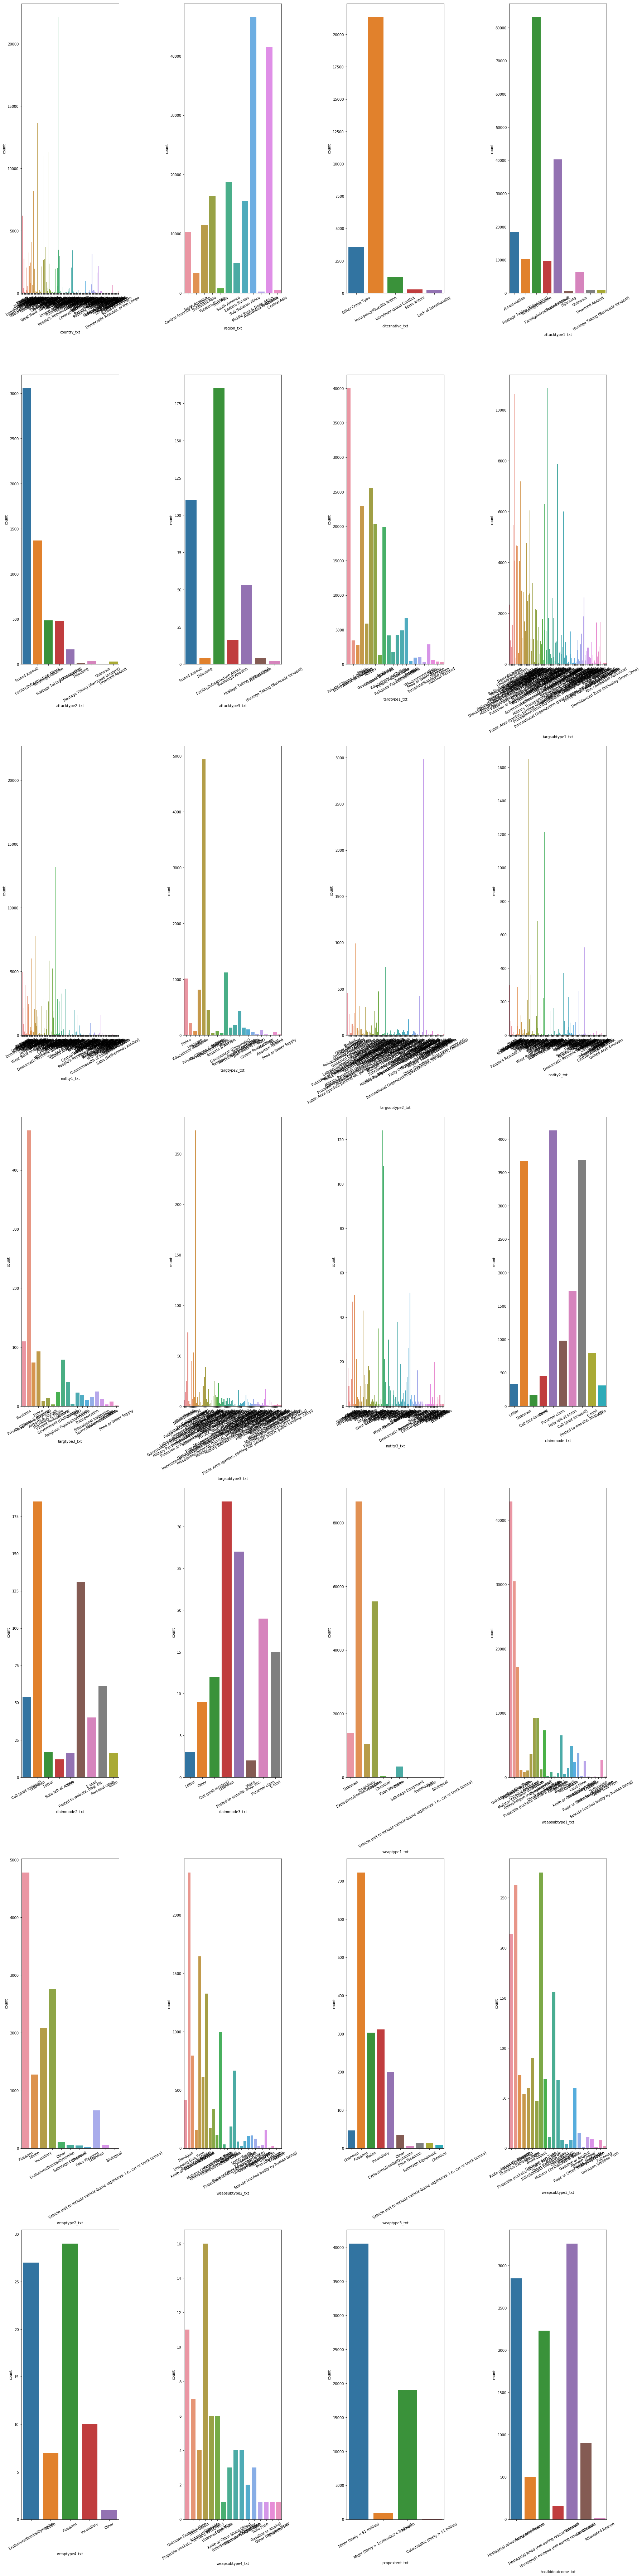

In [13]:
fig = plt.figure(figsize=(25,100))
#fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,29):
    fig.add_subplot(7,4,i)
    s = snb.countplot(df[catogery_columns[i-1]])
    s.set_xticklabels(s.get_xticklabels(),rotation=30)
fig.tight_layout()

#### From the above analysis

-   ISIS has highest percentage of bombing attacks.
-   The maoist group have high percentage of facility and infrastructure attacks.
-   The maoist group have high percentage of sabotage equipments.
-   ISIL activities are only aligned to middle east and africa as compared to Taliban 
   which has its dominance in South asia region.
-  The AL saba has its presence in Sub Sahara Africa.

In [9]:
#df.set_index('eventid', inplace=True) # Set index

In [21]:
#df = df.reset_index()

### Year wise trend of terrorist activities

In [14]:
df_year_trend = df.groupby(['iyear'])['eventid'].count()

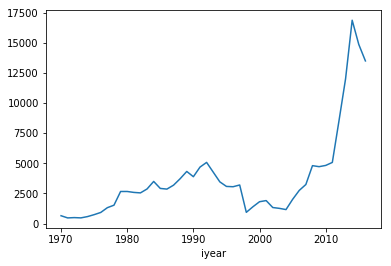

In [15]:
df_year_trend.plot(legend=False)

From the abve graph, we see a huge increase in terrorist activities from 2010 

In [ ]:
# to find top terrorist group in each year.

In [20]:
iyear_gname = df.groupby(['iyear', 'gname']).agg({'eventid': 'sum'}) 

In [21]:
iyear_gname_pct = iyear_gname.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [ ]:
print(iyear_gname_pct, 100)

**Convert iyear into bins**

In [23]:
def f(x):
  if x['iyear'] >= 1970 and x['iyear'] < 1980: return "1970-1980"
  elif x['iyear'] >= 1980 and x['iyear'] < 1990 : return "1980-1990"
  elif x['iyear'] >= 1990 and x['iyear'] < 2000 : return "1990-2000"
  elif x['iyear'] >= 2000 and x['iyear'] < 2010  : return "2000-2010"
  else: return "2010-tilldate"

In [24]:
df['Iyear_bin'] = df.apply(f, axis=1)

In [25]:
Iyear_bin_gname = df.groupby(['Iyear_bin', 'gname']).agg({'eventid': 'count'}) 

In [26]:
Iyear_bin_gname_pct = Iyear_bin_gname.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.count())) 

In [ ]:
print(Iyear_bin_gname_pct)

**Export to csv to check for top percentage gnames under each iyear bin**

In [55]:
Iyear_bin_gname_pct.to_csv('Iyear_bin_gname_pct.csv', sep=',') 

In [ ]:
# From the above sheet was able to identify that Taliban, ISIL, Al-shabbad,  Boko haram and Maosit are the the top terrorist groups after 2010.

In [111]:
df.set_index('eventid', inplace=True) # Set index

Create a new data frame and removing description columns such as Target1 and text.

In [113]:
df1 = df[['iyear',	'imonth',	'iday',	'approxdate',	'extended',	'resolution',	'country',	'country_txt',	'region',	'region_txt',	'provstate',	'city',	'latitude',	'longitude',	'specificity',	'vicinity',	'location',	'summary',	'crit1',	'crit2',	'crit3',	'doubtterr',	'alternative',	'alternative_txt',	'multiple',	'success',	'suicide',	'attacktype1',	'attacktype1_txt',	'attacktype2',	'attacktype2_txt',	'attacktype3',	'attacktype3_txt',	'targtype1',	'targtype1_txt',	'targsubtype1',	'targsubtype1_txt',	'corp1',	'target1',	'natlty1',	'natlty1_txt',	'targtype2',	'targtype2_txt',	'targsubtype2',	'targsubtype2_txt',	'corp2',	'target2',	'natlty2',	'natlty2_txt',	'targtype3',	'targtype3_txt',	'targsubtype3',	'targsubtype3_txt',	'corp3',	'target3',	'natlty3',	'natlty3_txt',	'gname',	'gsubname',	'gname2',	'gsubname2',	'gname3',	'gsubname3',	'motive',	'guncertain1',	'guncertain2',	'guncertain3',	'individual',	'nperps',	'nperpcap',	'claimed',	'claimmode',	'claimmode_txt',	'claim2',	'claimmode2',	'claimmode2_txt',	'claim3',	'claimmode3',	'claimmode3_txt',	'compclaim',	'weaptype1',	'weaptype1_txt',	'weapsubtype1',	'weapsubtype1_txt',	'weaptype2',	'weaptype2_txt',	'weapsubtype2',	'weapsubtype2_txt',	'weaptype3',	'weaptype3_txt',	'weapsubtype3',	'weapsubtype3_txt',	'weaptype4',	'weaptype4_txt',	'weapsubtype4',	'weapsubtype4_txt',	'weapdetail',	'nkill',	'nkillus',	'nkillter',	'nwound',	'nwoundus',	'nwoundte',	'property',	'propextent',	'propextent_txt',	'propvalue',	'propcomment',	'ishostkid',	'nhostkid',	'nhostkidus',	'nhours',	'ndays',	'divert',	'kidhijcountry',	'ransom',	'ransomamt',	'ransomamtus',	'ransompaid',	'ransompaidus',	'ransomnote',	'hostkidoutcome',	'hostkidoutcome_txt',	'nreleased',	'addnotes',	'scite1',	'scite2',	'scite3',	'dbsource',	'INT_LOG',	'INT_IDEO',	'INT_MISC',	'INT_ANY',	'related']]


**Creatine a new data frame df_2 with data only from 2010, the reason for choosing data from 2010 to present is 
mainly to concentrate on recent terrorist acitives and trends.**

In [115]:
df_2 = df1[df1['iyear'] >= 2010]

**In dataframe df_2,  derive new target column naming Gname_target, this target variable mainly has high percentage terrorist groups.
Also since differenct maoist groups have similar trend of terrorist acitivities, they are grouped into one.**

In [117]:
df_2['Gname_target'] = df_2['gname'].map(lambda x: 1 if (x == 'Unknown') else 2 if (x == 'Taliban') else 3 if
(x == 'Islamic State of Iraq and the Levant (ISIL)') else 4 if (x == 'Al-Shabaab') else 5 if (x == 'Boko Haram') else 6
 if (x == 'Communist Party of India - Maoist (CPI-Maoist)' or x == 'Communist Party of Nepal - Maoist (CPN-Maoist-Chand)'
 or x == 'Communist Party of Nepal-Maoist (Baidya)' or x == 'Maoist Communist Party (MKP)' or x == 'Maoist Communist Party of Manipur'
 or x == 'Maoists' ) else 0 )

C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
df_2.groupby(['Gname_target']).size() # To check size of each target.

Gname_target
0    18789
1    39960
2     5440
3     4287
4     2594
5     2067
6     2452
dtype: int64

### Gname_target
-  0    18789 -- Others
-   1    39960 -- Unknown
-   2     5440 -- Taliban
-   3     4287 -- ISIL
-   4     2594 -- Al- Shabbad
-   5     2067 -- Boko haram
-   6     2452 -- Maoist

### One hot encoding 

In [349]:
Region = pd.get_dummies(df_2.region_txt) # Dummy variable for region

In [350]:
Specificity = pd.get_dummies(df_2.specificity,prefix= 'Specificity') # Dummy variable for specificity

In [351]:
alternative = pd.get_dummies(df_2.alternative,prefix= 'alternative') # Dummy variable for alternative

In [352]:
attacktype1 = pd.get_dummies(df_2.attacktype1,prefix= 'attacktype1') # Dummy variable for attacktype1

In [353]:
attacktype2 = pd.get_dummies(df_2.attacktype2,prefix= 'attacktype2') # Dummy variable for attacktype2

In [354]:
attacktype3 = pd.get_dummies(df_2.attacktype3,prefix= 'attacktype3') # Dummy variable for attacktype3

In [355]:
targtype1 = pd.get_dummies(df_2.targtype1,prefix= 'targtype1') # Dummy variable for targtype1

In [356]:
targsubtype1 = pd.get_dummies(df_2.targsubtype1,prefix= 'targsubtype1') # Dummy variable for targsubtype1

In [357]:
natlty1 = pd.get_dummies(df_2.natlty1,prefix= 'natlty1') # Dummy variable for natlty1

In [358]:
targtype2 = pd.get_dummies(df_2.targtype2,prefix= 'targtype2') # Dummy variable for targtype2

In [359]:
targsubtype2 = pd.get_dummies(df_2.targsubtype2,prefix= 'targsubtype2') # Dummy variable for targsubtype2

In [360]:
natlty2 = pd.get_dummies(df_2.natlty2,prefix= 'natlty2') # Dummy variable for natlty2

In [361]:
targtype3 = pd.get_dummies(df_2.targtype3,prefix= 'targtype3') # Dummy variable for targtype3

In [362]:
targsubtype3 = pd.get_dummies(df_2.targsubtype3,prefix= 'targsubtype3') # Dummy variable for targsubtype3

In [363]:
natlty3 = pd.get_dummies(df_2.natlty3,prefix= 'natlty3') # Dummy variable for natlty3

In [364]:
claimmode = pd.get_dummies(df_2.claimmode,prefix= 'claimmode') # Dummy variable for claimmode

In [365]:
weaptype1 = pd.get_dummies(df_2.weaptype1,prefix= 'weaptype1') # Dummy variable for weaptype1

In [366]:
weapsubtype1 = pd.get_dummies(df_2.weapsubtype1,prefix= 'weapsubtype1') # Dummy variable for weapsubtype1

In [367]:
weaptype2 = pd.get_dummies(df_2.weaptype2,prefix= 'weaptype2') # Dummy variable for weaptype2

In [368]:
weapsubtype2 = pd.get_dummies(df_2.weapsubtype2,prefix= 'weapsubtype2') # Dummy variable for weapsubtype2

In [369]:
weaptype3 = pd.get_dummies(df_2.weaptype3,prefix= 'weaptype3') # Dummy variable for weaptype3

In [370]:
weapsubtype3 = pd.get_dummies(df_2.weapsubtype3,prefix= 'weapsubtype3') # Dummy variable for weapsubtype3

In [371]:
weaptype4 = pd.get_dummies(df_2.weaptype4,prefix= 'weaptype4') # Dummy variable for weaptype4

In [372]:
weapsubtype4 = pd.get_dummies(df_2.weapsubtype4,prefix= 'weapsubtype4') # Dummy variable for weapsubtype4

In [373]:
property_dummy = pd.get_dummies(df_2.property,prefix= 'property') # Dummy variable for property

In [374]:
ishostkid = pd.get_dummies(df_2.ishostkid,prefix= 'ishostkid')

### Create new columns Is_taliban, Is_ISIL, Is_al_shabbad, Is_boko_haram, Is_Maoist as new set of individual target variables

In [375]:
df_2['Is_taliban'] = df_2['Gname_target'].map(lambda x: 1 if (x == 2) else 0 )

C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [376]:
df_2['Is_ISIL'] = df_2['Gname_target'].map(lambda x: 1 if (x == 3) else 0 )

C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [377]:
df_2['Is_al_Shabbad'] = df_2['Gname_target'].map(lambda x: 1 if (x == 4) else 0 )

C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [378]:
df_2['Is_boko_haram'] = df_2['Gname_target'].map(lambda x: 1 if (x == 5) else 0 )

C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [379]:
df_2['Is_Maoist'] = df_2['Gname_target'].map(lambda x: 1 if (x == 6) else 0 )

C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [152]:
# Reset index and store into a new data frame 

In [380]:
df_2_RI = df_2.reset_index()

In [154]:
# from functools import reduce 

**To get rid of dummy trap, drop one column from one hot encoding features **

In [381]:
Region_RI = Region.reset_index()
Region_RI.drop('Western Europe', axis = 1, inplace = True)

In [382]:
Specificity_RI = Specificity.reset_index()
Specificity_RI.drop('Specificity_5.0', axis = 1, inplace = True)

In [383]:
alternative_RI = alternative.reset_index()
alternative_RI.drop('alternative_5.0', axis = 1, inplace = True)

In [384]:
attacktype1_RI = attacktype1.reset_index()
attacktype1_RI.drop('attacktype1_9', axis = 1, inplace = True)

In [385]:
attacktype2_RI = attacktype2.reset_index()
attacktype2_RI.drop('attacktype2_9.0', axis = 1, inplace = True)

In [386]:
attacktype3_RI = attacktype3.reset_index()
attacktype3_RI.drop('attacktype3_7.0', axis = 1, inplace = True)

In [387]:
targtype1_RI = targtype1.reset_index()
targtype1_RI.drop('targtype1_22', axis = 1, inplace = True)

In [388]:
targsubtype1_RI = targsubtype1.reset_index()
targsubtype1_RI.drop('targsubtype1_111.0', axis = 1, inplace = True)

In [389]:
natlty1_RI = natlty1.reset_index()
natlty1_RI.drop('natlty1_1004.0', axis = 1, inplace = True)

In [390]:
targtype2_RI = targtype2.reset_index()
targtype2_RI.drop('targtype2_22.0', axis = 1, inplace = True)

In [391]:
targsubtype2_RI = targsubtype2.reset_index()
targsubtype2_RI.drop('targsubtype2_108.0', axis = 1, inplace = True)

In [392]:
natlty2_RI = natlty2.reset_index()
natlty2_RI.drop('natlty2_1004.0', axis = 1, inplace = True)

In [393]:
targtype3_RI = targtype3.reset_index()
targtype3_RI.drop('targtype3_22.0', axis = 1, inplace = True)

In [394]:
targsubtype3_RI = targsubtype3.reset_index()
targsubtype3_RI.drop('targsubtype3_109.0', axis = 1, inplace = True)

In [395]:
natlty3_RI = natlty3.reset_index()
natlty3_RI.drop('natlty3_1004.0', axis = 1, inplace = True)

In [396]:
claimmode_RI = claimmode.reset_index()
claimmode_RI.drop('claimmode_10.0', axis = 1, inplace = True)

In [397]:
weaptype1_RI = weaptype1.reset_index()
weaptype1_RI.drop('weaptype1_13', axis = 1, inplace = True)

In [398]:
weapsubtype1_RI = weapsubtype1.reset_index()
weapsubtype1_RI.drop('weapsubtype1_30.0', axis = 1, inplace = True)

In [399]:
weaptype2_RI = weaptype2.reset_index()
weaptype2_RI.drop('weaptype2_13.0', axis = 1, inplace = True)

In [400]:
weapsubtype2_RI = weapsubtype2.reset_index()
weapsubtype2_RI.drop('weapsubtype2_30.0', axis = 1, inplace = True)

In [401]:
weaptype3_RI = weaptype3.reset_index()
weaptype3_RI.drop('weaptype3_13.0', axis = 1, inplace = True)

In [402]:
weapsubtype3_RI = weapsubtype3.reset_index()
weapsubtype3_RI.drop('weapsubtype3_28.0', axis = 1, inplace = True)

In [403]:
weaptype4_RI = weaptype4.reset_index()

In [404]:
weapsubtype4_RI = weapsubtype4.reset_index()
weapsubtype4_RI.drop('weapsubtype4_5.0', axis = 1, inplace = True)

In [405]:
property_dummy_RI = property_dummy.reset_index()
property_dummy_RI.drop('property_1', axis = 1, inplace = True)

In [406]:
ishostkid_RI = ishostkid.reset_index()
ishostkid_RI.drop('ishostkid_1.0', axis = 1, inplace = True)

In [407]:
# Create country dummy variable and dropping once column due to dummy trap.
country = pd.get_dummies(df_2.country,prefix= 'country') # Dummy variable for country
country_RI = country.reset_index()
country_RI.head(2)
country_RI.drop('country_1004', axis = 1, inplace = True)

In [408]:
# Create imonth dummy variable again as the variable is captured as blank.
imonth = pd.get_dummies(df_2.imonth,prefix= 'month') # Dummy variable for country
imonth_RI = imonth.reset_index()
imonth_RI.head(2)
imonth_RI.drop('month_12', axis = 1, inplace = True)

**All dummy variable data frames into one data frame.**

In [409]:
dfs = [df_2_RI,imonth_RI,country_RI,Region_RI,Specificity_RI, alternative_RI,attacktype1_RI,attacktype2_RI,attacktype3_RI,targtype1_RI,targsubtype1_RI,natlty1_RI,targtype2_RI,targsubtype2_RI,
      natlty2_RI, targtype3_RI, targsubtype3_RI, natlty3_RI, claimmode_RI, weaptype1_RI, weapsubtype1_RI, weaptype2_RI, weapsubtype2_RI, weaptype3_RI, weapsubtype3_RI, 
weaptype4_RI, weapsubtype4_RI, property_dummy_RI, ishostkid_RI] 

In [410]:
dfs = [df.set_index('eventid') for df in dfs] 

In [411]:
DF_GTD = dfs[0].join(dfs[1:])

In [412]:
DF_GTD.shape

(75589, 1076)

**Work on ransom amount **

In [414]:


DF_GTD[['ransomamt']] = np.where(DF_GTD[['ransomamt']].isnull(), 0, 1) # Code for ransom amt variable where if null then 0 else 1

In [415]:
DF_GTD['INT_LOG'].replace(-9,0, inplace = True ) # replace -9 in int_log with 0
DF_GTD['INT_IDEO'].replace(-9,0, inplace = True ) # replace -9 with 0
DF_GTD['INT_MISC'].replace(-9,0, inplace = True )
DF_GTD['INT_ANY'].replace(-9,0, inplace = True )

**Drop unwanted variables**

In [417]:

DF_GTD.drop(['iyear',	'latitude',	'attacktype3',	'natlty1',	'targtype3_txt',	'gsubname3',	'claimmode3',	'weapsubtype2_txt',	'weapdetail',	'ndays',	'iday',	'imonth',	'approxdate',	'resolution',	'country',	'country_txt',	'region',	'region_txt',	'provstate',	'city',	'longitude',	'specificity',	'location',	'summary',	'alternative',	'alternative_txt',	'attacktype1',	'attacktype1_txt',	'attacktype2',	'attacktype2_txt',	'attacktype3_txt',	'targtype1',	'targtype1_txt',	'targsubtype1',	'targsubtype1_txt',	'corp1',	'target1',	'natlty1_txt',	'targtype2',	'targtype2_txt',	'targsubtype2',	'targsubtype2_txt',	'corp2',	'target2',	'natlty2',	'natlty2_txt',	'targtype3',	'targsubtype3',	'targsubtype3_txt',	'corp3',	'target3',	'natlty3',	'natlty3_txt',	'gname',	'gsubname',	'gname2',	'gsubname2',	'gname3',	'motive',	'guncertain2',	'guncertain3',	'nperps',	'nperpcap',	'claimmode',	'claimmode_txt',	'claim2',	'claimmode2',	'claimmode2_txt',	'claim3',	'claimmode3_txt',	'compclaim',	'weaptype1',	'weaptype1_txt',	'weapsubtype1',	'weapsubtype1_txt',	'weaptype2',	'weaptype2_txt',	'weapsubtype2',	'weaptype3',	'weaptype3_txt',	'weapsubtype3',	'weapsubtype3_txt',	'weaptype4',	'weaptype4_txt',	'weapsubtype4',	'weapsubtype4_txt',	'nkillus',	'nkillter',	'nwoundus',	'nwoundte',	'property',	'propextent',	'propextent_txt',	'propvalue',	'propcomment',	'nhostkid',	'nhostkidus',	'nhours',	'divert',	'kidhijcountry',	'ransom',	'ransomamtus',	'ransompaid',	'ransompaidus',	'ransomnote',	'hostkidoutcome',	'addnotes',	'scite1',	'scite2',	'scite3',	'dbsource'
], axis = 1, inplace = True)

In [418]:
DF_GTD.drop(['hostkidoutcome_txt'], axis = 1, inplace = True)

In [419]:
DF_GTD.shape

(75589, 964)

In [ ]:
DF_GTD.head(4)

## Predictive model - If a terrorist activity group is Taliban

In [420]:
Is_taliban_total = pd.DataFrame(DF_GTD, columns=['extended',	 'vicinity',	 'crit1',	 'crit2',	 'crit3',	 'doubtterr',	 'multiple',	 'success',	 'suicide',	 'guncertain1',	 'individual',	 'claimed',	 'nkill',	 'nwound',	 'ishostkid',	 'ransomamt',	 'nreleased',	 'INT_LOG',	 'INT_IDEO',	 'INT_MISC',	 'INT_ANY',	 'related',	 'month_1',	 'month_2',	 'month_3',	 'month_4',	 'month_5',	 'month_6',	 'month_7',	 'month_8',	 'month_9',	 'month_10',	 'month_11',	 'country_4',	 'country_5',	 'country_6',	 'country_8',	 'country_11',	 'country_12',	 'country_14',	 'country_15',	 'country_16',	 'country_17',	 'country_18',	 'country_19',	 'country_21',	 'country_22',	 'country_25',	 'country_26',	 'country_28',	 'country_30',	 'country_32',	 'country_33',	 'country_34',	 'country_35',	 'country_36',	 'country_37',	 'country_38',	 'country_41',	 'country_42',	 'country_43',	 'country_44',	 'country_45',	 'country_47',	 'country_50',	 'country_53',	 'country_54',	 'country_55',	 'country_56',	 'country_58',	 'country_59',	 'country_60',	 'country_63',	 'country_64',	 'country_65',	 'country_68',	 'country_69',	 'country_74',	 'country_75',	 'country_76',	 'country_78',	 'country_83',	 'country_84',	 'country_85',	 'country_86',	 'country_87',	 'country_88',	 'country_90',	 'country_91',	 'country_92',	 'country_93',	 'country_94',	 'country_95',	 'country_96',	 'country_97',	 'country_98',	 'country_99',	 'country_100',	 'country_101',	 'country_102',	 'country_103',	 'country_104',	 'country_106',	 'country_107',	 'country_108',	 'country_110',	 'country_111',	 'country_112',	 'country_113',	 'country_118',	 'country_119',	 'country_121',	 'country_122',	 'country_123',	 'country_124',	 'country_128',	 'country_130',	 'country_132',	 'country_136',	 'country_137',	 'country_138',	 'country_141',	 'country_142',	 'country_144',	 'country_145',	 'country_146',	 'country_147',	 'country_151',	 'country_153',	 'country_155',	 'country_156',	 'country_158',	 'country_159',	 'country_160',	 'country_161',	 'country_162',	 'country_164',	 'country_167',	 'country_168',	 'country_173',	 'country_174',	 'country_177',	 'country_179',	 'country_182',	 'country_183',	 'country_184',	 'country_185',	 'country_186',	 'country_195',	 'country_198',	 'country_199',	 'country_200',	 'country_201',	 'country_202',	 'country_203',	 'country_205',	 'country_207',	 'country_208',	 'country_209',	 'country_210',	 'country_213',	 'country_214',	 'country_215',	 'country_217',	 'country_218',	 'country_219',	 'country_222',	 'country_228',	 'country_229',	 'country_231',	 'country_603',	 'country_1001',	 'country_1002',	 'country_1003',	 'Australasia & Oceania',	 'Central America & Caribbean',	 'Central Asia',	 'East Asia',	 'Eastern Europe',	 'Middle East & North Africa',	 'North America',	 'South America',	 'South Asia',	 'Southeast Asia',	 'Sub-Saharan Africa',	 'Specificity_1.0',	 'Specificity_2.0',	 'Specificity_3.0',	 'Specificity_4.0',	 'alternative_1.0',	 'alternative_2.0',	 'alternative_3.0',	 'alternative_4.0',	 'attacktype1_1',	 'attacktype1_2',	 'attacktype1_3',	 'attacktype1_4',	 'attacktype1_5',	 'attacktype1_6',	 'attacktype1_7',	 'attacktype1_8',	 'attacktype2_1.0',	 'attacktype2_2.0',	 'attacktype2_3.0',	 'attacktype2_4.0',	 'attacktype2_5.0',	 'attacktype2_6.0',	 'attacktype2_7.0',	 'attacktype2_8.0',	 'attacktype3_2.0',	 'attacktype3_3.0',	 'attacktype3_4.0',	 'attacktype3_6.0',	 'targtype1_1',	 'targtype1_2',	 'targtype1_3',	 'targtype1_4',	 'targtype1_5',	 'targtype1_6',	 'targtype1_7',	 'targtype1_8',	 'targtype1_9',	 'targtype1_10',	 'targtype1_11',	 'targtype1_12',	 'targtype1_13',	 'targtype1_14',	 'targtype1_15',	 'targtype1_16',	 'targtype1_17',	 'targtype1_18',	 'targtype1_19',	 'targtype1_20',	 'targtype1_21',	 'targsubtype1_1.0',	 'targsubtype1_2.0',	 'targsubtype1_3.0',	 'targsubtype1_4.0',	 'targsubtype1_5.0',	 'targsubtype1_6.0',	 'targsubtype1_7.0',	 'targsubtype1_8.0',	 'targsubtype1_9.0',	 'targsubtype1_10.0',	 'targsubtype1_11.0',	 'targsubtype1_12.0',	 'targsubtype1_13.0',	 'targsubtype1_14.0',	 'targsubtype1_15.0',	 'targsubtype1_16.0',	 'targsubtype1_17.0',	 'targsubtype1_18.0',	 'targsubtype1_19.0',	 'targsubtype1_20.0',	 'targsubtype1_21.0',	 'targsubtype1_22.0',	 'targsubtype1_23.0',	 'targsubtype1_24.0',	 'targsubtype1_25.0',	 'targsubtype1_26.0',	 'targsubtype1_27.0',	 'targsubtype1_28.0',	 'targsubtype1_29.0',	 'targsubtype1_30.0',	 'targsubtype1_31.0',	 'targsubtype1_32.0',	 'targsubtype1_33.0',	 'targsubtype1_34.0',	 'targsubtype1_35.0',	 'targsubtype1_36.0',	 'targsubtype1_37.0',	 'targsubtype1_39.0',	 'targsubtype1_40.0',	 'targsubtype1_42.0',	 'targsubtype1_43.0',	 'targsubtype1_44.0',	 'targsubtype1_45.0',	 'targsubtype1_46.0',	 'targsubtype1_47.0',	 'targsubtype1_48.0',	 'targsubtype1_49.0',	 'targsubtype1_50.0',	 'targsubtype1_51.0',	 'targsubtype1_52.0',	 'targsubtype1_53.0',	 'targsubtype1_54.0',	 'targsubtype1_55.0',	 'targsubtype1_56.0',	 'targsubtype1_57.0',	 'targsubtype1_58.0',	 'targsubtype1_59.0',	 'targsubtype1_60.0',	 'targsubtype1_61.0',	 'targsubtype1_62.0',	 'targsubtype1_63.0',	 'targsubtype1_64.0',	 'targsubtype1_65.0',	 'targsubtype1_66.0',	 'targsubtype1_67.0',	 'targsubtype1_68.0',	 'targsubtype1_69.0',	 'targsubtype1_70.0',	 'targsubtype1_71.0',	 'targsubtype1_72.0',	 'targsubtype1_73.0',	 'targsubtype1_74.0',	 'targsubtype1_75.0',	 'targsubtype1_76.0',	 'targsubtype1_77.0',	 'targsubtype1_78.0',	 'targsubtype1_79.0',	 'targsubtype1_80.0',	 'targsubtype1_81.0',	 'targsubtype1_82.0',	 'targsubtype1_83.0',	 'targsubtype1_84.0',	 'targsubtype1_85.0',	 'targsubtype1_86.0',	 'targsubtype1_87.0',	 'targsubtype1_88.0',	 'targsubtype1_89.0',	 'targsubtype1_90.0',	 'targsubtype1_91.0',	 'targsubtype1_92.0',	 'targsubtype1_93.0',	 'targsubtype1_94.0',	 'targsubtype1_96.0',	 'targsubtype1_97.0',	 'targsubtype1_98.0',	 'targsubtype1_99.0',	 'targsubtype1_100.0',	 'targsubtype1_101.0',	 'targsubtype1_102.0',	 'targsubtype1_103.0',	 'targsubtype1_104.0',	 'targsubtype1_105.0',	 'targsubtype1_106.0',	 'targsubtype1_107.0',	 'targsubtype1_108.0',	 'targsubtype1_109.0',	 'targsubtype1_110.0',	 'natlty1_4.0',	 'natlty1_5.0',	 'natlty1_6.0',	 'natlty1_8.0',	 'natlty1_11.0',	 'natlty1_12.0',	 'natlty1_14.0',	 'natlty1_15.0',	 'natlty1_16.0',	 'natlty1_17.0',	 'natlty1_18.0',	 'natlty1_19.0',	 'natlty1_21.0',	 'natlty1_22.0',	 'natlty1_25.0',	 'natlty1_26.0',	 'natlty1_28.0',	 'natlty1_30.0',	 'natlty1_32.0',	 'natlty1_33.0',	 'natlty1_34.0',	 'natlty1_35.0',	 'natlty1_36.0',	 'natlty1_37.0',	 'natlty1_38.0',	 'natlty1_41.0',	 'natlty1_42.0',	 'natlty1_43.0',	 'natlty1_44.0',	 'natlty1_45.0',	 'natlty1_47.0',	 'natlty1_50.0',	 'natlty1_53.0',	 'natlty1_54.0',	 'natlty1_55.0',	 'natlty1_56.0',	 'natlty1_58.0',	 'natlty1_59.0',	 'natlty1_60.0',	 'natlty1_63.0',	 'natlty1_64.0',	 'natlty1_65.0',	 'natlty1_68.0',	 'natlty1_69.0',	 'natlty1_74.0',	 'natlty1_75.0',	 'natlty1_76.0',	 'natlty1_78.0',	 'natlty1_83.0',	 'natlty1_84.0',	 'natlty1_85.0',	 'natlty1_86.0',	 'natlty1_87.0',	 'natlty1_88.0',	 'natlty1_89.0',	 'natlty1_90.0',	 'natlty1_91.0',	 'natlty1_92.0',	 'natlty1_93.0',	 'natlty1_94.0',	 'natlty1_95.0',	 'natlty1_96.0',	 'natlty1_97.0',	 'natlty1_98.0',	 'natlty1_99.0',	 'natlty1_100.0',	 'natlty1_101.0',	 'natlty1_102.0',	 'natlty1_103.0',	 'natlty1_104.0',	 'natlty1_106.0',	 'natlty1_107.0',	 'natlty1_108.0',	 'natlty1_109.0',	 'natlty1_110.0',	 'natlty1_111.0',	 'natlty1_112.0',	 'natlty1_113.0',	 'natlty1_115.0',	 'natlty1_116.0',	 'natlty1_118.0',	 'natlty1_119.0',	 'natlty1_120.0',	 'natlty1_121.0',	 'natlty1_122.0',	 'natlty1_123.0',	 'natlty1_124.0',	 'natlty1_128.0',	 'natlty1_130.0',	 'natlty1_132.0',	 'natlty1_136.0',	 'natlty1_137.0',	 'natlty1_138.0',	 'natlty1_139.0',	 'natlty1_141.0',	 'natlty1_142.0',	 'natlty1_144.0',	 'natlty1_145.0',	 'natlty1_146.0',	 'natlty1_147.0',	 'natlty1_149.0',	 'natlty1_151.0',	 'natlty1_153.0',	 'natlty1_155.0',	 'natlty1_156.0',	 'natlty1_158.0',	 'natlty1_159.0',	 'natlty1_160.0',	 'natlty1_161.0',	 'natlty1_162.0',	 'natlty1_164.0',	 'natlty1_166.0',	 'natlty1_167.0',	 'natlty1_168.0',	 'natlty1_169.0',	 'natlty1_173.0',	 'natlty1_174.0',	 'natlty1_177.0',	 'natlty1_178.0',	 'natlty1_179.0',	 'natlty1_181.0',	 'natlty1_182.0',	 'natlty1_183.0',	 'natlty1_184.0',	 'natlty1_185.0',	 'natlty1_186.0',	 'natlty1_195.0',	 'natlty1_198.0',	 'natlty1_199.0',	 'natlty1_200.0',	 'natlty1_201.0',	 'natlty1_202.0',	 'natlty1_203.0',	 'natlty1_204.0',	 'natlty1_205.0',	 'natlty1_207.0',	 'natlty1_208.0',	 'natlty1_209.0',	 'natlty1_210.0',	 'natlty1_212.0',	 'natlty1_213.0',	 'natlty1_214.0',	 'natlty1_215.0',	 'natlty1_216.0',	 'natlty1_217.0',	 'natlty1_218.0',	 'natlty1_219.0',	 'natlty1_221.0',	 'natlty1_222.0',	 'natlty1_223.0',	 'natlty1_228.0',	 'natlty1_229.0',	 'natlty1_230.0',	 'natlty1_231.0',	 'natlty1_233.0',	 'natlty1_238.0',	 'natlty1_334.0',	 'natlty1_422.0',	 'natlty1_603.0',	 'natlty1_999.0',	 'natlty1_1001.0',	 'natlty1_1002.0',	 'natlty1_1003.0',	 'targtype2_1.0',	 'targtype2_2.0',	 'targtype2_3.0',	 'targtype2_4.0',	 'targtype2_6.0',	 'targtype2_7.0',	 'targtype2_8.0',	 'targtype2_9.0',	 'targtype2_10.0',	 'targtype2_11.0',	 'targtype2_12.0',	 'targtype2_13.0',	 'targtype2_14.0',	 'targtype2_15.0',	 'targtype2_16.0',	 'targtype2_17.0',	 'targtype2_18.0',	 'targtype2_19.0',	 'targtype2_21.0',	 'targsubtype2_1.0',	 'targsubtype2_2.0',	 'targsubtype2_3.0',	 'targsubtype2_4.0',	 'targsubtype2_5.0',	 'targsubtype2_6.0',	 'targsubtype2_7.0',	 'targsubtype2_8.0',	 'targsubtype2_9.0',	 'targsubtype2_10.0',	 'targsubtype2_11.0',	 'targsubtype2_12.0',	 'targsubtype2_13.0',	 'targsubtype2_14.0',	 'targsubtype2_15.0',	 'targsubtype2_16.0',	 'targsubtype2_17.0',	 'targsubtype2_18.0',	 'targsubtype2_19.0',	 'targsubtype2_20.0',	 'targsubtype2_21.0',	 'targsubtype2_22.0',	 'targsubtype2_23.0',	 'targsubtype2_24.0',	 'targsubtype2_25.0',	 'targsubtype2_27.0',	 'targsubtype2_29.0',	 'targsubtype2_34.0',	 'targsubtype2_37.0',	 'targsubtype2_44.0',	 'targsubtype2_45.0',	 'targsubtype2_46.0',	 'targsubtype2_47.0',	 'targsubtype2_48.0',	 'targsubtype2_49.0',	 'targsubtype2_50.0',	 'targsubtype2_52.0',	 'targsubtype2_54.0',	 'targsubtype2_55.0',	 'targsubtype2_56.0',	 'targsubtype2_58.0',	 'targsubtype2_61.0',	 'targsubtype2_62.0',	 'targsubtype2_64.0',	 'targsubtype2_67.0',	 'targsubtype2_68.0',	 'targsubtype2_69.0',	 'targsubtype2_70.0',	 'targsubtype2_71.0',	 'targsubtype2_73.0',	 'targsubtype2_74.0',	 'targsubtype2_75.0',	 'targsubtype2_76.0',	 'targsubtype2_77.0',	 'targsubtype2_78.0',	 'targsubtype2_79.0',	 'targsubtype2_84.0',	 'targsubtype2_85.0',	 'targsubtype2_86.0',	 'targsubtype2_90.0',	 'targsubtype2_93.0',	 'targsubtype2_96.0',	 'targsubtype2_97.0',	 'targsubtype2_99.0',	 'targsubtype2_100.0',	 'targsubtype2_101.0',	 'targsubtype2_103.0',	 'targsubtype2_105.0',	 'targsubtype2_106.0',	 'targsubtype2_107.0',	 'natlty2_4.0',	 'natlty2_6.0',	 'natlty2_8.0',	 'natlty2_14.0',	 'natlty2_15.0',	 'natlty2_18.0',	 'natlty2_19.0',	 'natlty2_21.0',	 'natlty2_28.0',	 'natlty2_33.0',	 'natlty2_34.0',	 'natlty2_35.0',	 'natlty2_37.0',	 'natlty2_38.0',	 'natlty2_41.0',	 'natlty2_42.0',	 'natlty2_43.0',	 'natlty2_44.0',	 'natlty2_45.0',	 'natlty2_47.0',	 'natlty2_54.0',	 'natlty2_55.0',	 'natlty2_56.0',	 'natlty2_60.0',	 'natlty2_65.0',	 'natlty2_67.0',	 'natlty2_69.0',	 'natlty2_74.0',	 'natlty2_75.0',	 'natlty2_76.0',	 'natlty2_78.0',	 'natlty2_90.0',	 'natlty2_92.0',	 'natlty2_93.0',	 'natlty2_94.0',	 'natlty2_95.0',	 'natlty2_97.0',	 'natlty2_98.0',	 'natlty2_99.0',	 'natlty2_102.0',	 'natlty2_103.0',	 'natlty2_104.0',	 'natlty2_107.0',	 'natlty2_108.0',	 'natlty2_110.0',	 'natlty2_111.0',	 'natlty2_113.0',	 'natlty2_118.0',	 'natlty2_119.0',	 'natlty2_121.0',	 'natlty2_123.0',	 'natlty2_130.0',	 'natlty2_136.0',	 'natlty2_137.0',	 'natlty2_138.0',	 'natlty2_141.0',	 'natlty2_142.0',	 'natlty2_144.0',	 'natlty2_146.0',	 'natlty2_147.0',	 'natlty2_151.0',	 'natlty2_153.0',	 'natlty2_155.0',	 'natlty2_158.0',	 'natlty2_159.0',	 'natlty2_160.0',	 'natlty2_161.0',	 'natlty2_162.0',	 'natlty2_164.0',	 'natlty2_167.0',	 'natlty2_168.0',	 'natlty2_173.0',	 'natlty2_174.0',	 'natlty2_182.0',	 'natlty2_184.0',	 'natlty2_185.0',	 'natlty2_186.0',	 'natlty2_195.0',	 'natlty2_198.0',	 'natlty2_199.0',	 'natlty2_200.0',	 'natlty2_203.0',	 'natlty2_204.0',	 'natlty2_205.0',	 'natlty2_206.0',	 'natlty2_208.0',	 'natlty2_209.0',	 'natlty2_213.0',	 'natlty2_214.0',	 'natlty2_215.0',	 'natlty2_216.0',	 'natlty2_217.0',	 'natlty2_222.0',	 'natlty2_223.0',	 'natlty2_228.0',	 'natlty2_229.0',	 'natlty2_233.0',	 'natlty2_238.0',	 'natlty2_422.0',	 'natlty2_999.0',	 'natlty2_1003.0',	 'targtype3_1.0',	 'targtype3_2.0',	 'targtype3_3.0',	 'targtype3_4.0',	 'targtype3_6.0',	 'targtype3_7.0',	 'targtype3_8.0',	 'targtype3_9.0',	 'targtype3_10.0',	 'targtype3_11.0',	 'targtype3_12.0',	 'targtype3_13.0',	 'targtype3_14.0',	 'targtype3_15.0',	 'targtype3_16.0',	 'targtype3_17.0',	 'targtype3_18.0',	 'targtype3_19.0',	 'targsubtype3_1.0',	 'targsubtype3_2.0',	 'targsubtype3_3.0',	 'targsubtype3_4.0',	 'targsubtype3_5.0',	 'targsubtype3_6.0',	 'targsubtype3_7.0',	 'targsubtype3_8.0',	 'targsubtype3_9.0',	 'targsubtype3_10.0',	 'targsubtype3_12.0',	 'targsubtype3_13.0',	 'targsubtype3_14.0',	 'targsubtype3_15.0',	 'targsubtype3_17.0',	 'targsubtype3_18.0',	 'targsubtype3_20.0',	 'targsubtype3_21.0',	 'targsubtype3_22.0',	 'targsubtype3_23.0',	 'targsubtype3_24.0',	 'targsubtype3_25.0',	 'targsubtype3_27.0',	 'targsubtype3_29.0',	 'targsubtype3_33.0',	 'targsubtype3_34.0',	 'targsubtype3_35.0',	 'targsubtype3_36.0',	 'targsubtype3_39.0',	 'targsubtype3_44.0',	 'targsubtype3_46.0',	 'targsubtype3_48.0',	 'targsubtype3_49.0',	 'targsubtype3_50.0',	 'targsubtype3_52.0',	 'targsubtype3_53.0',	 'targsubtype3_54.0',	 'targsubtype3_55.0',	 'targsubtype3_57.0',	 'targsubtype3_58.0',	 'targsubtype3_61.0',	 'targsubtype3_62.0',	 'targsubtype3_63.0',	 'targsubtype3_64.0',	 'targsubtype3_65.0',	 'targsubtype3_67.0',	 'targsubtype3_68.0',	 'targsubtype3_69.0',	 'targsubtype3_70.0',	 'targsubtype3_71.0',	 'targsubtype3_73.0',	 'targsubtype3_74.0',	 'targsubtype3_75.0',	 'targsubtype3_76.0',	 'targsubtype3_77.0',	 'targsubtype3_78.0',	 'targsubtype3_79.0',	 'targsubtype3_80.0',	 'targsubtype3_82.0',	 'targsubtype3_83.0',	 'targsubtype3_84.0',	 'targsubtype3_85.0',	 'targsubtype3_86.0',	 'targsubtype3_90.0',	 'targsubtype3_92.0',	 'targsubtype3_93.0',	 'targsubtype3_94.0',	 'targsubtype3_97.0',	 'targsubtype3_99.0',	 'targsubtype3_104.0',	 'natlty3_4.0',	 'natlty3_6.0',	 'natlty3_14.0',	 'natlty3_19.0',	 'natlty3_33.0',	 'natlty3_34.0',	 'natlty3_37.0',	 'natlty3_38.0',	 'natlty3_41.0',	 'natlty3_45.0',	 'natlty3_59.0',	 'natlty3_60.0',	 'natlty3_65.0',	 'natlty3_69.0',	 'natlty3_74.0',	 'natlty3_75.0',	 'natlty3_92.0',	 'natlty3_93.0',	 'natlty3_94.0',	 'natlty3_95.0',	 'natlty3_97.0',	 'natlty3_98.0',	 'natlty3_99.0',	 'natlty3_102.0',	 'natlty3_103.0',	 'natlty3_104.0',	 'natlty3_110.0',	 'natlty3_113.0',	 'natlty3_118.0',	 'natlty3_119.0',	 'natlty3_123.0',	 'natlty3_137.0',	 'natlty3_138.0',	 'natlty3_142.0',	 'natlty3_147.0',	 'natlty3_151.0',	 'natlty3_153.0',	 'natlty3_155.0',	 'natlty3_160.0',	 'natlty3_166.0',	 'natlty3_167.0',	 'natlty3_173.0',	 'natlty3_182.0',	 'natlty3_183.0',	 'natlty3_185.0',	 'natlty3_195.0',	 'natlty3_198.0',	 'natlty3_200.0',	 'natlty3_205.0',	 'natlty3_209.0',	 'natlty3_210.0',	 'natlty3_213.0',	 'natlty3_214.0',	 'natlty3_216.0',	 'natlty3_217.0',	 'natlty3_228.0',	 'natlty3_229.0',	 'natlty3_422.0',	 'natlty3_999.0',	 'claimmode_1.0',	 'claimmode_2.0',	 'claimmode_3.0',	 'claimmode_4.0',	 'claimmode_5.0',	 'claimmode_6.0',	 'claimmode_7.0',	 'claimmode_8.0',	 'claimmode_9.0',	 'weaptype1_1',	 'weaptype1_2',	 'weaptype1_5',	 'weaptype1_6',	 'weaptype1_7',	 'weaptype1_8',	 'weaptype1_9',	 'weaptype1_10',	 'weaptype1_11',	 'weaptype1_12',	 'weapsubtype1_1.0',	 'weapsubtype1_2.0',	 'weapsubtype1_3.0',	 'weapsubtype1_4.0',	 'weapsubtype1_5.0',	 'weapsubtype1_6.0',	 'weapsubtype1_7.0',	 'weapsubtype1_8.0',	 'weapsubtype1_9.0',	 'weapsubtype1_10.0',	 'weapsubtype1_11.0',	 'weapsubtype1_12.0',	 'weapsubtype1_13.0',	 'weapsubtype1_14.0',	 'weapsubtype1_15.0',	 'weapsubtype1_16.0',	 'weapsubtype1_17.0',	 'weapsubtype1_18.0',	 'weapsubtype1_19.0',	 'weapsubtype1_20.0',	 'weapsubtype1_21.0',	 'weapsubtype1_22.0',	 'weapsubtype1_23.0',	 'weapsubtype1_24.0',	 'weapsubtype1_26.0',	 'weapsubtype1_27.0',	 'weapsubtype1_28.0',	 'weapsubtype1_29.0',	 'weaptype2_1.0',	 'weaptype2_2.0',	 'weaptype2_5.0',	 'weaptype2_6.0',	 'weaptype2_7.0',	 'weaptype2_8.0',	 'weaptype2_9.0',	 'weaptype2_10.0',	 'weaptype2_11.0',	 'weaptype2_12.0',	 'weapsubtype2_1.0',	 'weapsubtype2_2.0',	 'weapsubtype2_3.0',	 'weapsubtype2_4.0',	 'weapsubtype2_5.0',	 'weapsubtype2_6.0',	 'weapsubtype2_7.0',	 'weapsubtype2_8.0',	 'weapsubtype2_10.0',	 'weapsubtype2_11.0',	 'weapsubtype2_12.0',	 'weapsubtype2_13.0',	 'weapsubtype2_14.0',	 'weapsubtype2_15.0',	 'weapsubtype2_16.0',	 'weapsubtype2_17.0',	 'weapsubtype2_18.0',	 'weapsubtype2_19.0',	 'weapsubtype2_20.0',	 'weapsubtype2_21.0',	 'weapsubtype2_22.0',	 'weapsubtype2_23.0',	 'weapsubtype2_24.0',	 'weapsubtype2_27.0',	 'weapsubtype2_28.0',	 'weaptype3_2.0',	 'weaptype3_5.0',	 'weaptype3_6.0',	 'weaptype3_7.0',	 'weaptype3_8.0',	 'weaptype3_9.0',	 'weaptype3_10.0',	 'weaptype3_11.0',	 'weaptype3_12.0',	 'weapsubtype3_1.0',	 'weapsubtype3_2.0',	 'weapsubtype3_3.0',	 'weapsubtype3_4.0',	 'weapsubtype3_5.0',	 'weapsubtype3_6.0',	 'weapsubtype3_7.0',	 'weapsubtype3_11.0',	 'weapsubtype3_16.0',	 'weapsubtype3_17.0',	 'weapsubtype3_18.0',	 'weapsubtype3_19.0',	 'weapsubtype3_20.0',	 'weapsubtype3_21.0',	 'weapsubtype3_22.0',	 'weapsubtype3_23.0',	 'weapsubtype3_24.0',	 'weapsubtype3_26.0',	 'weapsubtype3_27.0',	 'weaptype4_5.0',	 'weapsubtype4_2.0',	 'weapsubtype4_4.0',	 'property_-9',	 'property_0',	 'ishostkid_-9.0',	 'ishostkid_0.0', 'Is_taliban'])

In [421]:
Is_taliban_X = pd.DataFrame(Is_taliban_total, columns=['extended',	 'vicinity',	 'crit1',	 'crit2',	 'crit3',	 'doubtterr',	 'multiple',	 'success',	 'suicide',	 'guncertain1',	 'individual',	 'claimed',	 'ishostkid',	 'ransomamt',	 'INT_LOG',	 'INT_IDEO',	 'INT_MISC',	 'INT_ANY',	 'month_1',	 'month_2',	 'month_3',	 'month_4',	 'month_5',	 'month_6',	 'month_7',	 'month_8',	 'month_9',	 'month_10',	 'month_11',	 'country_4',	 'country_5',	 'country_6',	 'country_8',	 'country_11',	 'country_12',	 'country_14',	 'country_15',	 'country_16',	 'country_17',	 'country_18',	 'country_19',	 'country_21',	 'country_22',	 'country_25',	 'country_26',	 'country_28',	 'country_30',	 'country_32',	 'country_33',	 'country_34',	 'country_35',	 'country_36',	 'country_37',	 'country_38',	 'country_41',	 'country_42',	 'country_43',	 'country_44',	 'country_45',	 'country_47',	 'country_50',	 'country_53',	 'country_54',	 'country_55',	 'country_56',	 'country_58',	 'country_59',	 'country_60',	 'country_63',	 'country_64',	 'country_65',	 'country_68',	 'country_69',	 'country_74',	 'country_75',	 'country_76',	 'country_78',	 'country_83',	 'country_84',	 'country_85',	 'country_86',	 'country_87',	 'country_88',	 'country_90',	 'country_91',	 'country_92',	 'country_93',	 'country_94',	 'country_95',	 'country_96',	 'country_97',	 'country_98',	 'country_99',	 'country_100',	 'country_101',	 'country_102',	 'country_103',	 'country_104',	 'country_106',	 'country_107',	 'country_108',	 'country_110',	 'country_111',	 'country_112',	 'country_113',	 'country_118',	 'country_119',	 'country_121',	 'country_122',	 'country_123',	 'country_124',	 'country_128',	 'country_130',	 'country_132',	 'country_136',	 'country_137',	 'country_138',	 'country_141',	 'country_142',	 'country_144',	 'country_145',	 'country_146',	 'country_147',	 'country_151',	 'country_153',	 'country_155',	 'country_156',	 'country_158',	 'country_159',	 'country_160',	 'country_161',	 'country_162',	 'country_164',	 'country_167',	 'country_168',	 'country_173',	 'country_174',	 'country_177',	 'country_179',	 'country_182',	 'country_183',	 'country_184',	 'country_185',	 'country_186',	 'country_195',	 'country_198',	 'country_199',	 'country_200',	 'country_201',	 'country_202',	 'country_203',	 'country_205',	 'country_207',	 'country_208',	 'country_209',	 'country_210',	 'country_213',	 'country_214',	 'country_215',	 'country_217',	 'country_218',	 'country_219',	 'country_222',	 'country_228',	 'country_229',	 'country_231',	 'country_603',	 'country_1001',	 'country_1002',	 'country_1003',	 'Australasia & Oceania',	 'Central America & Caribbean',	 'Central Asia',	 'East Asia',	 'Eastern Europe',	 'Middle East & North Africa',	 'North America',	 'South America',	 'South Asia',	 'Southeast Asia',	 'Sub-Saharan Africa',	 'Specificity_1.0',	 'Specificity_2.0',	 'Specificity_3.0',	 'Specificity_4.0',	 'alternative_1.0',	 'alternative_2.0',	 'alternative_3.0',	 'alternative_4.0',	 'attacktype1_1',	 'attacktype1_2',	 'attacktype1_3',	 'attacktype1_4',	 'attacktype1_5',	 'attacktype1_6',	 'attacktype1_7',	 'attacktype1_8',	 'attacktype2_1.0',	 'attacktype2_2.0',	 'attacktype2_3.0',	 'attacktype2_4.0',	 'attacktype2_5.0',	 'attacktype2_6.0',	 'attacktype2_7.0',	 'attacktype2_8.0',	 'attacktype3_2.0',	 'attacktype3_3.0',	 'attacktype3_4.0',	 'attacktype3_6.0',	 'targtype1_1',	 'targtype1_2',	 'targtype1_3',	 'targtype1_4',	 'targtype1_5',	 'targtype1_6',	 'targtype1_7',	 'targtype1_8',	 'targtype1_9',	 'targtype1_10',	 'targtype1_11',	 'targtype1_12',	 'targtype1_13',	 'targtype1_14',	 'targtype1_15',	 'targtype1_16',	 'targtype1_17',	 'targtype1_18',	 'targtype1_19',	 'targtype1_20',	 'targtype1_21',	 'targsubtype1_1.0',	 'targsubtype1_2.0',	 'targsubtype1_3.0',	 'targsubtype1_4.0',	 'targsubtype1_5.0',	 'targsubtype1_6.0',	 'targsubtype1_7.0',	 'targsubtype1_8.0',	 'targsubtype1_9.0',	 'targsubtype1_10.0',	 'targsubtype1_11.0',	 'targsubtype1_12.0',	 'targsubtype1_13.0',	 'targsubtype1_14.0',	 'targsubtype1_15.0',	 'targsubtype1_16.0',	 'targsubtype1_17.0',	 'targsubtype1_18.0',	 'targsubtype1_19.0',	 'targsubtype1_20.0',	 'targsubtype1_21.0',	 'targsubtype1_22.0',	 'targsubtype1_23.0',	 'targsubtype1_24.0',	 'targsubtype1_25.0',	 'targsubtype1_26.0',	 'targsubtype1_27.0',	 'targsubtype1_28.0',	 'targsubtype1_29.0',	 'targsubtype1_30.0',	 'targsubtype1_31.0',	 'targsubtype1_32.0',	 'targsubtype1_33.0',	 'targsubtype1_34.0',	 'targsubtype1_35.0',	 'targsubtype1_36.0',	 'targsubtype1_37.0',	 'targsubtype1_39.0',	 'targsubtype1_40.0',	 'targsubtype1_42.0',	 'targsubtype1_43.0',	 'targsubtype1_44.0',	 'targsubtype1_45.0',	 'targsubtype1_46.0',	 'targsubtype1_47.0',	 'targsubtype1_48.0',	 'targsubtype1_49.0',	 'targsubtype1_50.0',	 'targsubtype1_51.0',	 'targsubtype1_52.0',	 'targsubtype1_53.0',	 'targsubtype1_54.0',	 'targsubtype1_55.0',	 'targsubtype1_56.0',	 'targsubtype1_57.0',	 'targsubtype1_58.0',	 'targsubtype1_59.0',	 'targsubtype1_60.0',	 'targsubtype1_61.0',	 'targsubtype1_62.0',	 'targsubtype1_63.0',	 'targsubtype1_64.0',	 'targsubtype1_65.0',	 'targsubtype1_66.0',	 'targsubtype1_67.0',	 'targsubtype1_68.0',	 'targsubtype1_69.0',	 'targsubtype1_70.0',	 'targsubtype1_71.0',	 'targsubtype1_72.0',	 'targsubtype1_73.0',	 'targsubtype1_74.0',	 'targsubtype1_75.0',	 'targsubtype1_76.0',	 'targsubtype1_77.0',	 'targsubtype1_78.0',	 'targsubtype1_79.0',	 'targsubtype1_80.0',	 'targsubtype1_81.0',	 'targsubtype1_82.0',	 'targsubtype1_83.0',	 'targsubtype1_84.0',	 'targsubtype1_85.0',	 'targsubtype1_86.0',	 'targsubtype1_87.0',	 'targsubtype1_88.0',	 'targsubtype1_89.0',	 'targsubtype1_90.0',	 'targsubtype1_91.0',	 'targsubtype1_92.0',	 'targsubtype1_93.0',	 'targsubtype1_94.0',	 'targsubtype1_96.0',	 'targsubtype1_97.0',	 'targsubtype1_98.0',	 'targsubtype1_99.0',	 'targsubtype1_100.0',	 'targsubtype1_101.0',	 'targsubtype1_102.0',	 'targsubtype1_103.0',	 'targsubtype1_104.0',	 'targsubtype1_105.0',	 'targsubtype1_106.0',	 'targsubtype1_107.0',	 'targsubtype1_108.0',	 'targsubtype1_109.0',	 'targsubtype1_110.0',	 'natlty1_4.0',	 'natlty1_5.0',	 'natlty1_6.0',	 'natlty1_8.0',	 'natlty1_11.0',	 'natlty1_12.0',	 'natlty1_14.0',	 'natlty1_15.0',	 'natlty1_16.0',	 'natlty1_17.0',	 'natlty1_18.0',	 'natlty1_19.0',	 'natlty1_21.0',	 'natlty1_22.0',	 'natlty1_25.0',	 'natlty1_26.0',	 'natlty1_28.0',	 'natlty1_30.0',	 'natlty1_32.0',	 'natlty1_33.0',	 'natlty1_34.0',	 'natlty1_35.0',	 'natlty1_36.0',	 'natlty1_37.0',	 'natlty1_38.0',	 'natlty1_41.0',	 'natlty1_42.0',	 'natlty1_43.0',	 'natlty1_44.0',	 'natlty1_45.0',	 'natlty1_47.0',	 'natlty1_50.0',	 'natlty1_53.0',	 'natlty1_54.0',	 'natlty1_55.0',	 'natlty1_56.0',	 'natlty1_58.0',	 'natlty1_59.0',	 'natlty1_60.0',	 'natlty1_63.0',	 'natlty1_64.0',	 'natlty1_65.0',	 'natlty1_68.0',	 'natlty1_69.0',	 'natlty1_74.0',	 'natlty1_75.0',	 'natlty1_76.0',	 'natlty1_78.0',	 'natlty1_83.0',	 'natlty1_84.0',	 'natlty1_85.0',	 'natlty1_86.0',	 'natlty1_87.0',	 'natlty1_88.0',	 'natlty1_89.0',	 'natlty1_90.0',	 'natlty1_91.0',	 'natlty1_92.0',	 'natlty1_93.0',	 'natlty1_94.0',	 'natlty1_95.0',	 'natlty1_96.0',	 'natlty1_97.0',	 'natlty1_98.0',	 'natlty1_99.0',	 'natlty1_100.0',	 'natlty1_101.0',	 'natlty1_102.0',	 'natlty1_103.0',	 'natlty1_104.0',	 'natlty1_106.0',	 'natlty1_107.0',	 'natlty1_108.0',	 'natlty1_109.0',	 'natlty1_110.0',	 'natlty1_111.0',	 'natlty1_112.0',	 'natlty1_113.0',	 'natlty1_115.0',	 'natlty1_116.0',	 'natlty1_118.0',	 'natlty1_119.0',	 'natlty1_120.0',	 'natlty1_121.0',	 'natlty1_122.0',	 'natlty1_123.0',	 'natlty1_124.0',	 'natlty1_128.0',	 'natlty1_130.0',	 'natlty1_132.0',	 'natlty1_136.0',	 'natlty1_137.0',	 'natlty1_138.0',	 'natlty1_139.0',	 'natlty1_141.0',	 'natlty1_142.0',	 'natlty1_144.0',	 'natlty1_145.0',	 'natlty1_146.0',	 'natlty1_147.0',	 'natlty1_149.0',	 'natlty1_151.0',	 'natlty1_153.0',	 'natlty1_155.0',	 'natlty1_156.0',	 'natlty1_158.0',	 'natlty1_159.0',	 'natlty1_160.0',	 'natlty1_161.0',	 'natlty1_162.0',	 'natlty1_164.0',	 'natlty1_166.0',	 'natlty1_167.0',	 'natlty1_168.0',	 'natlty1_169.0',	 'natlty1_173.0',	 'natlty1_174.0',	 'natlty1_177.0',	 'natlty1_178.0',	 'natlty1_179.0',	 'natlty1_181.0',	 'natlty1_182.0',	 'natlty1_183.0',	 'natlty1_184.0',	 'natlty1_185.0',	 'natlty1_186.0',	 'natlty1_195.0',	 'natlty1_198.0',	 'natlty1_199.0',	 'natlty1_200.0',	 'natlty1_201.0',	 'natlty1_202.0',	 'natlty1_203.0',	 'natlty1_204.0',	 'natlty1_205.0',	 'natlty1_207.0',	 'natlty1_208.0',	 'natlty1_209.0',	 'natlty1_210.0',	 'natlty1_212.0',	 'natlty1_213.0',	 'natlty1_214.0',	 'natlty1_215.0',	 'natlty1_216.0',	 'natlty1_217.0',	 'natlty1_218.0',	 'natlty1_219.0',	 'natlty1_221.0',	 'natlty1_222.0',	 'natlty1_223.0',	 'natlty1_228.0',	 'natlty1_229.0',	 'natlty1_230.0',	 'natlty1_231.0',	 'natlty1_233.0',	 'natlty1_238.0',	 'natlty1_334.0',	 'natlty1_422.0',	 'natlty1_603.0',	 'natlty1_999.0',	 'natlty1_1001.0',	 'natlty1_1002.0',	 'natlty1_1003.0',	 'targtype2_1.0',	 'targtype2_2.0',	 'targtype2_3.0',	 'targtype2_4.0',	 'targtype2_6.0',	 'targtype2_7.0',	 'targtype2_8.0',	 'targtype2_9.0',	 'targtype2_10.0',	 'targtype2_11.0',	 'targtype2_12.0',	 'targtype2_13.0',	 'targtype2_14.0',	 'targtype2_15.0',	 'targtype2_16.0',	 'targtype2_17.0',	 'targtype2_18.0',	 'targtype2_19.0',	 'targtype2_21.0',	 'targsubtype2_1.0',	 'targsubtype2_2.0',	 'targsubtype2_3.0',	 'targsubtype2_4.0',	 'targsubtype2_5.0',	 'targsubtype2_6.0',	 'targsubtype2_7.0',	 'targsubtype2_8.0',	 'targsubtype2_9.0',	 'targsubtype2_10.0',	 'targsubtype2_11.0',	 'targsubtype2_12.0',	 'targsubtype2_13.0',	 'targsubtype2_14.0',	 'targsubtype2_15.0',	 'targsubtype2_16.0',	 'targsubtype2_17.0',	 'targsubtype2_18.0',	 'targsubtype2_19.0',	 'targsubtype2_20.0',	 'targsubtype2_21.0',	 'targsubtype2_22.0',	 'targsubtype2_23.0',	 'targsubtype2_24.0',	 'targsubtype2_25.0',	 'targsubtype2_27.0',	 'targsubtype2_29.0',	 'targsubtype2_34.0',	 'targsubtype2_37.0',	 'targsubtype2_44.0',	 'targsubtype2_45.0',	 'targsubtype2_46.0',	 'targsubtype2_47.0',	 'targsubtype2_48.0',	 'targsubtype2_49.0',	 'targsubtype2_50.0',	 'targsubtype2_52.0',	 'targsubtype2_54.0',	 'targsubtype2_55.0',	 'targsubtype2_56.0',	 'targsubtype2_58.0',	 'targsubtype2_61.0',	 'targsubtype2_62.0',	 'targsubtype2_64.0',	 'targsubtype2_67.0',	 'targsubtype2_68.0',	 'targsubtype2_69.0',	 'targsubtype2_70.0',	 'targsubtype2_71.0',	 'targsubtype2_73.0',	 'targsubtype2_74.0',	 'targsubtype2_75.0',	 'targsubtype2_76.0',	 'targsubtype2_77.0',	 'targsubtype2_78.0',	 'targsubtype2_79.0',	 'targsubtype2_84.0',	 'targsubtype2_85.0',	 'targsubtype2_86.0',	 'targsubtype2_90.0',	 'targsubtype2_93.0',	 'targsubtype2_96.0',	 'targsubtype2_97.0',	 'targsubtype2_99.0',	 'targsubtype2_100.0',	 'targsubtype2_101.0',	 'targsubtype2_103.0',	 'targsubtype2_105.0',	 'targsubtype2_106.0',	 'targsubtype2_107.0',	 'natlty2_4.0',	 'natlty2_6.0',	 'natlty2_8.0',	 'natlty2_14.0',	 'natlty2_15.0',	 'natlty2_18.0',	 'natlty2_19.0',	 'natlty2_21.0',	 'natlty2_28.0',	 'natlty2_33.0',	 'natlty2_34.0',	 'natlty2_35.0',	 'natlty2_37.0',	 'natlty2_38.0',	 'natlty2_41.0',	 'natlty2_42.0',	 'natlty2_43.0',	 'natlty2_44.0',	 'natlty2_45.0',	 'natlty2_47.0',	 'natlty2_54.0',	 'natlty2_55.0',	 'natlty2_56.0',	 'natlty2_60.0',	 'natlty2_65.0',	 'natlty2_67.0',	 'natlty2_69.0',	 'natlty2_74.0',	 'natlty2_75.0',	 'natlty2_76.0',	 'natlty2_78.0',	 'natlty2_90.0',	 'natlty2_92.0',	 'natlty2_93.0',	 'natlty2_94.0',	 'natlty2_95.0',	 'natlty2_97.0',	 'natlty2_98.0',	 'natlty2_99.0',	 'natlty2_102.0',	 'natlty2_103.0',	 'natlty2_104.0',	 'natlty2_107.0',	 'natlty2_108.0',	 'natlty2_110.0',	 'natlty2_111.0',	 'natlty2_113.0',	 'natlty2_118.0',	 'natlty2_119.0',	 'natlty2_121.0',	 'natlty2_123.0',	 'natlty2_130.0',	 'natlty2_136.0',	 'natlty2_137.0',	 'natlty2_138.0',	 'natlty2_141.0',	 'natlty2_142.0',	 'natlty2_144.0',	 'natlty2_146.0',	 'natlty2_147.0',	 'natlty2_151.0',	 'natlty2_153.0',	 'natlty2_155.0',	 'natlty2_158.0',	 'natlty2_159.0',	 'natlty2_160.0',	 'natlty2_161.0',	 'natlty2_162.0',	 'natlty2_164.0',	 'natlty2_167.0',	 'natlty2_168.0',	 'natlty2_173.0',	 'natlty2_174.0',	 'natlty2_182.0',	 'natlty2_184.0',	 'natlty2_185.0',	 'natlty2_186.0',	 'natlty2_195.0',	 'natlty2_198.0',	 'natlty2_199.0',	 'natlty2_200.0',	 'natlty2_203.0',	 'natlty2_204.0',	 'natlty2_205.0',	 'natlty2_206.0',	 'natlty2_208.0',	 'natlty2_209.0',	 'natlty2_213.0',	 'natlty2_214.0',	 'natlty2_215.0',	 'natlty2_216.0',	 'natlty2_217.0',	 'natlty2_222.0',	 'natlty2_223.0',	 'natlty2_228.0',	 'natlty2_229.0',	 'natlty2_233.0',	 'natlty2_238.0',	 'natlty2_422.0',	 'natlty2_999.0',	 'natlty2_1003.0',	 'targtype3_1.0',	 'targtype3_2.0',	 'targtype3_3.0',	 'targtype3_4.0',	 'targtype3_6.0',	 'targtype3_7.0',	 'targtype3_8.0',	 'targtype3_9.0',	 'targtype3_10.0',	 'targtype3_11.0',	 'targtype3_12.0',	 'targtype3_13.0',	 'targtype3_14.0',	 'targtype3_15.0',	 'targtype3_16.0',	 'targtype3_17.0',	 'targtype3_18.0',	 'targtype3_19.0',	 'targsubtype3_1.0',	 'targsubtype3_2.0',	 'targsubtype3_3.0',	 'targsubtype3_4.0',	 'targsubtype3_5.0',	 'targsubtype3_6.0',	 'targsubtype3_7.0',	 'targsubtype3_8.0',	 'targsubtype3_9.0',	 'targsubtype3_10.0',	 'targsubtype3_12.0',	 'targsubtype3_13.0',	 'targsubtype3_14.0',	 'targsubtype3_15.0',	 'targsubtype3_17.0',	 'targsubtype3_18.0',	 'targsubtype3_20.0',	 'targsubtype3_21.0',	 'targsubtype3_22.0',	 'targsubtype3_23.0',	 'targsubtype3_24.0',	 'targsubtype3_25.0',	 'targsubtype3_27.0',	 'targsubtype3_29.0',	 'targsubtype3_33.0',	 'targsubtype3_34.0',	 'targsubtype3_35.0',	 'targsubtype3_36.0',	 'targsubtype3_39.0',	 'targsubtype3_44.0',	 'targsubtype3_46.0',	 'targsubtype3_48.0',	 'targsubtype3_49.0',	 'targsubtype3_50.0',	 'targsubtype3_52.0',	 'targsubtype3_53.0',	 'targsubtype3_54.0',	 'targsubtype3_55.0',	 'targsubtype3_57.0',	 'targsubtype3_58.0',	 'targsubtype3_61.0',	 'targsubtype3_62.0',	 'targsubtype3_63.0',	 'targsubtype3_64.0',	 'targsubtype3_65.0',	 'targsubtype3_67.0',	 'targsubtype3_68.0',	 'targsubtype3_69.0',	 'targsubtype3_70.0',	 'targsubtype3_71.0',	 'targsubtype3_73.0',	 'targsubtype3_74.0',	 'targsubtype3_75.0',	 'targsubtype3_76.0',	 'targsubtype3_77.0',	 'targsubtype3_78.0',	 'targsubtype3_79.0',	 'targsubtype3_80.0',	 'targsubtype3_82.0',	 'targsubtype3_83.0',	 'targsubtype3_84.0',	 'targsubtype3_85.0',	 'targsubtype3_86.0',	 'targsubtype3_90.0',	 'targsubtype3_92.0',	 'targsubtype3_93.0',	 'targsubtype3_94.0',	 'targsubtype3_97.0',	 'targsubtype3_99.0',	 'targsubtype3_104.0',	 'natlty3_4.0',	 'natlty3_6.0',	 'natlty3_14.0',	 'natlty3_19.0',	 'natlty3_33.0',	 'natlty3_34.0',	 'natlty3_37.0',	 'natlty3_38.0',	 'natlty3_41.0',	 'natlty3_45.0',	 'natlty3_59.0',	 'natlty3_60.0',	 'natlty3_65.0',	 'natlty3_69.0',	 'natlty3_74.0',	 'natlty3_75.0',	 'natlty3_92.0',	 'natlty3_93.0',	 'natlty3_94.0',	 'natlty3_95.0',	 'natlty3_97.0',	 'natlty3_98.0',	 'natlty3_99.0',	 'natlty3_102.0',	 'natlty3_103.0',	 'natlty3_104.0',	 'natlty3_110.0',	 'natlty3_113.0',	 'natlty3_118.0',	 'natlty3_119.0',	 'natlty3_123.0',	 'natlty3_137.0',	 'natlty3_138.0',	 'natlty3_142.0',	 'natlty3_147.0',	 'natlty3_151.0',	 'natlty3_153.0',	 'natlty3_155.0',	 'natlty3_160.0',	 'natlty3_166.0',	 'natlty3_167.0',	 'natlty3_173.0',	 'natlty3_182.0',	 'natlty3_183.0',	 'natlty3_185.0',	 'natlty3_195.0',	 'natlty3_198.0',	 'natlty3_200.0',	 'natlty3_205.0',	 'natlty3_209.0',	 'natlty3_210.0',	 'natlty3_213.0',	 'natlty3_214.0',	 'natlty3_216.0',	 'natlty3_217.0',	 'natlty3_228.0',	 'natlty3_229.0',	 'natlty3_422.0',	 'natlty3_999.0',	 'claimmode_1.0',	 'claimmode_2.0',	 'claimmode_3.0',	 'claimmode_4.0',	 'claimmode_5.0',	 'claimmode_6.0',	 'claimmode_7.0',	 'claimmode_8.0',	 'claimmode_9.0',	 'weaptype1_1',	 'weaptype1_2',	 'weaptype1_5',	 'weaptype1_6',	 'weaptype1_7',	 'weaptype1_8',	 'weaptype1_9',	 'weaptype1_10',	 'weaptype1_11',	 'weaptype1_12',	 'weapsubtype1_1.0',	 'weapsubtype1_2.0',	 'weapsubtype1_3.0',	 'weapsubtype1_4.0',	 'weapsubtype1_5.0',	 'weapsubtype1_6.0',	 'weapsubtype1_7.0',	 'weapsubtype1_8.0',	 'weapsubtype1_9.0',	 'weapsubtype1_10.0',	 'weapsubtype1_11.0',	 'weapsubtype1_12.0',	 'weapsubtype1_13.0',	 'weapsubtype1_14.0',	 'weapsubtype1_15.0',	 'weapsubtype1_16.0',	 'weapsubtype1_17.0',	 'weapsubtype1_18.0',	 'weapsubtype1_19.0',	 'weapsubtype1_20.0',	 'weapsubtype1_21.0',	 'weapsubtype1_22.0',	 'weapsubtype1_23.0',	 'weapsubtype1_24.0',	 'weapsubtype1_26.0',	 'weapsubtype1_27.0',	 'weapsubtype1_28.0',	 'weapsubtype1_29.0',	 'weaptype2_1.0',	 'weaptype2_2.0',	 'weaptype2_5.0',	 'weaptype2_6.0',	 'weaptype2_7.0',	 'weaptype2_8.0',	 'weaptype2_9.0',	 'weaptype2_10.0',	 'weaptype2_11.0',	 'weaptype2_12.0',	 'weapsubtype2_1.0',	 'weapsubtype2_2.0',	 'weapsubtype2_3.0',	 'weapsubtype2_4.0',	 'weapsubtype2_5.0',	 'weapsubtype2_6.0',	 'weapsubtype2_7.0',	 'weapsubtype2_8.0',	 'weapsubtype2_10.0',	 'weapsubtype2_11.0',	 'weapsubtype2_12.0',	 'weapsubtype2_13.0',	 'weapsubtype2_14.0',	 'weapsubtype2_15.0',	 'weapsubtype2_16.0',	 'weapsubtype2_17.0',	 'weapsubtype2_18.0',	 'weapsubtype2_19.0',	 'weapsubtype2_20.0',	 'weapsubtype2_21.0',	 'weapsubtype2_22.0',	 'weapsubtype2_23.0',	 'weapsubtype2_24.0',	 'weapsubtype2_27.0',	 'weapsubtype2_28.0',	 'weaptype3_2.0',	 'weaptype3_5.0',	 'weaptype3_6.0',	 'weaptype3_7.0',	 'weaptype3_8.0',	 'weaptype3_9.0',	 'weaptype3_10.0',	 'weaptype3_11.0',	 'weaptype3_12.0',	 'weapsubtype3_1.0',	 'weapsubtype3_2.0',	 'weapsubtype3_3.0',	 'weapsubtype3_4.0',	 'weapsubtype3_5.0',	 'weapsubtype3_6.0',	 'weapsubtype3_7.0',	 'weapsubtype3_11.0',	 'weapsubtype3_16.0',	 'weapsubtype3_17.0',	 'weapsubtype3_18.0',	 'weapsubtype3_19.0',	 'weapsubtype3_20.0',	 'weapsubtype3_21.0',	 'weapsubtype3_22.0',	 'weapsubtype3_23.0',	 'weapsubtype3_24.0',	 'weapsubtype3_26.0',	 'weapsubtype3_27.0',	 'weaptype4_5.0',	 'weapsubtype4_2.0',	 'weapsubtype4_4.0',	 'property_-9',	 'property_0',	 'ishostkid_-9.0'	 ])

In [262]:
#Is_taliban_total_v1 = Is_taliban_total

In [283]:
#Is_taliban_total_v1 = Is_taliban_total_v1.reset_index()

In [ ]:
Is_taliban_X.head(10)

In [424]:
Is_taliban_y = pd.DataFrame(Is_taliban_total, columns=['Is_taliban'])

In [425]:
Is_taliban_y.groupby('Is_taliban').Is_taliban.count()

Is_taliban
0    70149
1     5440
Name: Is_taliban, dtype: int64

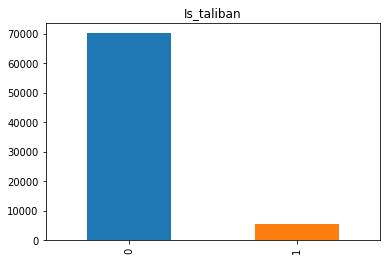

In [426]:
Is_taliban_total['Is_taliban'].value_counts().plot(kind='bar',title='Is_taliban')


### From the above graph. 
-- We see a huge difference between the two classes.
Hence, we use the following approach for predictions.

### Normal model.
-- In this case, the target class distribution will remain as it is with no changes.

### SMOTE technique

-- SMOTE is an oversampling method, it works by creating samples from the minor class instead of creating copies.

### Nearmiss 

-- NearMiss is an under-sampling technique. Instead of resampling the minority class using a distance, this will make the majority class equal to minority class

In [ ]:
Is_taliban_X.head(10)

In [327]:
Is_taliban_X.shape

(75589, 953)

In [429]:
Is_taliban_X_v1 = Is_taliban_X.fillna(Is_taliban_X.mean()) # impute mean

In [430]:
X = np.array(Is_taliban_X_v1)

In [431]:
y = np.array(Is_taliban_y)

In [432]:
classifier = RandomForestClassifier

In [433]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

### Build normal model 

In [434]:
Is_taliban_pipeline = make_pipeline(classifier(random_state = 42))

In [435]:
model_Is_taliban = Is_taliban_pipeline.fit(X_train, y_train.ravel())

C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [436]:
prediction_Is_taliban = model_Is_taliban.predict(X_test)

In [437]:
def print_results (headline, true_value, pred) :
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(f1_score(true_value, pred)))

### Smote imbalance learn

In [439]:

smote_pipeline_Is_taliban = make_pipeline_imb(SMOTE(random_state = 4), classifier(random_state = 42))

In [441]:
smote_model_Is_taliban = smote_pipeline_Is_taliban.fit(X_train, y_train.ravel())

In [442]:
smote_prediction_Is_taliban = smote_model_Is_taliban.predict(X_test)

### Build model with under sampling using Nearmiss technique

In [443]:
nearmiss_pipeline_Is_taliban = make_pipeline_imb(NearMiss(random_state = 42), classifier(random_state = 42))

In [446]:
near_miss_model_Is_taliban = nearmiss_pipeline_Is_taliban.fit(X_train, y_train.ravel())

In [447]:
nearmiss_prediction_Is_taliban = near_miss_model_Is_taliban.predict(X_test)

In [454]:
print()
print("normal data distribution: {}".format(Counter(Is_taliban_total['Is_taliban'])))
X_smote, y_smote = SMOTE().fit_sample(X,y)
print("Smote data distribution: {}".format(Counter(y_smote)))
X_nearmiss, y_nearmiss = NearMiss().fit_sample(X,y)
print("NearMiss data distribution: {}".format(Counter(y_nearmiss)))


normal data distribution: Counter({0: 70149, 1: 5440})


C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Smote data distribution: Counter({1: 70149, 0: 70149})


C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NearMiss data distribution: Counter({0: 5440, 1: 5440})


In [456]:
print(classification_report(y_test, prediction_Is_taliban))
print(classification_report_imbalanced(y_test, smote_prediction_Is_taliban))

print()
print('normal pipeline Score {}'. format(Is_taliban_pipeline.score(X_test, y_test)))
print('SMOTE pipeline Score {}'. format(smote_pipeline_Is_taliban.score(X_test, y_test)))
print('NearMiss Pipeline Score {}'. format(nearmiss_pipeline_Is_taliban.score(X_test, y_test)))

print()
print_results("normal classification", y_test, prediction_Is_taliban)
print()
print_results("SMOTE classification", y_test, smote_prediction_Is_taliban)
print()
print_results("NearMiss classification", y_test, nearmiss_prediction_Is_taliban)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21044
           1       0.86      0.81      0.83      1633

   micro avg       0.98      0.98      0.98     22677
   macro avg       0.92      0.90      0.91     22677
weighted avg       0.98      0.98      0.98     22677

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.83      0.99      0.91      0.83     21044
          1       0.83      0.83      0.99      0.83      0.91      0.81      1633

avg / total       0.98      0.98      0.84      0.98      0.91      0.83     22677


normal pipeline Score 0.9765842042598227
SMOTE pipeline Score 0.9754817656656525
NearMiss Pipeline Score 0.909600035278035

normal classification
accuracy: 0.9765842042598227
precision: 0.8591916558018253
recall: 0.807103490508267
f1: 0.8323334385854121

SMOTE classification
accuracy: 0.9754817656656525
precision: 0.8289554062309102
re

#### From the above analysis we the SMOTE approach having comparatively better results as compared to the other two approaches.

### Cross validation

In [457]:
kf = KFold(n_splits = 5, random_state = 42)
accuracy = []
precision = []
recall = []
f1 = []
auc = []
for train, test in kf.split(X_train, y_train):
    pipeline = make_pipeline_imb(SMOTE(), classifier(random_state = 42))
    model = pipeline.fit(X_train[train], y_train[train])
    prediction = model.predict(X_train[test])
    
    accuracy.append(pipeline.score(X_train[test], y_train[test]))
    precision.append(precision_score(y_train[test], prediction))
    recall.append(recall_score(y_train[test], prediction))
    f1.append(f1_score(y_train[test], prediction))
    auc.append(roc_auc_score(y_train[test], prediction))
    
print()
print("Means of scores 5-fold ")
print("accuracy: {}".format(np.mean(accuracy)))
print("precision: {}".format(np.mean(precision)))
print("recall: {}".format(np.mean(recall)))
print("f1: {}".format(np.mean(f1)))
print()

C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change


Means of scores 5-fold 
accuracy: 0.9752419271175767
precision: 0.8265001024341496
recall: 0.8308828432912436
f1: 0.8283726318305206



#### Model building over SMOTE using GradientBoostingClassifier

In [458]:
classifier_GBD = GradientBoostingClassifier

In [459]:
smote_pipeline = make_pipeline_imb(SMOTE(random_state = 4), classifier_GBD(random_state = 42))

In [460]:
smote_model = smote_pipeline.fit(X_train, y_train)

C:\Users\nsingh2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [461]:
smote_prediction = smote_model.predict(X_test)

In [462]:
print()
print('SMOTE pipeline Score {}'. format(smote_pipeline.score(X_test, y_test)))
print()
print_results("SMOTE classification", y_test, smote_prediction)


SMOTE pipeline Score 0.9638841116549808

SMOTE classification
accuracy: 0.9638841116549808
precision: 0.6691604322527016
recall: 0.9859154929577465
f1: 0.7972270363951474


#### The random forest classifier have better results as compared to GradientBoostingClassifier

### Model for predicted ISIL terrorist group

In [463]:
Is_ISIL = pd.DataFrame(DF_GTD, columns=['extended',	 'vicinity',	 'crit1',	 'crit2',	 'crit3',	 'doubtterr',	 'multiple',	 'success',	 'suicide',	 'guncertain1',	 'individual',	 'claimed',	 'nkill',	 'nwound',	 'ishostkid',	 'ransomamt',	 'nreleased',	 'INT_LOG',	 'INT_IDEO',	 'INT_MISC',	 'INT_ANY',	 'related',	 'Is_ISIL',	 'month_1',	 'month_2',	 'month_3',	 'month_4',	 'month_5',	 'month_6',	 'month_7',	 'month_8',	 'month_9',	 'month_10',	 'month_11',	 'country_4',	 'country_5',	 'country_6',	 'country_8',	 'country_11',	 'country_12',	 'country_14',	 'country_15',	 'country_16',	 'country_17',	 'country_18',	 'country_19',	 'country_21',	 'country_22',	 'country_25',	 'country_26',	 'country_28',	 'country_30',	 'country_32',	 'country_33',	 'country_34',	 'country_35',	 'country_36',	 'country_37',	 'country_38',	 'country_41',	 'country_42',	 'country_43',	 'country_44',	 'country_45',	 'country_47',	 'country_50',	 'country_53',	 'country_54',	 'country_55',	 'country_56',	 'country_58',	 'country_59',	 'country_60',	 'country_63',	 'country_64',	 'country_65',	 'country_68',	 'country_69',	 'country_74',	 'country_75',	 'country_76',	 'country_78',	 'country_83',	 'country_84',	 'country_85',	 'country_86',	 'country_87',	 'country_88',	 'country_90',	 'country_91',	 'country_92',	 'country_93',	 'country_94',	 'country_95',	 'country_96',	 'country_97',	 'country_98',	 'country_99',	 'country_100',	 'country_101',	 'country_102',	 'country_103',	 'country_104',	 'country_106',	 'country_107',	 'country_108',	 'country_110',	 'country_111',	 'country_112',	 'country_113',	 'country_118',	 'country_119',	 'country_121',	 'country_122',	 'country_123',	 'country_124',	 'country_128',	 'country_130',	 'country_132',	 'country_136',	 'country_137',	 'country_138',	 'country_141',	 'country_142',	 'country_144',	 'country_145',	 'country_146',	 'country_147',	 'country_151',	 'country_153',	 'country_155',	 'country_156',	 'country_158',	 'country_159',	 'country_160',	 'country_161',	 'country_162',	 'country_164',	 'country_167',	 'country_168',	 'country_173',	 'country_174',	 'country_177',	 'country_179',	 'country_182',	 'country_183',	 'country_184',	 'country_185',	 'country_186',	 'country_195',	 'country_198',	 'country_199',	 'country_200',	 'country_201',	 'country_202',	 'country_203',	 'country_205',	 'country_207',	 'country_208',	 'country_209',	 'country_210',	 'country_213',	 'country_214',	 'country_215',	 'country_217',	 'country_218',	 'country_219',	 'country_222',	 'country_228',	 'country_229',	 'country_231',	 'country_603',	 'country_1001',	 'country_1002',	 'country_1003',	 'Australasia & Oceania',	 'Central America & Caribbean',	 'Central Asia',	 'East Asia',	 'Eastern Europe',	 'Middle East & North Africa',	 'North America',	 'South America',	 'South Asia',	 'Southeast Asia',	 'Sub-Saharan Africa',	 'Specificity_1.0',	 'Specificity_2.0',	 'Specificity_3.0',	 'Specificity_4.0',	 'alternative_1.0',	 'alternative_2.0',	 'alternative_3.0',	 'alternative_4.0',	 'attacktype1_1',	 'attacktype1_2',	 'attacktype1_3',	 'attacktype1_4',	 'attacktype1_5',	 'attacktype1_6',	 'attacktype1_7',	 'attacktype1_8',	 'attacktype2_1.0',	 'attacktype2_2.0',	 'attacktype2_3.0',	 'attacktype2_4.0',	 'attacktype2_5.0',	 'attacktype2_6.0',	 'attacktype2_7.0',	 'attacktype2_8.0',	 'attacktype3_2.0',	 'attacktype3_3.0',	 'attacktype3_4.0',	 'attacktype3_6.0',	 'targtype1_1',	 'targtype1_2',	 'targtype1_3',	 'targtype1_4',	 'targtype1_5',	 'targtype1_6',	 'targtype1_7',	 'targtype1_8',	 'targtype1_9',	 'targtype1_10',	 'targtype1_11',	 'targtype1_12',	 'targtype1_13',	 'targtype1_14',	 'targtype1_15',	 'targtype1_16',	 'targtype1_17',	 'targtype1_18',	 'targtype1_19',	 'targtype1_20',	 'targtype1_21',	 'targsubtype1_1.0',	 'targsubtype1_2.0',	 'targsubtype1_3.0',	 'targsubtype1_4.0',	 'targsubtype1_5.0',	 'targsubtype1_6.0',	 'targsubtype1_7.0',	 'targsubtype1_8.0',	 'targsubtype1_9.0',	 'targsubtype1_10.0',	 'targsubtype1_11.0',	 'targsubtype1_12.0',	 'targsubtype1_13.0',	 'targsubtype1_14.0',	 'targsubtype1_15.0',	 'targsubtype1_16.0',	 'targsubtype1_17.0',	 'targsubtype1_18.0',	 'targsubtype1_19.0',	 'targsubtype1_20.0',	 'targsubtype1_21.0',	 'targsubtype1_22.0',	 'targsubtype1_23.0',	 'targsubtype1_24.0',	 'targsubtype1_25.0',	 'targsubtype1_26.0',	 'targsubtype1_27.0',	 'targsubtype1_28.0',	 'targsubtype1_29.0',	 'targsubtype1_30.0',	 'targsubtype1_31.0',	 'targsubtype1_32.0',	 'targsubtype1_33.0',	 'targsubtype1_34.0',	 'targsubtype1_35.0',	 'targsubtype1_36.0',	 'targsubtype1_37.0',	 'targsubtype1_39.0',	 'targsubtype1_40.0',	 'targsubtype1_42.0',	 'targsubtype1_43.0',	 'targsubtype1_44.0',	 'targsubtype1_45.0',	 'targsubtype1_46.0',	 'targsubtype1_47.0',	 'targsubtype1_48.0',	 'targsubtype1_49.0',	 'targsubtype1_50.0',	 'targsubtype1_51.0',	 'targsubtype1_52.0',	 'targsubtype1_53.0',	 'targsubtype1_54.0',	 'targsubtype1_55.0',	 'targsubtype1_56.0',	 'targsubtype1_57.0',	 'targsubtype1_58.0',	 'targsubtype1_59.0',	 'targsubtype1_60.0',	 'targsubtype1_61.0',	 'targsubtype1_62.0',	 'targsubtype1_63.0',	 'targsubtype1_64.0',	 'targsubtype1_65.0',	 'targsubtype1_66.0',	 'targsubtype1_67.0',	 'targsubtype1_68.0',	 'targsubtype1_69.0',	 'targsubtype1_70.0',	 'targsubtype1_71.0',	 'targsubtype1_72.0',	 'targsubtype1_73.0',	 'targsubtype1_74.0',	 'targsubtype1_75.0',	 'targsubtype1_76.0',	 'targsubtype1_77.0',	 'targsubtype1_78.0',	 'targsubtype1_79.0',	 'targsubtype1_80.0',	 'targsubtype1_81.0',	 'targsubtype1_82.0',	 'targsubtype1_83.0',	 'targsubtype1_84.0',	 'targsubtype1_85.0',	 'targsubtype1_86.0',	 'targsubtype1_87.0',	 'targsubtype1_88.0',	 'targsubtype1_89.0',	 'targsubtype1_90.0',	 'targsubtype1_91.0',	 'targsubtype1_92.0',	 'targsubtype1_93.0',	 'targsubtype1_94.0',	 'targsubtype1_96.0',	 'targsubtype1_97.0',	 'targsubtype1_98.0',	 'targsubtype1_99.0',	 'targsubtype1_100.0',	 'targsubtype1_101.0',	 'targsubtype1_102.0',	 'targsubtype1_103.0',	 'targsubtype1_104.0',	 'targsubtype1_105.0',	 'targsubtype1_106.0',	 'targsubtype1_107.0',	 'targsubtype1_108.0',	 'targsubtype1_109.0',	 'targsubtype1_110.0',	 'natlty1_4.0',	 'natlty1_5.0',	 'natlty1_6.0',	 'natlty1_8.0',	 'natlty1_11.0',	 'natlty1_12.0',	 'natlty1_14.0',	 'natlty1_15.0',	 'natlty1_16.0',	 'natlty1_17.0',	 'natlty1_18.0',	 'natlty1_19.0',	 'natlty1_21.0',	 'natlty1_22.0',	 'natlty1_25.0',	 'natlty1_26.0',	 'natlty1_28.0',	 'natlty1_30.0',	 'natlty1_32.0',	 'natlty1_33.0',	 'natlty1_34.0',	 'natlty1_35.0',	 'natlty1_36.0',	 'natlty1_37.0',	 'natlty1_38.0',	 'natlty1_41.0',	 'natlty1_42.0',	 'natlty1_43.0',	 'natlty1_44.0',	 'natlty1_45.0',	 'natlty1_47.0',	 'natlty1_50.0',	 'natlty1_53.0',	 'natlty1_54.0',	 'natlty1_55.0',	 'natlty1_56.0',	 'natlty1_58.0',	 'natlty1_59.0',	 'natlty1_60.0',	 'natlty1_63.0',	 'natlty1_64.0',	 'natlty1_65.0',	 'natlty1_68.0',	 'natlty1_69.0',	 'natlty1_74.0',	 'natlty1_75.0',	 'natlty1_76.0',	 'natlty1_78.0',	 'natlty1_83.0',	 'natlty1_84.0',	 'natlty1_85.0',	 'natlty1_86.0',	 'natlty1_87.0',	 'natlty1_88.0',	 'natlty1_89.0',	 'natlty1_90.0',	 'natlty1_91.0',	 'natlty1_92.0',	 'natlty1_93.0',	 'natlty1_94.0',	 'natlty1_95.0',	 'natlty1_96.0',	 'natlty1_97.0',	 'natlty1_98.0',	 'natlty1_99.0',	 'natlty1_100.0',	 'natlty1_101.0',	 'natlty1_102.0',	 'natlty1_103.0',	 'natlty1_104.0',	 'natlty1_106.0',	 'natlty1_107.0',	 'natlty1_108.0',	 'natlty1_109.0',	 'natlty1_110.0',	 'natlty1_111.0',	 'natlty1_112.0',	 'natlty1_113.0',	 'natlty1_115.0',	 'natlty1_116.0',	 'natlty1_118.0',	 'natlty1_119.0',	 'natlty1_120.0',	 'natlty1_121.0',	 'natlty1_122.0',	 'natlty1_123.0',	 'natlty1_124.0',	 'natlty1_128.0',	 'natlty1_130.0',	 'natlty1_132.0',	 'natlty1_136.0',	 'natlty1_137.0',	 'natlty1_138.0',	 'natlty1_139.0',	 'natlty1_141.0',	 'natlty1_142.0',	 'natlty1_144.0',	 'natlty1_145.0',	 'natlty1_146.0',	 'natlty1_147.0',	 'natlty1_149.0',	 'natlty1_151.0',	 'natlty1_153.0',	 'natlty1_155.0',	 'natlty1_156.0',	 'natlty1_158.0',	 'natlty1_159.0',	 'natlty1_160.0',	 'natlty1_161.0',	 'natlty1_162.0',	 'natlty1_164.0',	 'natlty1_166.0',	 'natlty1_167.0',	 'natlty1_168.0',	 'natlty1_169.0',	 'natlty1_173.0',	 'natlty1_174.0',	 'natlty1_177.0',	 'natlty1_178.0',	 'natlty1_179.0',	 'natlty1_181.0',	 'natlty1_182.0',	 'natlty1_183.0',	 'natlty1_184.0',	 'natlty1_185.0',	 'natlty1_186.0',	 'natlty1_195.0',	 'natlty1_198.0',	 'natlty1_199.0',	 'natlty1_200.0',	 'natlty1_201.0',	 'natlty1_202.0',	 'natlty1_203.0',	 'natlty1_204.0',	 'natlty1_205.0',	 'natlty1_207.0',	 'natlty1_208.0',	 'natlty1_209.0',	 'natlty1_210.0',	 'natlty1_212.0',	 'natlty1_213.0',	 'natlty1_214.0',	 'natlty1_215.0',	 'natlty1_216.0',	 'natlty1_217.0',	 'natlty1_218.0',	 'natlty1_219.0',	 'natlty1_221.0',	 'natlty1_222.0',	 'natlty1_223.0',	 'natlty1_228.0',	 'natlty1_229.0',	 'natlty1_230.0',	 'natlty1_231.0',	 'natlty1_233.0',	 'natlty1_238.0',	 'natlty1_334.0',	 'natlty1_422.0',	 'natlty1_603.0',	 'natlty1_999.0',	 'natlty1_1001.0',	 'natlty1_1002.0',	 'natlty1_1003.0',	 'targtype2_1.0',	 'targtype2_2.0',	 'targtype2_3.0',	 'targtype2_4.0',	 'targtype2_6.0',	 'targtype2_7.0',	 'targtype2_8.0',	 'targtype2_9.0',	 'targtype2_10.0',	 'targtype2_11.0',	 'targtype2_12.0',	 'targtype2_13.0',	 'targtype2_14.0',	 'targtype2_15.0',	 'targtype2_16.0',	 'targtype2_17.0',	 'targtype2_18.0',	 'targtype2_19.0',	 'targtype2_21.0',	 'targsubtype2_1.0',	 'targsubtype2_2.0',	 'targsubtype2_3.0',	 'targsubtype2_4.0',	 'targsubtype2_5.0',	 'targsubtype2_6.0',	 'targsubtype2_7.0',	 'targsubtype2_8.0',	 'targsubtype2_9.0',	 'targsubtype2_10.0',	 'targsubtype2_11.0',	 'targsubtype2_12.0',	 'targsubtype2_13.0',	 'targsubtype2_14.0',	 'targsubtype2_15.0',	 'targsubtype2_16.0',	 'targsubtype2_17.0',	 'targsubtype2_18.0',	 'targsubtype2_19.0',	 'targsubtype2_20.0',	 'targsubtype2_21.0',	 'targsubtype2_22.0',	 'targsubtype2_23.0',	 'targsubtype2_24.0',	 'targsubtype2_25.0',	 'targsubtype2_27.0',	 'targsubtype2_29.0',	 'targsubtype2_34.0',	 'targsubtype2_37.0',	 'targsubtype2_44.0',	 'targsubtype2_45.0',	 'targsubtype2_46.0',	 'targsubtype2_47.0',	 'targsubtype2_48.0',	 'targsubtype2_49.0',	 'targsubtype2_50.0',	 'targsubtype2_52.0',	 'targsubtype2_54.0',	 'targsubtype2_55.0',	 'targsubtype2_56.0',	 'targsubtype2_58.0',	 'targsubtype2_61.0',	 'targsubtype2_62.0',	 'targsubtype2_64.0',	 'targsubtype2_67.0',	 'targsubtype2_68.0',	 'targsubtype2_69.0',	 'targsubtype2_70.0',	 'targsubtype2_71.0',	 'targsubtype2_73.0',	 'targsubtype2_74.0',	 'targsubtype2_75.0',	 'targsubtype2_76.0',	 'targsubtype2_77.0',	 'targsubtype2_78.0',	 'targsubtype2_79.0',	 'targsubtype2_84.0',	 'targsubtype2_85.0',	 'targsubtype2_86.0',	 'targsubtype2_90.0',	 'targsubtype2_93.0',	 'targsubtype2_96.0',	 'targsubtype2_97.0',	 'targsubtype2_99.0',	 'targsubtype2_100.0',	 'targsubtype2_101.0',	 'targsubtype2_103.0',	 'targsubtype2_105.0',	 'targsubtype2_106.0',	 'targsubtype2_107.0',	 'natlty2_4.0',	 'natlty2_6.0',	 'natlty2_8.0',	 'natlty2_14.0',	 'natlty2_15.0',	 'natlty2_18.0',	 'natlty2_19.0',	 'natlty2_21.0',	 'natlty2_28.0',	 'natlty2_33.0',	 'natlty2_34.0',	 'natlty2_35.0',	 'natlty2_37.0',	 'natlty2_38.0',	 'natlty2_41.0',	 'natlty2_42.0',	 'natlty2_43.0',	 'natlty2_44.0',	 'natlty2_45.0',	 'natlty2_47.0',	 'natlty2_54.0',	 'natlty2_55.0',	 'natlty2_56.0',	 'natlty2_60.0',	 'natlty2_65.0',	 'natlty2_67.0',	 'natlty2_69.0',	 'natlty2_74.0',	 'natlty2_75.0',	 'natlty2_76.0',	 'natlty2_78.0',	 'natlty2_90.0',	 'natlty2_92.0',	 'natlty2_93.0',	 'natlty2_94.0',	 'natlty2_95.0',	 'natlty2_97.0',	 'natlty2_98.0',	 'natlty2_99.0',	 'natlty2_102.0',	 'natlty2_103.0',	 'natlty2_104.0',	 'natlty2_107.0',	 'natlty2_108.0',	 'natlty2_110.0',	 'natlty2_111.0',	 'natlty2_113.0',	 'natlty2_118.0',	 'natlty2_119.0',	 'natlty2_121.0',	 'natlty2_123.0',	 'natlty2_130.0',	 'natlty2_136.0',	 'natlty2_137.0',	 'natlty2_138.0',	 'natlty2_141.0',	 'natlty2_142.0',	 'natlty2_144.0',	 'natlty2_146.0',	 'natlty2_147.0',	 'natlty2_151.0',	 'natlty2_153.0',	 'natlty2_155.0',	 'natlty2_158.0',	 'natlty2_159.0',	 'natlty2_160.0',	 'natlty2_161.0',	 'natlty2_162.0',	 'natlty2_164.0',	 'natlty2_167.0',	 'natlty2_168.0',	 'natlty2_173.0',	 'natlty2_174.0',	 'natlty2_182.0',	 'natlty2_184.0',	 'natlty2_185.0',	 'natlty2_186.0',	 'natlty2_195.0',	 'natlty2_198.0',	 'natlty2_199.0',	 'natlty2_200.0',	 'natlty2_203.0',	 'natlty2_204.0',	 'natlty2_205.0',	 'natlty2_206.0',	 'natlty2_208.0',	 'natlty2_209.0',	 'natlty2_213.0',	 'natlty2_214.0',	 'natlty2_215.0',	 'natlty2_216.0',	 'natlty2_217.0',	 'natlty2_222.0',	 'natlty2_223.0',	 'natlty2_228.0',	 'natlty2_229.0',	 'natlty2_233.0',	 'natlty2_238.0',	 'natlty2_422.0',	 'natlty2_999.0',	 'natlty2_1003.0',	 'targtype3_1.0',	 'targtype3_2.0',	 'targtype3_3.0',	 'targtype3_4.0',	 'targtype3_6.0',	 'targtype3_7.0',	 'targtype3_8.0',	 'targtype3_9.0',	 'targtype3_10.0',	 'targtype3_11.0',	 'targtype3_12.0',	 'targtype3_13.0',	 'targtype3_14.0',	 'targtype3_15.0',	 'targtype3_16.0',	 'targtype3_17.0',	 'targtype3_18.0',	 'targtype3_19.0',	 'targsubtype3_1.0',	 'targsubtype3_2.0',	 'targsubtype3_3.0',	 'targsubtype3_4.0',	 'targsubtype3_5.0',	 'targsubtype3_6.0',	 'targsubtype3_7.0',	 'targsubtype3_8.0',	 'targsubtype3_9.0',	 'targsubtype3_10.0',	 'targsubtype3_12.0',	 'targsubtype3_13.0',	 'targsubtype3_14.0',	 'targsubtype3_15.0',	 'targsubtype3_17.0',	 'targsubtype3_18.0',	 'targsubtype3_20.0',	 'targsubtype3_21.0',	 'targsubtype3_22.0',	 'targsubtype3_23.0',	 'targsubtype3_24.0',	 'targsubtype3_25.0',	 'targsubtype3_27.0',	 'targsubtype3_29.0',	 'targsubtype3_33.0',	 'targsubtype3_34.0',	 'targsubtype3_35.0',	 'targsubtype3_36.0',	 'targsubtype3_39.0',	 'targsubtype3_44.0',	 'targsubtype3_46.0',	 'targsubtype3_48.0',	 'targsubtype3_49.0',	 'targsubtype3_50.0',	 'targsubtype3_52.0',	 'targsubtype3_53.0',	 'targsubtype3_54.0',	 'targsubtype3_55.0',	 'targsubtype3_57.0',	 'targsubtype3_58.0',	 'targsubtype3_61.0',	 'targsubtype3_62.0',	 'targsubtype3_63.0',	 'targsubtype3_64.0',	 'targsubtype3_65.0',	 'targsubtype3_67.0',	 'targsubtype3_68.0',	 'targsubtype3_69.0',	 'targsubtype3_70.0',	 'targsubtype3_71.0',	 'targsubtype3_73.0',	 'targsubtype3_74.0',	 'targsubtype3_75.0',	 'targsubtype3_76.0',	 'targsubtype3_77.0',	 'targsubtype3_78.0',	 'targsubtype3_79.0',	 'targsubtype3_80.0',	 'targsubtype3_82.0',	 'targsubtype3_83.0',	 'targsubtype3_84.0',	 'targsubtype3_85.0',	 'targsubtype3_86.0',	 'targsubtype3_90.0',	 'targsubtype3_92.0',	 'targsubtype3_93.0',	 'targsubtype3_94.0',	 'targsubtype3_97.0',	 'targsubtype3_99.0',	 'targsubtype3_104.0',	 'natlty3_4.0',	 'natlty3_6.0',	 'natlty3_14.0',	 'natlty3_19.0',	 'natlty3_33.0',	 'natlty3_34.0',	 'natlty3_37.0',	 'natlty3_38.0',	 'natlty3_41.0',	 'natlty3_45.0',	 'natlty3_59.0',	 'natlty3_60.0',	 'natlty3_65.0',	 'natlty3_69.0',	 'natlty3_74.0',	 'natlty3_75.0',	 'natlty3_92.0',	 'natlty3_93.0',	 'natlty3_94.0',	 'natlty3_95.0',	 'natlty3_97.0',	 'natlty3_98.0',	 'natlty3_99.0',	 'natlty3_102.0',	 'natlty3_103.0',	 'natlty3_104.0',	 'natlty3_110.0',	 'natlty3_113.0',	 'natlty3_118.0',	 'natlty3_119.0',	 'natlty3_123.0',	 'natlty3_137.0',	 'natlty3_138.0',	 'natlty3_142.0',	 'natlty3_147.0',	 'natlty3_151.0',	 'natlty3_153.0',	 'natlty3_155.0',	 'natlty3_160.0',	 'natlty3_166.0',	 'natlty3_167.0',	 'natlty3_173.0',	 'natlty3_182.0',	 'natlty3_183.0',	 'natlty3_185.0',	 'natlty3_195.0',	 'natlty3_198.0',	 'natlty3_200.0',	 'natlty3_205.0',	 'natlty3_209.0',	 'natlty3_210.0',	 'natlty3_213.0',	 'natlty3_214.0',	 'natlty3_216.0',	 'natlty3_217.0',	 'natlty3_228.0',	 'natlty3_229.0',	 'natlty3_422.0',	 'natlty3_999.0',	 'claimmode_1.0',	 'claimmode_2.0',	 'claimmode_3.0',	 'claimmode_4.0',	 'claimmode_5.0',	 'claimmode_6.0',	 'claimmode_7.0',	 'claimmode_8.0',	 'claimmode_9.0',	 'weaptype1_1',	 'weaptype1_2',	 'weaptype1_5',	 'weaptype1_6',	 'weaptype1_7',	 'weaptype1_8',	 'weaptype1_9',	 'weaptype1_10',	 'weaptype1_11',	 'weaptype1_12',	 'weapsubtype1_1.0',	 'weapsubtype1_2.0',	 'weapsubtype1_3.0',	 'weapsubtype1_4.0',	 'weapsubtype1_5.0',	 'weapsubtype1_6.0',	 'weapsubtype1_7.0',	 'weapsubtype1_8.0',	 'weapsubtype1_9.0',	 'weapsubtype1_10.0',	 'weapsubtype1_11.0',	 'weapsubtype1_12.0',	 'weapsubtype1_13.0',	 'weapsubtype1_14.0',	 'weapsubtype1_15.0',	 'weapsubtype1_16.0',	 'weapsubtype1_17.0',	 'weapsubtype1_18.0',	 'weapsubtype1_19.0',	 'weapsubtype1_20.0',	 'weapsubtype1_21.0',	 'weapsubtype1_22.0',	 'weapsubtype1_23.0',	 'weapsubtype1_24.0',	 'weapsubtype1_26.0',	 'weapsubtype1_27.0',	 'weapsubtype1_28.0',	 'weapsubtype1_29.0',	 'weaptype2_1.0',	 'weaptype2_2.0',	 'weaptype2_5.0',	 'weaptype2_6.0',	 'weaptype2_7.0',	 'weaptype2_8.0',	 'weaptype2_9.0',	 'weaptype2_10.0',	 'weaptype2_11.0',	 'weaptype2_12.0',	 'weapsubtype2_1.0',	 'weapsubtype2_2.0',	 'weapsubtype2_3.0',	 'weapsubtype2_4.0',	 'weapsubtype2_5.0',	 'weapsubtype2_6.0',	 'weapsubtype2_7.0',	 'weapsubtype2_8.0',	 'weapsubtype2_10.0',	 'weapsubtype2_11.0',	 'weapsubtype2_12.0',	 'weapsubtype2_13.0',	 'weapsubtype2_14.0',	 'weapsubtype2_15.0',	 'weapsubtype2_16.0',	 'weapsubtype2_17.0',	 'weapsubtype2_18.0',	 'weapsubtype2_19.0',	 'weapsubtype2_20.0',	 'weapsubtype2_21.0',	 'weapsubtype2_22.0',	 'weapsubtype2_23.0',	 'weapsubtype2_24.0',	 'weapsubtype2_27.0',	 'weapsubtype2_28.0',	 'weaptype3_2.0',	 'weaptype3_5.0',	 'weaptype3_6.0',	 'weaptype3_7.0',	 'weaptype3_8.0',	 'weaptype3_9.0',	 'weaptype3_10.0',	 'weaptype3_11.0',	 'weaptype3_12.0',	 'weapsubtype3_1.0',	 'weapsubtype3_2.0',	 'weapsubtype3_3.0',	 'weapsubtype3_4.0',	 'weapsubtype3_5.0',	 'weapsubtype3_6.0',	 'weapsubtype3_7.0',	 'weapsubtype3_11.0',	 'weapsubtype3_16.0',	 'weapsubtype3_17.0',	 'weapsubtype3_18.0',	 'weapsubtype3_19.0',	 'weapsubtype3_20.0',	 'weapsubtype3_21.0',	 'weapsubtype3_22.0',	 'weapsubtype3_23.0',	 'weapsubtype3_24.0',	 'weapsubtype3_26.0',	 'weapsubtype3_27.0',	 'weaptype4_5.0',	 'weapsubtype4_2.0',	 'weapsubtype4_4.0',	 'property_-9',	 'property_0',	 'ishostkid_-9.0',	 'ishostkid_0.0'])

In [464]:
IS_ISIL_X = pd.DataFrame(Is_ISIL, columns=['extended',	 'vicinity',	 'crit1',	 'crit2',	 'crit3',	 'doubtterr',	 'multiple',	 'success',	 'suicide',	 'guncertain1',	 'individual',	 'claimed',	 'ishostkid',	 'ransomamt',	 'INT_LOG',	 'INT_IDEO',	 'INT_MISC',	 'INT_ANY',	 'month_1',	 'month_2',	 'month_3',	 'month_4',	 'month_5',	 'month_6',	 'month_7',	 'month_8',	 'month_9',	 'month_10',	 'month_11',	 'country_4',	 'country_5',	 'country_6',	 'country_8',	 'country_11',	 'country_12',	 'country_14',	 'country_15',	 'country_16',	 'country_17',	 'country_18',	 'country_19',	 'country_21',	 'country_22',	 'country_25',	 'country_26',	 'country_28',	 'country_30',	 'country_32',	 'country_33',	 'country_34',	 'country_35',	 'country_36',	 'country_37',	 'country_38',	 'country_41',	 'country_42',	 'country_43',	 'country_44',	 'country_45',	 'country_47',	 'country_50',	 'country_53',	 'country_54',	 'country_55',	 'country_56',	 'country_58',	 'country_59',	 'country_60',	 'country_63',	 'country_64',	 'country_65',	 'country_68',	 'country_69',	 'country_74',	 'country_75',	 'country_76',	 'country_78',	 'country_83',	 'country_84',	 'country_85',	 'country_86',	 'country_87',	 'country_88',	 'country_90',	 'country_91',	 'country_92',	 'country_93',	 'country_94',	 'country_95',	 'country_96',	 'country_97',	 'country_98',	 'country_99',	 'country_100',	 'country_101',	 'country_102',	 'country_103',	 'country_104',	 'country_106',	 'country_107',	 'country_108',	 'country_110',	 'country_111',	 'country_112',	 'country_113',	 'country_118',	 'country_119',	 'country_121',	 'country_122',	 'country_123',	 'country_124',	 'country_128',	 'country_130',	 'country_132',	 'country_136',	 'country_137',	 'country_138',	 'country_141',	 'country_142',	 'country_144',	 'country_145',	 'country_146',	 'country_147',	 'country_151',	 'country_153',	 'country_155',	 'country_156',	 'country_158',	 'country_159',	 'country_160',	 'country_161',	 'country_162',	 'country_164',	 'country_167',	 'country_168',	 'country_173',	 'country_174',	 'country_177',	 'country_179',	 'country_182',	 'country_183',	 'country_184',	 'country_185',	 'country_186',	 'country_195',	 'country_198',	 'country_199',	 'country_200',	 'country_201',	 'country_202',	 'country_203',	 'country_205',	 'country_207',	 'country_208',	 'country_209',	 'country_210',	 'country_213',	 'country_214',	 'country_215',	 'country_217',	 'country_218',	 'country_219',	 'country_222',	 'country_228',	 'country_229',	 'country_231',	 'country_603',	 'country_1001',	 'country_1002',	 'country_1003',	 'Australasia & Oceania',	 'Central America & Caribbean',	 'Central Asia',	 'East Asia',	 'Eastern Europe',	 'Middle East & North Africa',	 'North America',	 'South America',	 'South Asia',	 'Southeast Asia',	 'Sub-Saharan Africa',	 'Specificity_1.0',	 'Specificity_2.0',	 'Specificity_3.0',	 'Specificity_4.0',	 'alternative_1.0',	 'alternative_2.0',	 'alternative_3.0',	 'alternative_4.0',	 'attacktype1_1',	 'attacktype1_2',	 'attacktype1_3',	 'attacktype1_4',	 'attacktype1_5',	 'attacktype1_6',	 'attacktype1_7',	 'attacktype1_8',	 'attacktype2_1.0',	 'attacktype2_2.0',	 'attacktype2_3.0',	 'attacktype2_4.0',	 'attacktype2_5.0',	 'attacktype2_6.0',	 'attacktype2_7.0',	 'attacktype2_8.0',	 'attacktype3_2.0',	 'attacktype3_3.0',	 'attacktype3_4.0',	 'attacktype3_6.0',	 'targtype1_1',	 'targtype1_2',	 'targtype1_3',	 'targtype1_4',	 'targtype1_5',	 'targtype1_6',	 'targtype1_7',	 'targtype1_8',	 'targtype1_9',	 'targtype1_10',	 'targtype1_11',	 'targtype1_12',	 'targtype1_13',	 'targtype1_14',	 'targtype1_15',	 'targtype1_16',	 'targtype1_17',	 'targtype1_18',	 'targtype1_19',	 'targtype1_20',	 'targtype1_21',	 'targsubtype1_1.0',	 'targsubtype1_2.0',	 'targsubtype1_3.0',	 'targsubtype1_4.0',	 'targsubtype1_5.0',	 'targsubtype1_6.0',	 'targsubtype1_7.0',	 'targsubtype1_8.0',	 'targsubtype1_9.0',	 'targsubtype1_10.0',	 'targsubtype1_11.0',	 'targsubtype1_12.0',	 'targsubtype1_13.0',	 'targsubtype1_14.0',	 'targsubtype1_15.0',	 'targsubtype1_16.0',	 'targsubtype1_17.0',	 'targsubtype1_18.0',	 'targsubtype1_19.0',	 'targsubtype1_20.0',	 'targsubtype1_21.0',	 'targsubtype1_22.0',	 'targsubtype1_23.0',	 'targsubtype1_24.0',	 'targsubtype1_25.0',	 'targsubtype1_26.0',	 'targsubtype1_27.0',	 'targsubtype1_28.0',	 'targsubtype1_29.0',	 'targsubtype1_30.0',	 'targsubtype1_31.0',	 'targsubtype1_32.0',	 'targsubtype1_33.0',	 'targsubtype1_34.0',	 'targsubtype1_35.0',	 'targsubtype1_36.0',	 'targsubtype1_37.0',	 'targsubtype1_39.0',	 'targsubtype1_40.0',	 'targsubtype1_42.0',	 'targsubtype1_43.0',	 'targsubtype1_44.0',	 'targsubtype1_45.0',	 'targsubtype1_46.0',	 'targsubtype1_47.0',	 'targsubtype1_48.0',	 'targsubtype1_49.0',	 'targsubtype1_50.0',	 'targsubtype1_51.0',	 'targsubtype1_52.0',	 'targsubtype1_53.0',	 'targsubtype1_54.0',	 'targsubtype1_55.0',	 'targsubtype1_56.0',	 'targsubtype1_57.0',	 'targsubtype1_58.0',	 'targsubtype1_59.0',	 'targsubtype1_60.0',	 'targsubtype1_61.0',	 'targsubtype1_62.0',	 'targsubtype1_63.0',	 'targsubtype1_64.0',	 'targsubtype1_65.0',	 'targsubtype1_66.0',	 'targsubtype1_67.0',	 'targsubtype1_68.0',	 'targsubtype1_69.0',	 'targsubtype1_70.0',	 'targsubtype1_71.0',	 'targsubtype1_72.0',	 'targsubtype1_73.0',	 'targsubtype1_74.0',	 'targsubtype1_75.0',	 'targsubtype1_76.0',	 'targsubtype1_77.0',	 'targsubtype1_78.0',	 'targsubtype1_79.0',	 'targsubtype1_80.0',	 'targsubtype1_81.0',	 'targsubtype1_82.0',	 'targsubtype1_83.0',	 'targsubtype1_84.0',	 'targsubtype1_85.0',	 'targsubtype1_86.0',	 'targsubtype1_87.0',	 'targsubtype1_88.0',	 'targsubtype1_89.0',	 'targsubtype1_90.0',	 'targsubtype1_91.0',	 'targsubtype1_92.0',	 'targsubtype1_93.0',	 'targsubtype1_94.0',	 'targsubtype1_96.0',	 'targsubtype1_97.0',	 'targsubtype1_98.0',	 'targsubtype1_99.0',	 'targsubtype1_100.0',	 'targsubtype1_101.0',	 'targsubtype1_102.0',	 'targsubtype1_103.0',	 'targsubtype1_104.0',	 'targsubtype1_105.0',	 'targsubtype1_106.0',	 'targsubtype1_107.0',	 'targsubtype1_108.0',	 'targsubtype1_109.0',	 'targsubtype1_110.0',	 'natlty1_4.0',	 'natlty1_5.0',	 'natlty1_6.0',	 'natlty1_8.0',	 'natlty1_11.0',	 'natlty1_12.0',	 'natlty1_14.0',	 'natlty1_15.0',	 'natlty1_16.0',	 'natlty1_17.0',	 'natlty1_18.0',	 'natlty1_19.0',	 'natlty1_21.0',	 'natlty1_22.0',	 'natlty1_25.0',	 'natlty1_26.0',	 'natlty1_28.0',	 'natlty1_30.0',	 'natlty1_32.0',	 'natlty1_33.0',	 'natlty1_34.0',	 'natlty1_35.0',	 'natlty1_36.0',	 'natlty1_37.0',	 'natlty1_38.0',	 'natlty1_41.0',	 'natlty1_42.0',	 'natlty1_43.0',	 'natlty1_44.0',	 'natlty1_45.0',	 'natlty1_47.0',	 'natlty1_50.0',	 'natlty1_53.0',	 'natlty1_54.0',	 'natlty1_55.0',	 'natlty1_56.0',	 'natlty1_58.0',	 'natlty1_59.0',	 'natlty1_60.0',	 'natlty1_63.0',	 'natlty1_64.0',	 'natlty1_65.0',	 'natlty1_68.0',	 'natlty1_69.0',	 'natlty1_74.0',	 'natlty1_75.0',	 'natlty1_76.0',	 'natlty1_78.0',	 'natlty1_83.0',	 'natlty1_84.0',	 'natlty1_85.0',	 'natlty1_86.0',	 'natlty1_87.0',	 'natlty1_88.0',	 'natlty1_89.0',	 'natlty1_90.0',	 'natlty1_91.0',	 'natlty1_92.0',	 'natlty1_93.0',	 'natlty1_94.0',	 'natlty1_95.0',	 'natlty1_96.0',	 'natlty1_97.0',	 'natlty1_98.0',	 'natlty1_99.0',	 'natlty1_100.0',	 'natlty1_101.0',	 'natlty1_102.0',	 'natlty1_103.0',	 'natlty1_104.0',	 'natlty1_106.0',	 'natlty1_107.0',	 'natlty1_108.0',	 'natlty1_109.0',	 'natlty1_110.0',	 'natlty1_111.0',	 'natlty1_112.0',	 'natlty1_113.0',	 'natlty1_115.0',	 'natlty1_116.0',	 'natlty1_118.0',	 'natlty1_119.0',	 'natlty1_120.0',	 'natlty1_121.0',	 'natlty1_122.0',	 'natlty1_123.0',	 'natlty1_124.0',	 'natlty1_128.0',	 'natlty1_130.0',	 'natlty1_132.0',	 'natlty1_136.0',	 'natlty1_137.0',	 'natlty1_138.0',	 'natlty1_139.0',	 'natlty1_141.0',	 'natlty1_142.0',	 'natlty1_144.0',	 'natlty1_145.0',	 'natlty1_146.0',	 'natlty1_147.0',	 'natlty1_149.0',	 'natlty1_151.0',	 'natlty1_153.0',	 'natlty1_155.0',	 'natlty1_156.0',	 'natlty1_158.0',	 'natlty1_159.0',	 'natlty1_160.0',	 'natlty1_161.0',	 'natlty1_162.0',	 'natlty1_164.0',	 'natlty1_166.0',	 'natlty1_167.0',	 'natlty1_168.0',	 'natlty1_169.0',	 'natlty1_173.0',	 'natlty1_174.0',	 'natlty1_177.0',	 'natlty1_178.0',	 'natlty1_179.0',	 'natlty1_181.0',	 'natlty1_182.0',	 'natlty1_183.0',	 'natlty1_184.0',	 'natlty1_185.0',	 'natlty1_186.0',	 'natlty1_195.0',	 'natlty1_198.0',	 'natlty1_199.0',	 'natlty1_200.0',	 'natlty1_201.0',	 'natlty1_202.0',	 'natlty1_203.0',	 'natlty1_204.0',	 'natlty1_205.0',	 'natlty1_207.0',	 'natlty1_208.0',	 'natlty1_209.0',	 'natlty1_210.0',	 'natlty1_212.0',	 'natlty1_213.0',	 'natlty1_214.0',	 'natlty1_215.0',	 'natlty1_216.0',	 'natlty1_217.0',	 'natlty1_218.0',	 'natlty1_219.0',	 'natlty1_221.0',	 'natlty1_222.0',	 'natlty1_223.0',	 'natlty1_228.0',	 'natlty1_229.0',	 'natlty1_230.0',	 'natlty1_231.0',	 'natlty1_233.0',	 'natlty1_238.0',	 'natlty1_334.0',	 'natlty1_422.0',	 'natlty1_603.0',	 'natlty1_999.0',	 'natlty1_1001.0',	 'natlty1_1002.0',	 'natlty1_1003.0',	 'targtype2_1.0',	 'targtype2_2.0',	 'targtype2_3.0',	 'targtype2_4.0',	 'targtype2_6.0',	 'targtype2_7.0',	 'targtype2_8.0',	 'targtype2_9.0',	 'targtype2_10.0',	 'targtype2_11.0',	 'targtype2_12.0',	 'targtype2_13.0',	 'targtype2_14.0',	 'targtype2_15.0',	 'targtype2_16.0',	 'targtype2_17.0',	 'targtype2_18.0',	 'targtype2_19.0',	 'targtype2_21.0',	 'targsubtype2_1.0',	 'targsubtype2_2.0',	 'targsubtype2_3.0',	 'targsubtype2_4.0',	 'targsubtype2_5.0',	 'targsubtype2_6.0',	 'targsubtype2_7.0',	 'targsubtype2_8.0',	 'targsubtype2_9.0',	 'targsubtype2_10.0',	 'targsubtype2_11.0',	 'targsubtype2_12.0',	 'targsubtype2_13.0',	 'targsubtype2_14.0',	 'targsubtype2_15.0',	 'targsubtype2_16.0',	 'targsubtype2_17.0',	 'targsubtype2_18.0',	 'targsubtype2_19.0',	 'targsubtype2_20.0',	 'targsubtype2_21.0',	 'targsubtype2_22.0',	 'targsubtype2_23.0',	 'targsubtype2_24.0',	 'targsubtype2_25.0',	 'targsubtype2_27.0',	 'targsubtype2_29.0',	 'targsubtype2_34.0',	 'targsubtype2_37.0',	 'targsubtype2_44.0',	 'targsubtype2_45.0',	 'targsubtype2_46.0',	 'targsubtype2_47.0',	 'targsubtype2_48.0',	 'targsubtype2_49.0',	 'targsubtype2_50.0',	 'targsubtype2_52.0',	 'targsubtype2_54.0',	 'targsubtype2_55.0',	 'targsubtype2_56.0',	 'targsubtype2_58.0',	 'targsubtype2_61.0',	 'targsubtype2_62.0',	 'targsubtype2_64.0',	 'targsubtype2_67.0',	 'targsubtype2_68.0',	 'targsubtype2_69.0',	 'targsubtype2_70.0',	 'targsubtype2_71.0',	 'targsubtype2_73.0',	 'targsubtype2_74.0',	 'targsubtype2_75.0',	 'targsubtype2_76.0',	 'targsubtype2_77.0',	 'targsubtype2_78.0',	 'targsubtype2_79.0',	 'targsubtype2_84.0',	 'targsubtype2_85.0',	 'targsubtype2_86.0',	 'targsubtype2_90.0',	 'targsubtype2_93.0',	 'targsubtype2_96.0',	 'targsubtype2_97.0',	 'targsubtype2_99.0',	 'targsubtype2_100.0',	 'targsubtype2_101.0',	 'targsubtype2_103.0',	 'targsubtype2_105.0',	 'targsubtype2_106.0',	 'targsubtype2_107.0',	 'natlty2_4.0',	 'natlty2_6.0',	 'natlty2_8.0',	 'natlty2_14.0',	 'natlty2_15.0',	 'natlty2_18.0',	 'natlty2_19.0',	 'natlty2_21.0',	 'natlty2_28.0',	 'natlty2_33.0',	 'natlty2_34.0',	 'natlty2_35.0',	 'natlty2_37.0',	 'natlty2_38.0',	 'natlty2_41.0',	 'natlty2_42.0',	 'natlty2_43.0',	 'natlty2_44.0',	 'natlty2_45.0',	 'natlty2_47.0',	 'natlty2_54.0',	 'natlty2_55.0',	 'natlty2_56.0',	 'natlty2_60.0',	 'natlty2_65.0',	 'natlty2_67.0',	 'natlty2_69.0',	 'natlty2_74.0',	 'natlty2_75.0',	 'natlty2_76.0',	 'natlty2_78.0',	 'natlty2_90.0',	 'natlty2_92.0',	 'natlty2_93.0',	 'natlty2_94.0',	 'natlty2_95.0',	 'natlty2_97.0',	 'natlty2_98.0',	 'natlty2_99.0',	 'natlty2_102.0',	 'natlty2_103.0',	 'natlty2_104.0',	 'natlty2_107.0',	 'natlty2_108.0',	 'natlty2_110.0',	 'natlty2_111.0',	 'natlty2_113.0',	 'natlty2_118.0',	 'natlty2_119.0',	 'natlty2_121.0',	 'natlty2_123.0',	 'natlty2_130.0',	 'natlty2_136.0',	 'natlty2_137.0',	 'natlty2_138.0',	 'natlty2_141.0',	 'natlty2_142.0',	 'natlty2_144.0',	 'natlty2_146.0',	 'natlty2_147.0',	 'natlty2_151.0',	 'natlty2_153.0',	 'natlty2_155.0',	 'natlty2_158.0',	 'natlty2_159.0',	 'natlty2_160.0',	 'natlty2_161.0',	 'natlty2_162.0',	 'natlty2_164.0',	 'natlty2_167.0',	 'natlty2_168.0',	 'natlty2_173.0',	 'natlty2_174.0',	 'natlty2_182.0',	 'natlty2_184.0',	 'natlty2_185.0',	 'natlty2_186.0',	 'natlty2_195.0',	 'natlty2_198.0',	 'natlty2_199.0',	 'natlty2_200.0',	 'natlty2_203.0',	 'natlty2_204.0',	 'natlty2_205.0',	 'natlty2_206.0',	 'natlty2_208.0',	 'natlty2_209.0',	 'natlty2_213.0',	 'natlty2_214.0',	 'natlty2_215.0',	 'natlty2_216.0',	 'natlty2_217.0',	 'natlty2_222.0',	 'natlty2_223.0',	 'natlty2_228.0',	 'natlty2_229.0',	 'natlty2_233.0',	 'natlty2_238.0',	 'natlty2_422.0',	 'natlty2_999.0',	 'natlty2_1003.0',	 'targtype3_1.0',	 'targtype3_2.0',	 'targtype3_3.0',	 'targtype3_4.0',	 'targtype3_6.0',	 'targtype3_7.0',	 'targtype3_8.0',	 'targtype3_9.0',	 'targtype3_10.0',	 'targtype3_11.0',	 'targtype3_12.0',	 'targtype3_13.0',	 'targtype3_14.0',	 'targtype3_15.0',	 'targtype3_16.0',	 'targtype3_17.0',	 'targtype3_18.0',	 'targtype3_19.0',	 'targsubtype3_1.0',	 'targsubtype3_2.0',	 'targsubtype3_3.0',	 'targsubtype3_4.0',	 'targsubtype3_5.0',	 'targsubtype3_6.0',	 'targsubtype3_7.0',	 'targsubtype3_8.0',	 'targsubtype3_9.0',	 'targsubtype3_10.0',	 'targsubtype3_12.0',	 'targsubtype3_13.0',	 'targsubtype3_14.0',	 'targsubtype3_15.0',	 'targsubtype3_17.0',	 'targsubtype3_18.0',	 'targsubtype3_20.0',	 'targsubtype3_21.0',	 'targsubtype3_22.0',	 'targsubtype3_23.0',	 'targsubtype3_24.0',	 'targsubtype3_25.0',	 'targsubtype3_27.0',	 'targsubtype3_29.0',	 'targsubtype3_33.0',	 'targsubtype3_34.0',	 'targsubtype3_35.0',	 'targsubtype3_36.0',	 'targsubtype3_39.0',	 'targsubtype3_44.0',	 'targsubtype3_46.0',	 'targsubtype3_48.0',	 'targsubtype3_49.0',	 'targsubtype3_50.0',	 'targsubtype3_52.0',	 'targsubtype3_53.0',	 'targsubtype3_54.0',	 'targsubtype3_55.0',	 'targsubtype3_57.0',	 'targsubtype3_58.0',	 'targsubtype3_61.0',	 'targsubtype3_62.0',	 'targsubtype3_63.0',	 'targsubtype3_64.0',	 'targsubtype3_65.0',	 'targsubtype3_67.0',	 'targsubtype3_68.0',	 'targsubtype3_69.0',	 'targsubtype3_70.0',	 'targsubtype3_71.0',	 'targsubtype3_73.0',	 'targsubtype3_74.0',	 'targsubtype3_75.0',	 'targsubtype3_76.0',	 'targsubtype3_77.0',	 'targsubtype3_78.0',	 'targsubtype3_79.0',	 'targsubtype3_80.0',	 'targsubtype3_82.0',	 'targsubtype3_83.0',	 'targsubtype3_84.0',	 'targsubtype3_85.0',	 'targsubtype3_86.0',	 'targsubtype3_90.0',	 'targsubtype3_92.0',	 'targsubtype3_93.0',	 'targsubtype3_94.0',	 'targsubtype3_97.0',	 'targsubtype3_99.0',	 'targsubtype3_104.0',	 'natlty3_4.0',	 'natlty3_6.0',	 'natlty3_14.0',	 'natlty3_19.0',	 'natlty3_33.0',	 'natlty3_34.0',	 'natlty3_37.0',	 'natlty3_38.0',	 'natlty3_41.0',	 'natlty3_45.0',	 'natlty3_59.0',	 'natlty3_60.0',	 'natlty3_65.0',	 'natlty3_69.0',	 'natlty3_74.0',	 'natlty3_75.0',	 'natlty3_92.0',	 'natlty3_93.0',	 'natlty3_94.0',	 'natlty3_95.0',	 'natlty3_97.0',	 'natlty3_98.0',	 'natlty3_99.0',	 'natlty3_102.0',	 'natlty3_103.0',	 'natlty3_104.0',	 'natlty3_110.0',	 'natlty3_113.0',	 'natlty3_118.0',	 'natlty3_119.0',	 'natlty3_123.0',	 'natlty3_137.0',	 'natlty3_138.0',	 'natlty3_142.0',	 'natlty3_147.0',	 'natlty3_151.0',	 'natlty3_153.0',	 'natlty3_155.0',	 'natlty3_160.0',	 'natlty3_166.0',	 'natlty3_167.0',	 'natlty3_173.0',	 'natlty3_182.0',	 'natlty3_183.0',	 'natlty3_185.0',	 'natlty3_195.0',	 'natlty3_198.0',	 'natlty3_200.0',	 'natlty3_205.0',	 'natlty3_209.0',	 'natlty3_210.0',	 'natlty3_213.0',	 'natlty3_214.0',	 'natlty3_216.0',	 'natlty3_217.0',	 'natlty3_228.0',	 'natlty3_229.0',	 'natlty3_422.0',	 'natlty3_999.0',	 'claimmode_1.0',	 'claimmode_2.0',	 'claimmode_3.0',	 'claimmode_4.0',	 'claimmode_5.0',	 'claimmode_6.0',	 'claimmode_7.0',	 'claimmode_8.0',	 'claimmode_9.0',	 'weaptype1_1',	 'weaptype1_2',	 'weaptype1_5',	 'weaptype1_6',	 'weaptype1_7',	 'weaptype1_8',	 'weaptype1_9',	 'weaptype1_10',	 'weaptype1_11',	 'weaptype1_12',	 'weapsubtype1_1.0',	 'weapsubtype1_2.0',	 'weapsubtype1_3.0',	 'weapsubtype1_4.0',	 'weapsubtype1_5.0',	 'weapsubtype1_6.0',	 'weapsubtype1_7.0',	 'weapsubtype1_8.0',	 'weapsubtype1_9.0',	 'weapsubtype1_10.0',	 'weapsubtype1_11.0',	 'weapsubtype1_12.0',	 'weapsubtype1_13.0',	 'weapsubtype1_14.0',	 'weapsubtype1_15.0',	 'weapsubtype1_16.0',	 'weapsubtype1_17.0',	 'weapsubtype1_18.0',	 'weapsubtype1_19.0',	 'weapsubtype1_20.0',	 'weapsubtype1_21.0',	 'weapsubtype1_22.0',	 'weapsubtype1_23.0',	 'weapsubtype1_24.0',	 'weapsubtype1_26.0',	 'weapsubtype1_27.0',	 'weapsubtype1_28.0',	 'weapsubtype1_29.0',	 'weaptype2_1.0',	 'weaptype2_2.0',	 'weaptype2_5.0',	 'weaptype2_6.0',	 'weaptype2_7.0',	 'weaptype2_8.0',	 'weaptype2_9.0',	 'weaptype2_10.0',	 'weaptype2_11.0',	 'weaptype2_12.0',	 'weapsubtype2_1.0',	 'weapsubtype2_2.0',	 'weapsubtype2_3.0',	 'weapsubtype2_4.0',	 'weapsubtype2_5.0',	 'weapsubtype2_6.0',	 'weapsubtype2_7.0',	 'weapsubtype2_8.0',	 'weapsubtype2_10.0',	 'weapsubtype2_11.0',	 'weapsubtype2_12.0',	 'weapsubtype2_13.0',	 'weapsubtype2_14.0',	 'weapsubtype2_15.0',	 'weapsubtype2_16.0',	 'weapsubtype2_17.0',	 'weapsubtype2_18.0',	 'weapsubtype2_19.0',	 'weapsubtype2_20.0',	 'weapsubtype2_21.0',	 'weapsubtype2_22.0',	 'weapsubtype2_23.0',	 'weapsubtype2_24.0',	 'weapsubtype2_27.0',	 'weapsubtype2_28.0',	 'weaptype3_2.0',	 'weaptype3_5.0',	 'weaptype3_6.0',	 'weaptype3_7.0',	 'weaptype3_8.0',	 'weaptype3_9.0',	 'weaptype3_10.0',	 'weaptype3_11.0',	 'weaptype3_12.0',	 'weapsubtype3_1.0',	 'weapsubtype3_2.0',	 'weapsubtype3_3.0',	 'weapsubtype3_4.0',	 'weapsubtype3_5.0',	 'weapsubtype3_6.0',	 'weapsubtype3_7.0',	 'weapsubtype3_11.0',	 'weapsubtype3_16.0',	 'weapsubtype3_17.0',	 'weapsubtype3_18.0',	 'weapsubtype3_19.0',	 'weapsubtype3_20.0',	 'weapsubtype3_21.0',	 'weapsubtype3_22.0',	 'weapsubtype3_23.0',	 'weapsubtype3_24.0',	 'weapsubtype3_26.0',	 'weapsubtype3_27.0',	 'weaptype4_5.0',	 'weapsubtype4_2.0',	 'weapsubtype4_4.0',	 'property_-9',	 'property_0',	 'ishostkid_-9.0'	 ])

In [465]:
Is_ISIL_X_v1 = IS_ISIL_X.fillna(IS_ISIL_X.mean()) # impute mean

In [466]:
IS_ISIL_y= pd.DataFrame(Is_ISIL, columns=['Is_ISIL'])

In [467]:
X_ISIL = np.array(Is_ISIL_X_v1 )

In [468]:
y_ISIL = np.array(IS_ISIL_y)

In [469]:
X_train_ISIL, X_test_ISIL, y_train_ISIL, y_test_ISIL = model_selection.train_test_split(X_ISIL, y_ISIL, test_size=0.3)

In [470]:
# Smote imbalance learn
smote_pipeline_ISIL = make_pipeline_imb(SMOTE(random_state = 4), classifier(random_state = 42))

In [473]:
smote_model_ISIL = smote_pipeline.fit(X_train_ISIL, y_train_ISIL.ravel())

In [474]:
smote_prediction_ISIL = smote_model_ISIL.predict(X_test_ISIL)

In [ ]:
# Print information about models 

In [481]:
print()
print('SMOTE pipeline Score {}'. format(smote_pipeline.score(X_test_ISIL, y_test_ISIL)))
print()
print_results("SMOTE classification", y_test_ISIL, smote_prediction_ISIL)


SMOTE pipeline Score 0.9960753186047537

SMOTE classification
accuracy: 0.9960753186047537
precision: 0.941397445529677
recall: 0.9912974683544303
f1: 0.9657032755298651


### Model for predicting Is_al_Shabbad

In [482]:
Is_al_Shabbad = pd.DataFrame(DF_GTD, columns=['extended',	 'vicinity',	 'crit1',	 'crit2',	 'crit3',	 'doubtterr',	 'multiple',	 'success',	 'suicide',	 'guncertain1',	 'individual',	 'claimed',	 'nkill',	 'nwound',	 'ishostkid',	 'ransomamt',	 'nreleased',	 'INT_LOG',	 'INT_IDEO',	 'INT_MISC',	 'INT_ANY',	 'related',	 'Is_al_Shabbad',	 'month_1',	 'month_2',	 'month_3',	 'month_4',	 'month_5',	 'month_6',	 'month_7',	 'month_8',	 'month_9',	 'month_10',	 'month_11',	 'country_4',	 'country_5',	 'country_6',	 'country_8',	 'country_11',	 'country_12',	 'country_14',	 'country_15',	 'country_16',	 'country_17',	 'country_18',	 'country_19',	 'country_21',	 'country_22',	 'country_25',	 'country_26',	 'country_28',	 'country_30',	 'country_32',	 'country_33',	 'country_34',	 'country_35',	 'country_36',	 'country_37',	 'country_38',	 'country_41',	 'country_42',	 'country_43',	 'country_44',	 'country_45',	 'country_47',	 'country_50',	 'country_53',	 'country_54',	 'country_55',	 'country_56',	 'country_58',	 'country_59',	 'country_60',	 'country_63',	 'country_64',	 'country_65',	 'country_68',	 'country_69',	 'country_74',	 'country_75',	 'country_76',	 'country_78',	 'country_83',	 'country_84',	 'country_85',	 'country_86',	 'country_87',	 'country_88',	 'country_90',	 'country_91',	 'country_92',	 'country_93',	 'country_94',	 'country_95',	 'country_96',	 'country_97',	 'country_98',	 'country_99',	 'country_100',	 'country_101',	 'country_102',	 'country_103',	 'country_104',	 'country_106',	 'country_107',	 'country_108',	 'country_110',	 'country_111',	 'country_112',	 'country_113',	 'country_118',	 'country_119',	 'country_121',	 'country_122',	 'country_123',	 'country_124',	 'country_128',	 'country_130',	 'country_132',	 'country_136',	 'country_137',	 'country_138',	 'country_141',	 'country_142',	 'country_144',	 'country_145',	 'country_146',	 'country_147',	 'country_151',	 'country_153',	 'country_155',	 'country_156',	 'country_158',	 'country_159',	 'country_160',	 'country_161',	 'country_162',	 'country_164',	 'country_167',	 'country_168',	 'country_173',	 'country_174',	 'country_177',	 'country_179',	 'country_182',	 'country_183',	 'country_184',	 'country_185',	 'country_186',	 'country_195',	 'country_198',	 'country_199',	 'country_200',	 'country_201',	 'country_202',	 'country_203',	 'country_205',	 'country_207',	 'country_208',	 'country_209',	 'country_210',	 'country_213',	 'country_214',	 'country_215',	 'country_217',	 'country_218',	 'country_219',	 'country_222',	 'country_228',	 'country_229',	 'country_231',	 'country_603',	 'country_1001',	 'country_1002',	 'country_1003',	 'Australasia & Oceania',	 'Central America & Caribbean',	 'Central Asia',	 'East Asia',	 'Eastern Europe',	 'Middle East & North Africa',	 'North America',	 'South America',	 'South Asia',	 'Southeast Asia',	 'Sub-Saharan Africa',	 'Specificity_1.0',	 'Specificity_2.0',	 'Specificity_3.0',	 'Specificity_4.0',	 'alternative_1.0',	 'alternative_2.0',	 'alternative_3.0',	 'alternative_4.0',	 'attacktype1_1',	 'attacktype1_2',	 'attacktype1_3',	 'attacktype1_4',	 'attacktype1_5',	 'attacktype1_6',	 'attacktype1_7',	 'attacktype1_8',	 'attacktype2_1.0',	 'attacktype2_2.0',	 'attacktype2_3.0',	 'attacktype2_4.0',	 'attacktype2_5.0',	 'attacktype2_6.0',	 'attacktype2_7.0',	 'attacktype2_8.0',	 'attacktype3_2.0',	 'attacktype3_3.0',	 'attacktype3_4.0',	 'attacktype3_6.0',	 'targtype1_1',	 'targtype1_2',	 'targtype1_3',	 'targtype1_4',	 'targtype1_5',	 'targtype1_6',	 'targtype1_7',	 'targtype1_8',	 'targtype1_9',	 'targtype1_10',	 'targtype1_11',	 'targtype1_12',	 'targtype1_13',	 'targtype1_14',	 'targtype1_15',	 'targtype1_16',	 'targtype1_17',	 'targtype1_18',	 'targtype1_19',	 'targtype1_20',	 'targtype1_21',	 'targsubtype1_1.0',	 'targsubtype1_2.0',	 'targsubtype1_3.0',	 'targsubtype1_4.0',	 'targsubtype1_5.0',	 'targsubtype1_6.0',	 'targsubtype1_7.0',	 'targsubtype1_8.0',	 'targsubtype1_9.0',	 'targsubtype1_10.0',	 'targsubtype1_11.0',	 'targsubtype1_12.0',	 'targsubtype1_13.0',	 'targsubtype1_14.0',	 'targsubtype1_15.0',	 'targsubtype1_16.0',	 'targsubtype1_17.0',	 'targsubtype1_18.0',	 'targsubtype1_19.0',	 'targsubtype1_20.0',	 'targsubtype1_21.0',	 'targsubtype1_22.0',	 'targsubtype1_23.0',	 'targsubtype1_24.0',	 'targsubtype1_25.0',	 'targsubtype1_26.0',	 'targsubtype1_27.0',	 'targsubtype1_28.0',	 'targsubtype1_29.0',	 'targsubtype1_30.0',	 'targsubtype1_31.0',	 'targsubtype1_32.0',	 'targsubtype1_33.0',	 'targsubtype1_34.0',	 'targsubtype1_35.0',	 'targsubtype1_36.0',	 'targsubtype1_37.0',	 'targsubtype1_39.0',	 'targsubtype1_40.0',	 'targsubtype1_42.0',	 'targsubtype1_43.0',	 'targsubtype1_44.0',	 'targsubtype1_45.0',	 'targsubtype1_46.0',	 'targsubtype1_47.0',	 'targsubtype1_48.0',	 'targsubtype1_49.0',	 'targsubtype1_50.0',	 'targsubtype1_51.0',	 'targsubtype1_52.0',	 'targsubtype1_53.0',	 'targsubtype1_54.0',	 'targsubtype1_55.0',	 'targsubtype1_56.0',	 'targsubtype1_57.0',	 'targsubtype1_58.0',	 'targsubtype1_59.0',	 'targsubtype1_60.0',	 'targsubtype1_61.0',	 'targsubtype1_62.0',	 'targsubtype1_63.0',	 'targsubtype1_64.0',	 'targsubtype1_65.0',	 'targsubtype1_66.0',	 'targsubtype1_67.0',	 'targsubtype1_68.0',	 'targsubtype1_69.0',	 'targsubtype1_70.0',	 'targsubtype1_71.0',	 'targsubtype1_72.0',	 'targsubtype1_73.0',	 'targsubtype1_74.0',	 'targsubtype1_75.0',	 'targsubtype1_76.0',	 'targsubtype1_77.0',	 'targsubtype1_78.0',	 'targsubtype1_79.0',	 'targsubtype1_80.0',	 'targsubtype1_81.0',	 'targsubtype1_82.0',	 'targsubtype1_83.0',	 'targsubtype1_84.0',	 'targsubtype1_85.0',	 'targsubtype1_86.0',	 'targsubtype1_87.0',	 'targsubtype1_88.0',	 'targsubtype1_89.0',	 'targsubtype1_90.0',	 'targsubtype1_91.0',	 'targsubtype1_92.0',	 'targsubtype1_93.0',	 'targsubtype1_94.0',	 'targsubtype1_96.0',	 'targsubtype1_97.0',	 'targsubtype1_98.0',	 'targsubtype1_99.0',	 'targsubtype1_100.0',	 'targsubtype1_101.0',	 'targsubtype1_102.0',	 'targsubtype1_103.0',	 'targsubtype1_104.0',	 'targsubtype1_105.0',	 'targsubtype1_106.0',	 'targsubtype1_107.0',	 'targsubtype1_108.0',	 'targsubtype1_109.0',	 'targsubtype1_110.0',	 'natlty1_4.0',	 'natlty1_5.0',	 'natlty1_6.0',	 'natlty1_8.0',	 'natlty1_11.0',	 'natlty1_12.0',	 'natlty1_14.0',	 'natlty1_15.0',	 'natlty1_16.0',	 'natlty1_17.0',	 'natlty1_18.0',	 'natlty1_19.0',	 'natlty1_21.0',	 'natlty1_22.0',	 'natlty1_25.0',	 'natlty1_26.0',	 'natlty1_28.0',	 'natlty1_30.0',	 'natlty1_32.0',	 'natlty1_33.0',	 'natlty1_34.0',	 'natlty1_35.0',	 'natlty1_36.0',	 'natlty1_37.0',	 'natlty1_38.0',	 'natlty1_41.0',	 'natlty1_42.0',	 'natlty1_43.0',	 'natlty1_44.0',	 'natlty1_45.0',	 'natlty1_47.0',	 'natlty1_50.0',	 'natlty1_53.0',	 'natlty1_54.0',	 'natlty1_55.0',	 'natlty1_56.0',	 'natlty1_58.0',	 'natlty1_59.0',	 'natlty1_60.0',	 'natlty1_63.0',	 'natlty1_64.0',	 'natlty1_65.0',	 'natlty1_68.0',	 'natlty1_69.0',	 'natlty1_74.0',	 'natlty1_75.0',	 'natlty1_76.0',	 'natlty1_78.0',	 'natlty1_83.0',	 'natlty1_84.0',	 'natlty1_85.0',	 'natlty1_86.0',	 'natlty1_87.0',	 'natlty1_88.0',	 'natlty1_89.0',	 'natlty1_90.0',	 'natlty1_91.0',	 'natlty1_92.0',	 'natlty1_93.0',	 'natlty1_94.0',	 'natlty1_95.0',	 'natlty1_96.0',	 'natlty1_97.0',	 'natlty1_98.0',	 'natlty1_99.0',	 'natlty1_100.0',	 'natlty1_101.0',	 'natlty1_102.0',	 'natlty1_103.0',	 'natlty1_104.0',	 'natlty1_106.0',	 'natlty1_107.0',	 'natlty1_108.0',	 'natlty1_109.0',	 'natlty1_110.0',	 'natlty1_111.0',	 'natlty1_112.0',	 'natlty1_113.0',	 'natlty1_115.0',	 'natlty1_116.0',	 'natlty1_118.0',	 'natlty1_119.0',	 'natlty1_120.0',	 'natlty1_121.0',	 'natlty1_122.0',	 'natlty1_123.0',	 'natlty1_124.0',	 'natlty1_128.0',	 'natlty1_130.0',	 'natlty1_132.0',	 'natlty1_136.0',	 'natlty1_137.0',	 'natlty1_138.0',	 'natlty1_139.0',	 'natlty1_141.0',	 'natlty1_142.0',	 'natlty1_144.0',	 'natlty1_145.0',	 'natlty1_146.0',	 'natlty1_147.0',	 'natlty1_149.0',	 'natlty1_151.0',	 'natlty1_153.0',	 'natlty1_155.0',	 'natlty1_156.0',	 'natlty1_158.0',	 'natlty1_159.0',	 'natlty1_160.0',	 'natlty1_161.0',	 'natlty1_162.0',	 'natlty1_164.0',	 'natlty1_166.0',	 'natlty1_167.0',	 'natlty1_168.0',	 'natlty1_169.0',	 'natlty1_173.0',	 'natlty1_174.0',	 'natlty1_177.0',	 'natlty1_178.0',	 'natlty1_179.0',	 'natlty1_181.0',	 'natlty1_182.0',	 'natlty1_183.0',	 'natlty1_184.0',	 'natlty1_185.0',	 'natlty1_186.0',	 'natlty1_195.0',	 'natlty1_198.0',	 'natlty1_199.0',	 'natlty1_200.0',	 'natlty1_201.0',	 'natlty1_202.0',	 'natlty1_203.0',	 'natlty1_204.0',	 'natlty1_205.0',	 'natlty1_207.0',	 'natlty1_208.0',	 'natlty1_209.0',	 'natlty1_210.0',	 'natlty1_212.0',	 'natlty1_213.0',	 'natlty1_214.0',	 'natlty1_215.0',	 'natlty1_216.0',	 'natlty1_217.0',	 'natlty1_218.0',	 'natlty1_219.0',	 'natlty1_221.0',	 'natlty1_222.0',	 'natlty1_223.0',	 'natlty1_228.0',	 'natlty1_229.0',	 'natlty1_230.0',	 'natlty1_231.0',	 'natlty1_233.0',	 'natlty1_238.0',	 'natlty1_334.0',	 'natlty1_422.0',	 'natlty1_603.0',	 'natlty1_999.0',	 'natlty1_1001.0',	 'natlty1_1002.0',	 'natlty1_1003.0',	 'targtype2_1.0',	 'targtype2_2.0',	 'targtype2_3.0',	 'targtype2_4.0',	 'targtype2_6.0',	 'targtype2_7.0',	 'targtype2_8.0',	 'targtype2_9.0',	 'targtype2_10.0',	 'targtype2_11.0',	 'targtype2_12.0',	 'targtype2_13.0',	 'targtype2_14.0',	 'targtype2_15.0',	 'targtype2_16.0',	 'targtype2_17.0',	 'targtype2_18.0',	 'targtype2_19.0',	 'targtype2_21.0',	 'targsubtype2_1.0',	 'targsubtype2_2.0',	 'targsubtype2_3.0',	 'targsubtype2_4.0',	 'targsubtype2_5.0',	 'targsubtype2_6.0',	 'targsubtype2_7.0',	 'targsubtype2_8.0',	 'targsubtype2_9.0',	 'targsubtype2_10.0',	 'targsubtype2_11.0',	 'targsubtype2_12.0',	 'targsubtype2_13.0',	 'targsubtype2_14.0',	 'targsubtype2_15.0',	 'targsubtype2_16.0',	 'targsubtype2_17.0',	 'targsubtype2_18.0',	 'targsubtype2_19.0',	 'targsubtype2_20.0',	 'targsubtype2_21.0',	 'targsubtype2_22.0',	 'targsubtype2_23.0',	 'targsubtype2_24.0',	 'targsubtype2_25.0',	 'targsubtype2_27.0',	 'targsubtype2_29.0',	 'targsubtype2_34.0',	 'targsubtype2_37.0',	 'targsubtype2_44.0',	 'targsubtype2_45.0',	 'targsubtype2_46.0',	 'targsubtype2_47.0',	 'targsubtype2_48.0',	 'targsubtype2_49.0',	 'targsubtype2_50.0',	 'targsubtype2_52.0',	 'targsubtype2_54.0',	 'targsubtype2_55.0',	 'targsubtype2_56.0',	 'targsubtype2_58.0',	 'targsubtype2_61.0',	 'targsubtype2_62.0',	 'targsubtype2_64.0',	 'targsubtype2_67.0',	 'targsubtype2_68.0',	 'targsubtype2_69.0',	 'targsubtype2_70.0',	 'targsubtype2_71.0',	 'targsubtype2_73.0',	 'targsubtype2_74.0',	 'targsubtype2_75.0',	 'targsubtype2_76.0',	 'targsubtype2_77.0',	 'targsubtype2_78.0',	 'targsubtype2_79.0',	 'targsubtype2_84.0',	 'targsubtype2_85.0',	 'targsubtype2_86.0',	 'targsubtype2_90.0',	 'targsubtype2_93.0',	 'targsubtype2_96.0',	 'targsubtype2_97.0',	 'targsubtype2_99.0',	 'targsubtype2_100.0',	 'targsubtype2_101.0',	 'targsubtype2_103.0',	 'targsubtype2_105.0',	 'targsubtype2_106.0',	 'targsubtype2_107.0',	 'natlty2_4.0',	 'natlty2_6.0',	 'natlty2_8.0',	 'natlty2_14.0',	 'natlty2_15.0',	 'natlty2_18.0',	 'natlty2_19.0',	 'natlty2_21.0',	 'natlty2_28.0',	 'natlty2_33.0',	 'natlty2_34.0',	 'natlty2_35.0',	 'natlty2_37.0',	 'natlty2_38.0',	 'natlty2_41.0',	 'natlty2_42.0',	 'natlty2_43.0',	 'natlty2_44.0',	 'natlty2_45.0',	 'natlty2_47.0',	 'natlty2_54.0',	 'natlty2_55.0',	 'natlty2_56.0',	 'natlty2_60.0',	 'natlty2_65.0',	 'natlty2_67.0',	 'natlty2_69.0',	 'natlty2_74.0',	 'natlty2_75.0',	 'natlty2_76.0',	 'natlty2_78.0',	 'natlty2_90.0',	 'natlty2_92.0',	 'natlty2_93.0',	 'natlty2_94.0',	 'natlty2_95.0',	 'natlty2_97.0',	 'natlty2_98.0',	 'natlty2_99.0',	 'natlty2_102.0',	 'natlty2_103.0',	 'natlty2_104.0',	 'natlty2_107.0',	 'natlty2_108.0',	 'natlty2_110.0',	 'natlty2_111.0',	 'natlty2_113.0',	 'natlty2_118.0',	 'natlty2_119.0',	 'natlty2_121.0',	 'natlty2_123.0',	 'natlty2_130.0',	 'natlty2_136.0',	 'natlty2_137.0',	 'natlty2_138.0',	 'natlty2_141.0',	 'natlty2_142.0',	 'natlty2_144.0',	 'natlty2_146.0',	 'natlty2_147.0',	 'natlty2_151.0',	 'natlty2_153.0',	 'natlty2_155.0',	 'natlty2_158.0',	 'natlty2_159.0',	 'natlty2_160.0',	 'natlty2_161.0',	 'natlty2_162.0',	 'natlty2_164.0',	 'natlty2_167.0',	 'natlty2_168.0',	 'natlty2_173.0',	 'natlty2_174.0',	 'natlty2_182.0',	 'natlty2_184.0',	 'natlty2_185.0',	 'natlty2_186.0',	 'natlty2_195.0',	 'natlty2_198.0',	 'natlty2_199.0',	 'natlty2_200.0',	 'natlty2_203.0',	 'natlty2_204.0',	 'natlty2_205.0',	 'natlty2_206.0',	 'natlty2_208.0',	 'natlty2_209.0',	 'natlty2_213.0',	 'natlty2_214.0',	 'natlty2_215.0',	 'natlty2_216.0',	 'natlty2_217.0',	 'natlty2_222.0',	 'natlty2_223.0',	 'natlty2_228.0',	 'natlty2_229.0',	 'natlty2_233.0',	 'natlty2_238.0',	 'natlty2_422.0',	 'natlty2_999.0',	 'natlty2_1003.0',	 'targtype3_1.0',	 'targtype3_2.0',	 'targtype3_3.0',	 'targtype3_4.0',	 'targtype3_6.0',	 'targtype3_7.0',	 'targtype3_8.0',	 'targtype3_9.0',	 'targtype3_10.0',	 'targtype3_11.0',	 'targtype3_12.0',	 'targtype3_13.0',	 'targtype3_14.0',	 'targtype3_15.0',	 'targtype3_16.0',	 'targtype3_17.0',	 'targtype3_18.0',	 'targtype3_19.0',	 'targsubtype3_1.0',	 'targsubtype3_2.0',	 'targsubtype3_3.0',	 'targsubtype3_4.0',	 'targsubtype3_5.0',	 'targsubtype3_6.0',	 'targsubtype3_7.0',	 'targsubtype3_8.0',	 'targsubtype3_9.0',	 'targsubtype3_10.0',	 'targsubtype3_12.0',	 'targsubtype3_13.0',	 'targsubtype3_14.0',	 'targsubtype3_15.0',	 'targsubtype3_17.0',	 'targsubtype3_18.0',	 'targsubtype3_20.0',	 'targsubtype3_21.0',	 'targsubtype3_22.0',	 'targsubtype3_23.0',	 'targsubtype3_24.0',	 'targsubtype3_25.0',	 'targsubtype3_27.0',	 'targsubtype3_29.0',	 'targsubtype3_33.0',	 'targsubtype3_34.0',	 'targsubtype3_35.0',	 'targsubtype3_36.0',	 'targsubtype3_39.0',	 'targsubtype3_44.0',	 'targsubtype3_46.0',	 'targsubtype3_48.0',	 'targsubtype3_49.0',	 'targsubtype3_50.0',	 'targsubtype3_52.0',	 'targsubtype3_53.0',	 'targsubtype3_54.0',	 'targsubtype3_55.0',	 'targsubtype3_57.0',	 'targsubtype3_58.0',	 'targsubtype3_61.0',	 'targsubtype3_62.0',	 'targsubtype3_63.0',	 'targsubtype3_64.0',	 'targsubtype3_65.0',	 'targsubtype3_67.0',	 'targsubtype3_68.0',	 'targsubtype3_69.0',	 'targsubtype3_70.0',	 'targsubtype3_71.0',	 'targsubtype3_73.0',	 'targsubtype3_74.0',	 'targsubtype3_75.0',	 'targsubtype3_76.0',	 'targsubtype3_77.0',	 'targsubtype3_78.0',	 'targsubtype3_79.0',	 'targsubtype3_80.0',	 'targsubtype3_82.0',	 'targsubtype3_83.0',	 'targsubtype3_84.0',	 'targsubtype3_85.0',	 'targsubtype3_86.0',	 'targsubtype3_90.0',	 'targsubtype3_92.0',	 'targsubtype3_93.0',	 'targsubtype3_94.0',	 'targsubtype3_97.0',	 'targsubtype3_99.0',	 'targsubtype3_104.0',	 'natlty3_4.0',	 'natlty3_6.0',	 'natlty3_14.0',	 'natlty3_19.0',	 'natlty3_33.0',	 'natlty3_34.0',	 'natlty3_37.0',	 'natlty3_38.0',	 'natlty3_41.0',	 'natlty3_45.0',	 'natlty3_59.0',	 'natlty3_60.0',	 'natlty3_65.0',	 'natlty3_69.0',	 'natlty3_74.0',	 'natlty3_75.0',	 'natlty3_92.0',	 'natlty3_93.0',	 'natlty3_94.0',	 'natlty3_95.0',	 'natlty3_97.0',	 'natlty3_98.0',	 'natlty3_99.0',	 'natlty3_102.0',	 'natlty3_103.0',	 'natlty3_104.0',	 'natlty3_110.0',	 'natlty3_113.0',	 'natlty3_118.0',	 'natlty3_119.0',	 'natlty3_123.0',	 'natlty3_137.0',	 'natlty3_138.0',	 'natlty3_142.0',	 'natlty3_147.0',	 'natlty3_151.0',	 'natlty3_153.0',	 'natlty3_155.0',	 'natlty3_160.0',	 'natlty3_166.0',	 'natlty3_167.0',	 'natlty3_173.0',	 'natlty3_182.0',	 'natlty3_183.0',	 'natlty3_185.0',	 'natlty3_195.0',	 'natlty3_198.0',	 'natlty3_200.0',	 'natlty3_205.0',	 'natlty3_209.0',	 'natlty3_210.0',	 'natlty3_213.0',	 'natlty3_214.0',	 'natlty3_216.0',	 'natlty3_217.0',	 'natlty3_228.0',	 'natlty3_229.0',	 'natlty3_422.0',	 'natlty3_999.0',	 'claimmode_1.0',	 'claimmode_2.0',	 'claimmode_3.0',	 'claimmode_4.0',	 'claimmode_5.0',	 'claimmode_6.0',	 'claimmode_7.0',	 'claimmode_8.0',	 'claimmode_9.0',	 'weaptype1_1',	 'weaptype1_2',	 'weaptype1_5',	 'weaptype1_6',	 'weaptype1_7',	 'weaptype1_8',	 'weaptype1_9',	 'weaptype1_10',	 'weaptype1_11',	 'weaptype1_12',	 'weapsubtype1_1.0',	 'weapsubtype1_2.0',	 'weapsubtype1_3.0',	 'weapsubtype1_4.0',	 'weapsubtype1_5.0',	 'weapsubtype1_6.0',	 'weapsubtype1_7.0',	 'weapsubtype1_8.0',	 'weapsubtype1_9.0',	 'weapsubtype1_10.0',	 'weapsubtype1_11.0',	 'weapsubtype1_12.0',	 'weapsubtype1_13.0',	 'weapsubtype1_14.0',	 'weapsubtype1_15.0',	 'weapsubtype1_16.0',	 'weapsubtype1_17.0',	 'weapsubtype1_18.0',	 'weapsubtype1_19.0',	 'weapsubtype1_20.0',	 'weapsubtype1_21.0',	 'weapsubtype1_22.0',	 'weapsubtype1_23.0',	 'weapsubtype1_24.0',	 'weapsubtype1_26.0',	 'weapsubtype1_27.0',	 'weapsubtype1_28.0',	 'weapsubtype1_29.0',	 'weaptype2_1.0',	 'weaptype2_2.0',	 'weaptype2_5.0',	 'weaptype2_6.0',	 'weaptype2_7.0',	 'weaptype2_8.0',	 'weaptype2_9.0',	 'weaptype2_10.0',	 'weaptype2_11.0',	 'weaptype2_12.0',	 'weapsubtype2_1.0',	 'weapsubtype2_2.0',	 'weapsubtype2_3.0',	 'weapsubtype2_4.0',	 'weapsubtype2_5.0',	 'weapsubtype2_6.0',	 'weapsubtype2_7.0',	 'weapsubtype2_8.0',	 'weapsubtype2_10.0',	 'weapsubtype2_11.0',	 'weapsubtype2_12.0',	 'weapsubtype2_13.0',	 'weapsubtype2_14.0',	 'weapsubtype2_15.0',	 'weapsubtype2_16.0',	 'weapsubtype2_17.0',	 'weapsubtype2_18.0',	 'weapsubtype2_19.0',	 'weapsubtype2_20.0',	 'weapsubtype2_21.0',	 'weapsubtype2_22.0',	 'weapsubtype2_23.0',	 'weapsubtype2_24.0',	 'weapsubtype2_27.0',	 'weapsubtype2_28.0',	 'weaptype3_2.0',	 'weaptype3_5.0',	 'weaptype3_6.0',	 'weaptype3_7.0',	 'weaptype3_8.0',	 'weaptype3_9.0',	 'weaptype3_10.0',	 'weaptype3_11.0',	 'weaptype3_12.0',	 'weapsubtype3_1.0',	 'weapsubtype3_2.0',	 'weapsubtype3_3.0',	 'weapsubtype3_4.0',	 'weapsubtype3_5.0',	 'weapsubtype3_6.0',	 'weapsubtype3_7.0',	 'weapsubtype3_11.0',	 'weapsubtype3_16.0',	 'weapsubtype3_17.0',	 'weapsubtype3_18.0',	 'weapsubtype3_19.0',	 'weapsubtype3_20.0',	 'weapsubtype3_21.0',	 'weapsubtype3_22.0',	 'weapsubtype3_23.0',	 'weapsubtype3_24.0',	 'weapsubtype3_26.0',	 'weapsubtype3_27.0',	 'weaptype4_5.0',	 'weapsubtype4_2.0',	 'weapsubtype4_4.0',	 'property_-9',	 'property_0',	 'ishostkid_-9.0',	 'ishostkid_0.0'
])

In [483]:
Is_al_Shabbad_X = pd.DataFrame(Is_al_Shabbad, columns=['extended',	 'vicinity',	 'crit1',	 'crit2',	 'crit3',	 'doubtterr',	 'multiple',	 'success',	 'suicide',	 'guncertain1',	 'individual',	 'claimed',	 'ishostkid',	 'ransomamt',	 'INT_LOG',	 'INT_IDEO',	 'INT_MISC',	 'INT_ANY',	 'month_1',	 'month_2',	 'month_3',	 'month_4',	 'month_5',	 'month_6',	 'month_7',	 'month_8',	 'month_9',	 'month_10',	 'month_11',	 'country_4',	 'country_5',	 'country_6',	 'country_8',	 'country_11',	 'country_12',	 'country_14',	 'country_15',	 'country_16',	 'country_17',	 'country_18',	 'country_19',	 'country_21',	 'country_22',	 'country_25',	 'country_26',	 'country_28',	 'country_30',	 'country_32',	 'country_33',	 'country_34',	 'country_35',	 'country_36',	 'country_37',	 'country_38',	 'country_41',	 'country_42',	 'country_43',	 'country_44',	 'country_45',	 'country_47',	 'country_50',	 'country_53',	 'country_54',	 'country_55',	 'country_56',	 'country_58',	 'country_59',	 'country_60',	 'country_63',	 'country_64',	 'country_65',	 'country_68',	 'country_69',	 'country_74',	 'country_75',	 'country_76',	 'country_78',	 'country_83',	 'country_84',	 'country_85',	 'country_86',	 'country_87',	 'country_88',	 'country_90',	 'country_91',	 'country_92',	 'country_93',	 'country_94',	 'country_95',	 'country_96',	 'country_97',	 'country_98',	 'country_99',	 'country_100',	 'country_101',	 'country_102',	 'country_103',	 'country_104',	 'country_106',	 'country_107',	 'country_108',	 'country_110',	 'country_111',	 'country_112',	 'country_113',	 'country_118',	 'country_119',	 'country_121',	 'country_122',	 'country_123',	 'country_124',	 'country_128',	 'country_130',	 'country_132',	 'country_136',	 'country_137',	 'country_138',	 'country_141',	 'country_142',	 'country_144',	 'country_145',	 'country_146',	 'country_147',	 'country_151',	 'country_153',	 'country_155',	 'country_156',	 'country_158',	 'country_159',	 'country_160',	 'country_161',	 'country_162',	 'country_164',	 'country_167',	 'country_168',	 'country_173',	 'country_174',	 'country_177',	 'country_179',	 'country_182',	 'country_183',	 'country_184',	 'country_185',	 'country_186',	 'country_195',	 'country_198',	 'country_199',	 'country_200',	 'country_201',	 'country_202',	 'country_203',	 'country_205',	 'country_207',	 'country_208',	 'country_209',	 'country_210',	 'country_213',	 'country_214',	 'country_215',	 'country_217',	 'country_218',	 'country_219',	 'country_222',	 'country_228',	 'country_229',	 'country_231',	 'country_603',	 'country_1001',	 'country_1002',	 'country_1003',	 'Australasia & Oceania',	 'Central America & Caribbean',	 'Central Asia',	 'East Asia',	 'Eastern Europe',	 'Middle East & North Africa',	 'North America',	 'South America',	 'South Asia',	 'Southeast Asia',	 'Sub-Saharan Africa',	 'Specificity_1.0',	 'Specificity_2.0',	 'Specificity_3.0',	 'Specificity_4.0',	 'alternative_1.0',	 'alternative_2.0',	 'alternative_3.0',	 'alternative_4.0',	 'attacktype1_1',	 'attacktype1_2',	 'attacktype1_3',	 'attacktype1_4',	 'attacktype1_5',	 'attacktype1_6',	 'attacktype1_7',	 'attacktype1_8',	 'attacktype2_1.0',	 'attacktype2_2.0',	 'attacktype2_3.0',	 'attacktype2_4.0',	 'attacktype2_5.0',	 'attacktype2_6.0',	 'attacktype2_7.0',	 'attacktype2_8.0',	 'attacktype3_2.0',	 'attacktype3_3.0',	 'attacktype3_4.0',	 'attacktype3_6.0',	 'targtype1_1',	 'targtype1_2',	 'targtype1_3',	 'targtype1_4',	 'targtype1_5',	 'targtype1_6',	 'targtype1_7',	 'targtype1_8',	 'targtype1_9',	 'targtype1_10',	 'targtype1_11',	 'targtype1_12',	 'targtype1_13',	 'targtype1_14',	 'targtype1_15',	 'targtype1_16',	 'targtype1_17',	 'targtype1_18',	 'targtype1_19',	 'targtype1_20',	 'targtype1_21',	 'targsubtype1_1.0',	 'targsubtype1_2.0',	 'targsubtype1_3.0',	 'targsubtype1_4.0',	 'targsubtype1_5.0',	 'targsubtype1_6.0',	 'targsubtype1_7.0',	 'targsubtype1_8.0',	 'targsubtype1_9.0',	 'targsubtype1_10.0',	 'targsubtype1_11.0',	 'targsubtype1_12.0',	 'targsubtype1_13.0',	 'targsubtype1_14.0',	 'targsubtype1_15.0',	 'targsubtype1_16.0',	 'targsubtype1_17.0',	 'targsubtype1_18.0',	 'targsubtype1_19.0',	 'targsubtype1_20.0',	 'targsubtype1_21.0',	 'targsubtype1_22.0',	 'targsubtype1_23.0',	 'targsubtype1_24.0',	 'targsubtype1_25.0',	 'targsubtype1_26.0',	 'targsubtype1_27.0',	 'targsubtype1_28.0',	 'targsubtype1_29.0',	 'targsubtype1_30.0',	 'targsubtype1_31.0',	 'targsubtype1_32.0',	 'targsubtype1_33.0',	 'targsubtype1_34.0',	 'targsubtype1_35.0',	 'targsubtype1_36.0',	 'targsubtype1_37.0',	 'targsubtype1_39.0',	 'targsubtype1_40.0',	 'targsubtype1_42.0',	 'targsubtype1_43.0',	 'targsubtype1_44.0',	 'targsubtype1_45.0',	 'targsubtype1_46.0',	 'targsubtype1_47.0',	 'targsubtype1_48.0',	 'targsubtype1_49.0',	 'targsubtype1_50.0',	 'targsubtype1_51.0',	 'targsubtype1_52.0',	 'targsubtype1_53.0',	 'targsubtype1_54.0',	 'targsubtype1_55.0',	 'targsubtype1_56.0',	 'targsubtype1_57.0',	 'targsubtype1_58.0',	 'targsubtype1_59.0',	 'targsubtype1_60.0',	 'targsubtype1_61.0',	 'targsubtype1_62.0',	 'targsubtype1_63.0',	 'targsubtype1_64.0',	 'targsubtype1_65.0',	 'targsubtype1_66.0',	 'targsubtype1_67.0',	 'targsubtype1_68.0',	 'targsubtype1_69.0',	 'targsubtype1_70.0',	 'targsubtype1_71.0',	 'targsubtype1_72.0',	 'targsubtype1_73.0',	 'targsubtype1_74.0',	 'targsubtype1_75.0',	 'targsubtype1_76.0',	 'targsubtype1_77.0',	 'targsubtype1_78.0',	 'targsubtype1_79.0',	 'targsubtype1_80.0',	 'targsubtype1_81.0',	 'targsubtype1_82.0',	 'targsubtype1_83.0',	 'targsubtype1_84.0',	 'targsubtype1_85.0',	 'targsubtype1_86.0',	 'targsubtype1_87.0',	 'targsubtype1_88.0',	 'targsubtype1_89.0',	 'targsubtype1_90.0',	 'targsubtype1_91.0',	 'targsubtype1_92.0',	 'targsubtype1_93.0',	 'targsubtype1_94.0',	 'targsubtype1_96.0',	 'targsubtype1_97.0',	 'targsubtype1_98.0',	 'targsubtype1_99.0',	 'targsubtype1_100.0',	 'targsubtype1_101.0',	 'targsubtype1_102.0',	 'targsubtype1_103.0',	 'targsubtype1_104.0',	 'targsubtype1_105.0',	 'targsubtype1_106.0',	 'targsubtype1_107.0',	 'targsubtype1_108.0',	 'targsubtype1_109.0',	 'targsubtype1_110.0',	 'natlty1_4.0',	 'natlty1_5.0',	 'natlty1_6.0',	 'natlty1_8.0',	 'natlty1_11.0',	 'natlty1_12.0',	 'natlty1_14.0',	 'natlty1_15.0',	 'natlty1_16.0',	 'natlty1_17.0',	 'natlty1_18.0',	 'natlty1_19.0',	 'natlty1_21.0',	 'natlty1_22.0',	 'natlty1_25.0',	 'natlty1_26.0',	 'natlty1_28.0',	 'natlty1_30.0',	 'natlty1_32.0',	 'natlty1_33.0',	 'natlty1_34.0',	 'natlty1_35.0',	 'natlty1_36.0',	 'natlty1_37.0',	 'natlty1_38.0',	 'natlty1_41.0',	 'natlty1_42.0',	 'natlty1_43.0',	 'natlty1_44.0',	 'natlty1_45.0',	 'natlty1_47.0',	 'natlty1_50.0',	 'natlty1_53.0',	 'natlty1_54.0',	 'natlty1_55.0',	 'natlty1_56.0',	 'natlty1_58.0',	 'natlty1_59.0',	 'natlty1_60.0',	 'natlty1_63.0',	 'natlty1_64.0',	 'natlty1_65.0',	 'natlty1_68.0',	 'natlty1_69.0',	 'natlty1_74.0',	 'natlty1_75.0',	 'natlty1_76.0',	 'natlty1_78.0',	 'natlty1_83.0',	 'natlty1_84.0',	 'natlty1_85.0',	 'natlty1_86.0',	 'natlty1_87.0',	 'natlty1_88.0',	 'natlty1_89.0',	 'natlty1_90.0',	 'natlty1_91.0',	 'natlty1_92.0',	 'natlty1_93.0',	 'natlty1_94.0',	 'natlty1_95.0',	 'natlty1_96.0',	 'natlty1_97.0',	 'natlty1_98.0',	 'natlty1_99.0',	 'natlty1_100.0',	 'natlty1_101.0',	 'natlty1_102.0',	 'natlty1_103.0',	 'natlty1_104.0',	 'natlty1_106.0',	 'natlty1_107.0',	 'natlty1_108.0',	 'natlty1_109.0',	 'natlty1_110.0',	 'natlty1_111.0',	 'natlty1_112.0',	 'natlty1_113.0',	 'natlty1_115.0',	 'natlty1_116.0',	 'natlty1_118.0',	 'natlty1_119.0',	 'natlty1_120.0',	 'natlty1_121.0',	 'natlty1_122.0',	 'natlty1_123.0',	 'natlty1_124.0',	 'natlty1_128.0',	 'natlty1_130.0',	 'natlty1_132.0',	 'natlty1_136.0',	 'natlty1_137.0',	 'natlty1_138.0',	 'natlty1_139.0',	 'natlty1_141.0',	 'natlty1_142.0',	 'natlty1_144.0',	 'natlty1_145.0',	 'natlty1_146.0',	 'natlty1_147.0',	 'natlty1_149.0',	 'natlty1_151.0',	 'natlty1_153.0',	 'natlty1_155.0',	 'natlty1_156.0',	 'natlty1_158.0',	 'natlty1_159.0',	 'natlty1_160.0',	 'natlty1_161.0',	 'natlty1_162.0',	 'natlty1_164.0',	 'natlty1_166.0',	 'natlty1_167.0',	 'natlty1_168.0',	 'natlty1_169.0',	 'natlty1_173.0',	 'natlty1_174.0',	 'natlty1_177.0',	 'natlty1_178.0',	 'natlty1_179.0',	 'natlty1_181.0',	 'natlty1_182.0',	 'natlty1_183.0',	 'natlty1_184.0',	 'natlty1_185.0',	 'natlty1_186.0',	 'natlty1_195.0',	 'natlty1_198.0',	 'natlty1_199.0',	 'natlty1_200.0',	 'natlty1_201.0',	 'natlty1_202.0',	 'natlty1_203.0',	 'natlty1_204.0',	 'natlty1_205.0',	 'natlty1_207.0',	 'natlty1_208.0',	 'natlty1_209.0',	 'natlty1_210.0',	 'natlty1_212.0',	 'natlty1_213.0',	 'natlty1_214.0',	 'natlty1_215.0',	 'natlty1_216.0',	 'natlty1_217.0',	 'natlty1_218.0',	 'natlty1_219.0',	 'natlty1_221.0',	 'natlty1_222.0',	 'natlty1_223.0',	 'natlty1_228.0',	 'natlty1_229.0',	 'natlty1_230.0',	 'natlty1_231.0',	 'natlty1_233.0',	 'natlty1_238.0',	 'natlty1_334.0',	 'natlty1_422.0',	 'natlty1_603.0',	 'natlty1_999.0',	 'natlty1_1001.0',	 'natlty1_1002.0',	 'natlty1_1003.0',	 'targtype2_1.0',	 'targtype2_2.0',	 'targtype2_3.0',	 'targtype2_4.0',	 'targtype2_6.0',	 'targtype2_7.0',	 'targtype2_8.0',	 'targtype2_9.0',	 'targtype2_10.0',	 'targtype2_11.0',	 'targtype2_12.0',	 'targtype2_13.0',	 'targtype2_14.0',	 'targtype2_15.0',	 'targtype2_16.0',	 'targtype2_17.0',	 'targtype2_18.0',	 'targtype2_19.0',	 'targtype2_21.0',	 'targsubtype2_1.0',	 'targsubtype2_2.0',	 'targsubtype2_3.0',	 'targsubtype2_4.0',	 'targsubtype2_5.0',	 'targsubtype2_6.0',	 'targsubtype2_7.0',	 'targsubtype2_8.0',	 'targsubtype2_9.0',	 'targsubtype2_10.0',	 'targsubtype2_11.0',	 'targsubtype2_12.0',	 'targsubtype2_13.0',	 'targsubtype2_14.0',	 'targsubtype2_15.0',	 'targsubtype2_16.0',	 'targsubtype2_17.0',	 'targsubtype2_18.0',	 'targsubtype2_19.0',	 'targsubtype2_20.0',	 'targsubtype2_21.0',	 'targsubtype2_22.0',	 'targsubtype2_23.0',	 'targsubtype2_24.0',	 'targsubtype2_25.0',	 'targsubtype2_27.0',	 'targsubtype2_29.0',	 'targsubtype2_34.0',	 'targsubtype2_37.0',	 'targsubtype2_44.0',	 'targsubtype2_45.0',	 'targsubtype2_46.0',	 'targsubtype2_47.0',	 'targsubtype2_48.0',	 'targsubtype2_49.0',	 'targsubtype2_50.0',	 'targsubtype2_52.0',	 'targsubtype2_54.0',	 'targsubtype2_55.0',	 'targsubtype2_56.0',	 'targsubtype2_58.0',	 'targsubtype2_61.0',	 'targsubtype2_62.0',	 'targsubtype2_64.0',	 'targsubtype2_67.0',	 'targsubtype2_68.0',	 'targsubtype2_69.0',	 'targsubtype2_70.0',	 'targsubtype2_71.0',	 'targsubtype2_73.0',	 'targsubtype2_74.0',	 'targsubtype2_75.0',	 'targsubtype2_76.0',	 'targsubtype2_77.0',	 'targsubtype2_78.0',	 'targsubtype2_79.0',	 'targsubtype2_84.0',	 'targsubtype2_85.0',	 'targsubtype2_86.0',	 'targsubtype2_90.0',	 'targsubtype2_93.0',	 'targsubtype2_96.0',	 'targsubtype2_97.0',	 'targsubtype2_99.0',	 'targsubtype2_100.0',	 'targsubtype2_101.0',	 'targsubtype2_103.0',	 'targsubtype2_105.0',	 'targsubtype2_106.0',	 'targsubtype2_107.0',	 'natlty2_4.0',	 'natlty2_6.0',	 'natlty2_8.0',	 'natlty2_14.0',	 'natlty2_15.0',	 'natlty2_18.0',	 'natlty2_19.0',	 'natlty2_21.0',	 'natlty2_28.0',	 'natlty2_33.0',	 'natlty2_34.0',	 'natlty2_35.0',	 'natlty2_37.0',	 'natlty2_38.0',	 'natlty2_41.0',	 'natlty2_42.0',	 'natlty2_43.0',	 'natlty2_44.0',	 'natlty2_45.0',	 'natlty2_47.0',	 'natlty2_54.0',	 'natlty2_55.0',	 'natlty2_56.0',	 'natlty2_60.0',	 'natlty2_65.0',	 'natlty2_67.0',	 'natlty2_69.0',	 'natlty2_74.0',	 'natlty2_75.0',	 'natlty2_76.0',	 'natlty2_78.0',	 'natlty2_90.0',	 'natlty2_92.0',	 'natlty2_93.0',	 'natlty2_94.0',	 'natlty2_95.0',	 'natlty2_97.0',	 'natlty2_98.0',	 'natlty2_99.0',	 'natlty2_102.0',	 'natlty2_103.0',	 'natlty2_104.0',	 'natlty2_107.0',	 'natlty2_108.0',	 'natlty2_110.0',	 'natlty2_111.0',	 'natlty2_113.0',	 'natlty2_118.0',	 'natlty2_119.0',	 'natlty2_121.0',	 'natlty2_123.0',	 'natlty2_130.0',	 'natlty2_136.0',	 'natlty2_137.0',	 'natlty2_138.0',	 'natlty2_141.0',	 'natlty2_142.0',	 'natlty2_144.0',	 'natlty2_146.0',	 'natlty2_147.0',	 'natlty2_151.0',	 'natlty2_153.0',	 'natlty2_155.0',	 'natlty2_158.0',	 'natlty2_159.0',	 'natlty2_160.0',	 'natlty2_161.0',	 'natlty2_162.0',	 'natlty2_164.0',	 'natlty2_167.0',	 'natlty2_168.0',	 'natlty2_173.0',	 'natlty2_174.0',	 'natlty2_182.0',	 'natlty2_184.0',	 'natlty2_185.0',	 'natlty2_186.0',	 'natlty2_195.0',	 'natlty2_198.0',	 'natlty2_199.0',	 'natlty2_200.0',	 'natlty2_203.0',	 'natlty2_204.0',	 'natlty2_205.0',	 'natlty2_206.0',	 'natlty2_208.0',	 'natlty2_209.0',	 'natlty2_213.0',	 'natlty2_214.0',	 'natlty2_215.0',	 'natlty2_216.0',	 'natlty2_217.0',	 'natlty2_222.0',	 'natlty2_223.0',	 'natlty2_228.0',	 'natlty2_229.0',	 'natlty2_233.0',	 'natlty2_238.0',	 'natlty2_422.0',	 'natlty2_999.0',	 'natlty2_1003.0',	 'targtype3_1.0',	 'targtype3_2.0',	 'targtype3_3.0',	 'targtype3_4.0',	 'targtype3_6.0',	 'targtype3_7.0',	 'targtype3_8.0',	 'targtype3_9.0',	 'targtype3_10.0',	 'targtype3_11.0',	 'targtype3_12.0',	 'targtype3_13.0',	 'targtype3_14.0',	 'targtype3_15.0',	 'targtype3_16.0',	 'targtype3_17.0',	 'targtype3_18.0',	 'targtype3_19.0',	 'targsubtype3_1.0',	 'targsubtype3_2.0',	 'targsubtype3_3.0',	 'targsubtype3_4.0',	 'targsubtype3_5.0',	 'targsubtype3_6.0',	 'targsubtype3_7.0',	 'targsubtype3_8.0',	 'targsubtype3_9.0',	 'targsubtype3_10.0',	 'targsubtype3_12.0',	 'targsubtype3_13.0',	 'targsubtype3_14.0',	 'targsubtype3_15.0',	 'targsubtype3_17.0',	 'targsubtype3_18.0',	 'targsubtype3_20.0',	 'targsubtype3_21.0',	 'targsubtype3_22.0',	 'targsubtype3_23.0',	 'targsubtype3_24.0',	 'targsubtype3_25.0',	 'targsubtype3_27.0',	 'targsubtype3_29.0',	 'targsubtype3_33.0',	 'targsubtype3_34.0',	 'targsubtype3_35.0',	 'targsubtype3_36.0',	 'targsubtype3_39.0',	 'targsubtype3_44.0',	 'targsubtype3_46.0',	 'targsubtype3_48.0',	 'targsubtype3_49.0',	 'targsubtype3_50.0',	 'targsubtype3_52.0',	 'targsubtype3_53.0',	 'targsubtype3_54.0',	 'targsubtype3_55.0',	 'targsubtype3_57.0',	 'targsubtype3_58.0',	 'targsubtype3_61.0',	 'targsubtype3_62.0',	 'targsubtype3_63.0',	 'targsubtype3_64.0',	 'targsubtype3_65.0',	 'targsubtype3_67.0',	 'targsubtype3_68.0',	 'targsubtype3_69.0',	 'targsubtype3_70.0',	 'targsubtype3_71.0',	 'targsubtype3_73.0',	 'targsubtype3_74.0',	 'targsubtype3_75.0',	 'targsubtype3_76.0',	 'targsubtype3_77.0',	 'targsubtype3_78.0',	 'targsubtype3_79.0',	 'targsubtype3_80.0',	 'targsubtype3_82.0',	 'targsubtype3_83.0',	 'targsubtype3_84.0',	 'targsubtype3_85.0',	 'targsubtype3_86.0',	 'targsubtype3_90.0',	 'targsubtype3_92.0',	 'targsubtype3_93.0',	 'targsubtype3_94.0',	 'targsubtype3_97.0',	 'targsubtype3_99.0',	 'targsubtype3_104.0',	 'natlty3_4.0',	 'natlty3_6.0',	 'natlty3_14.0',	 'natlty3_19.0',	 'natlty3_33.0',	 'natlty3_34.0',	 'natlty3_37.0',	 'natlty3_38.0',	 'natlty3_41.0',	 'natlty3_45.0',	 'natlty3_59.0',	 'natlty3_60.0',	 'natlty3_65.0',	 'natlty3_69.0',	 'natlty3_74.0',	 'natlty3_75.0',	 'natlty3_92.0',	 'natlty3_93.0',	 'natlty3_94.0',	 'natlty3_95.0',	 'natlty3_97.0',	 'natlty3_98.0',	 'natlty3_99.0',	 'natlty3_102.0',	 'natlty3_103.0',	 'natlty3_104.0',	 'natlty3_110.0',	 'natlty3_113.0',	 'natlty3_118.0',	 'natlty3_119.0',	 'natlty3_123.0',	 'natlty3_137.0',	 'natlty3_138.0',	 'natlty3_142.0',	 'natlty3_147.0',	 'natlty3_151.0',	 'natlty3_153.0',	 'natlty3_155.0',	 'natlty3_160.0',	 'natlty3_166.0',	 'natlty3_167.0',	 'natlty3_173.0',	 'natlty3_182.0',	 'natlty3_183.0',	 'natlty3_185.0',	 'natlty3_195.0',	 'natlty3_198.0',	 'natlty3_200.0',	 'natlty3_205.0',	 'natlty3_209.0',	 'natlty3_210.0',	 'natlty3_213.0',	 'natlty3_214.0',	 'natlty3_216.0',	 'natlty3_217.0',	 'natlty3_228.0',	 'natlty3_229.0',	 'natlty3_422.0',	 'natlty3_999.0',	 'claimmode_1.0',	 'claimmode_2.0',	 'claimmode_3.0',	 'claimmode_4.0',	 'claimmode_5.0',	 'claimmode_6.0',	 'claimmode_7.0',	 'claimmode_8.0',	 'claimmode_9.0',	 'weaptype1_1',	 'weaptype1_2',	 'weaptype1_5',	 'weaptype1_6',	 'weaptype1_7',	 'weaptype1_8',	 'weaptype1_9',	 'weaptype1_10',	 'weaptype1_11',	 'weaptype1_12',	 'weapsubtype1_1.0',	 'weapsubtype1_2.0',	 'weapsubtype1_3.0',	 'weapsubtype1_4.0',	 'weapsubtype1_5.0',	 'weapsubtype1_6.0',	 'weapsubtype1_7.0',	 'weapsubtype1_8.0',	 'weapsubtype1_9.0',	 'weapsubtype1_10.0',	 'weapsubtype1_11.0',	 'weapsubtype1_12.0',	 'weapsubtype1_13.0',	 'weapsubtype1_14.0',	 'weapsubtype1_15.0',	 'weapsubtype1_16.0',	 'weapsubtype1_17.0',	 'weapsubtype1_18.0',	 'weapsubtype1_19.0',	 'weapsubtype1_20.0',	 'weapsubtype1_21.0',	 'weapsubtype1_22.0',	 'weapsubtype1_23.0',	 'weapsubtype1_24.0',	 'weapsubtype1_26.0',	 'weapsubtype1_27.0',	 'weapsubtype1_28.0',	 'weapsubtype1_29.0',	 'weaptype2_1.0',	 'weaptype2_2.0',	 'weaptype2_5.0',	 'weaptype2_6.0',	 'weaptype2_7.0',	 'weaptype2_8.0',	 'weaptype2_9.0',	 'weaptype2_10.0',	 'weaptype2_11.0',	 'weaptype2_12.0',	 'weapsubtype2_1.0',	 'weapsubtype2_2.0',	 'weapsubtype2_3.0',	 'weapsubtype2_4.0',	 'weapsubtype2_5.0',	 'weapsubtype2_6.0',	 'weapsubtype2_7.0',	 'weapsubtype2_8.0',	 'weapsubtype2_10.0',	 'weapsubtype2_11.0',	 'weapsubtype2_12.0',	 'weapsubtype2_13.0',	 'weapsubtype2_14.0',	 'weapsubtype2_15.0',	 'weapsubtype2_16.0',	 'weapsubtype2_17.0',	 'weapsubtype2_18.0',	 'weapsubtype2_19.0',	 'weapsubtype2_20.0',	 'weapsubtype2_21.0',	 'weapsubtype2_22.0',	 'weapsubtype2_23.0',	 'weapsubtype2_24.0',	 'weapsubtype2_27.0',	 'weapsubtype2_28.0',	 'weaptype3_2.0',	 'weaptype3_5.0',	 'weaptype3_6.0',	 'weaptype3_7.0',	 'weaptype3_8.0',	 'weaptype3_9.0',	 'weaptype3_10.0',	 'weaptype3_11.0',	 'weaptype3_12.0',	 'weapsubtype3_1.0',	 'weapsubtype3_2.0',	 'weapsubtype3_3.0',	 'weapsubtype3_4.0',	 'weapsubtype3_5.0',	 'weapsubtype3_6.0',	 'weapsubtype3_7.0',	 'weapsubtype3_11.0',	 'weapsubtype3_16.0',	 'weapsubtype3_17.0',	 'weapsubtype3_18.0',	 'weapsubtype3_19.0',	 'weapsubtype3_20.0',	 'weapsubtype3_21.0',	 'weapsubtype3_22.0',	 'weapsubtype3_23.0',	 'weapsubtype3_24.0',	 'weapsubtype3_26.0',	 'weapsubtype3_27.0',	 'weaptype4_5.0',	 'weapsubtype4_2.0',	 'weapsubtype4_4.0',	 'property_-9',	 'property_0',	 'ishostkid_-9.0'	 ])

In [484]:
Is_al_Shabbad_X_V1 = Is_al_Shabbad_X.fillna(Is_al_Shabbad_X.mean()) # impute mean

In [485]:
Is_al_Shabbad_y= pd.DataFrame(Is_al_Shabbad, columns=['Is_al_Shabbad'])

In [486]:
X_Is_al_Shabbad = np.array(Is_al_Shabbad_X_V1)

In [487]:
y_Is_al_Shabbad = np.array(Is_al_Shabbad_y)

In [488]:
X_train_Is_al_Shabbad, X_test_Is_al_Shabbad, y_train_Is_al_Shabbad, y_test_Is_al_Shabbad = model_selection.train_test_split(X_Is_al_Shabbad, y_Is_al_Shabbad, test_size=0.3)

In [489]:
smote_pipeline_Is_al_Shabbad = make_pipeline_imb(SMOTE(random_state = 4), classifier(random_state = 42))

In [ ]:
smote_model_Is_al_Shabbad = smote_pipeline.fit(X_train_Is_al_Shabbad,  y_train_Is_al_Shabbad.ravel())

In [ ]:
smote_prediction_Is_al_Shabbad = smote_model_Is_al_Shabbad.predict(X_test_Is_al_Shabbad)

In [ ]:
print()
print('SMOTE pipeline Score {}'. format(smote_pipeline.score(X_test_Is_al_Shabbad, y_test_Is_al_Shabbad)))
print()
print_results("SMOTE classification", y_test_Is_al_Shabbad, smote_prediction_Is_al_Shabbad)

In [ ]:
#Is_al_Shabbad.to_csv('Is_al_Shabbad.csv', sep=',')

### Model for predicting Is_boko_haram

In [ ]:
Is_boko_haram = pd.DataFrame(DF_GTD, columns=['extended',	 'vicinity',	 'crit1',	 'crit2',	 'crit3',	 'doubtterr',	 'multiple',	 'success',	 'suicide',	 'guncertain1',	 'individual',	 'claimed',	 'nkill',	 'nwound',	 'ishostkid',	 'ransomamt',	 'nreleased',	 'INT_LOG',	 'INT_IDEO',	 'INT_MISC',	 'INT_ANY',	 'related',	 'Is_boko_haram',	 'month_1',	 'month_2',	 'month_3',	 'month_4',	 'month_5',	 'month_6',	 'month_7',	 'month_8',	 'month_9',	 'month_10',	 'month_11',	 'country_4',	 'country_5',	 'country_6',	 'country_8',	 'country_11',	 'country_12',	 'country_14',	 'country_15',	 'country_16',	 'country_17',	 'country_18',	 'country_19',	 'country_21',	 'country_22',	 'country_25',	 'country_26',	 'country_28',	 'country_30',	 'country_32',	 'country_33',	 'country_34',	 'country_35',	 'country_36',	 'country_37',	 'country_38',	 'country_41',	 'country_42',	 'country_43',	 'country_44',	 'country_45',	 'country_47',	 'country_50',	 'country_53',	 'country_54',	 'country_55',	 'country_56',	 'country_58',	 'country_59',	 'country_60',	 'country_63',	 'country_64',	 'country_65',	 'country_68',	 'country_69',	 'country_74',	 'country_75',	 'country_76',	 'country_78',	 'country_83',	 'country_84',	 'country_85',	 'country_86',	 'country_87',	 'country_88',	 'country_90',	 'country_91',	 'country_92',	 'country_93',	 'country_94',	 'country_95',	 'country_96',	 'country_97',	 'country_98',	 'country_99',	 'country_100',	 'country_101',	 'country_102',	 'country_103',	 'country_104',	 'country_106',	 'country_107',	 'country_108',	 'country_110',	 'country_111',	 'country_112',	 'country_113',	 'country_118',	 'country_119',	 'country_121',	 'country_122',	 'country_123',	 'country_124',	 'country_128',	 'country_130',	 'country_132',	 'country_136',	 'country_137',	 'country_138',	 'country_141',	 'country_142',	 'country_144',	 'country_145',	 'country_146',	 'country_147',	 'country_151',	 'country_153',	 'country_155',	 'country_156',	 'country_158',	 'country_159',	 'country_160',	 'country_161',	 'country_162',	 'country_164',	 'country_167',	 'country_168',	 'country_173',	 'country_174',	 'country_177',	 'country_179',	 'country_182',	 'country_183',	 'country_184',	 'country_185',	 'country_186',	 'country_195',	 'country_198',	 'country_199',	 'country_200',	 'country_201',	 'country_202',	 'country_203',	 'country_205',	 'country_207',	 'country_208',	 'country_209',	 'country_210',	 'country_213',	 'country_214',	 'country_215',	 'country_217',	 'country_218',	 'country_219',	 'country_222',	 'country_228',	 'country_229',	 'country_231',	 'country_603',	 'country_1001',	 'country_1002',	 'country_1003',	 'Australasia & Oceania',	 'Central America & Caribbean',	 'Central Asia',	 'East Asia',	 'Eastern Europe',	 'Middle East & North Africa',	 'North America',	 'South America',	 'South Asia',	 'Southeast Asia',	 'Sub-Saharan Africa',	 'Specificity_1.0',	 'Specificity_2.0',	 'Specificity_3.0',	 'Specificity_4.0',	 'alternative_1.0',	 'alternative_2.0',	 'alternative_3.0',	 'alternative_4.0',	 'attacktype1_1',	 'attacktype1_2',	 'attacktype1_3',	 'attacktype1_4',	 'attacktype1_5',	 'attacktype1_6',	 'attacktype1_7',	 'attacktype1_8',	 'attacktype2_1.0',	 'attacktype2_2.0',	 'attacktype2_3.0',	 'attacktype2_4.0',	 'attacktype2_5.0',	 'attacktype2_6.0',	 'attacktype2_7.0',	 'attacktype2_8.0',	 'attacktype3_2.0',	 'attacktype3_3.0',	 'attacktype3_4.0',	 'attacktype3_6.0',	 'targtype1_1',	 'targtype1_2',	 'targtype1_3',	 'targtype1_4',	 'targtype1_5',	 'targtype1_6',	 'targtype1_7',	 'targtype1_8',	 'targtype1_9',	 'targtype1_10',	 'targtype1_11',	 'targtype1_12',	 'targtype1_13',	 'targtype1_14',	 'targtype1_15',	 'targtype1_16',	 'targtype1_17',	 'targtype1_18',	 'targtype1_19',	 'targtype1_20',	 'targtype1_21',	 'targsubtype1_1.0',	 'targsubtype1_2.0',	 'targsubtype1_3.0',	 'targsubtype1_4.0',	 'targsubtype1_5.0',	 'targsubtype1_6.0',	 'targsubtype1_7.0',	 'targsubtype1_8.0',	 'targsubtype1_9.0',	 'targsubtype1_10.0',	 'targsubtype1_11.0',	 'targsubtype1_12.0',	 'targsubtype1_13.0',	 'targsubtype1_14.0',	 'targsubtype1_15.0',	 'targsubtype1_16.0',	 'targsubtype1_17.0',	 'targsubtype1_18.0',	 'targsubtype1_19.0',	 'targsubtype1_20.0',	 'targsubtype1_21.0',	 'targsubtype1_22.0',	 'targsubtype1_23.0',	 'targsubtype1_24.0',	 'targsubtype1_25.0',	 'targsubtype1_26.0',	 'targsubtype1_27.0',	 'targsubtype1_28.0',	 'targsubtype1_29.0',	 'targsubtype1_30.0',	 'targsubtype1_31.0',	 'targsubtype1_32.0',	 'targsubtype1_33.0',	 'targsubtype1_34.0',	 'targsubtype1_35.0',	 'targsubtype1_36.0',	 'targsubtype1_37.0',	 'targsubtype1_39.0',	 'targsubtype1_40.0',	 'targsubtype1_42.0',	 'targsubtype1_43.0',	 'targsubtype1_44.0',	 'targsubtype1_45.0',	 'targsubtype1_46.0',	 'targsubtype1_47.0',	 'targsubtype1_48.0',	 'targsubtype1_49.0',	 'targsubtype1_50.0',	 'targsubtype1_51.0',	 'targsubtype1_52.0',	 'targsubtype1_53.0',	 'targsubtype1_54.0',	 'targsubtype1_55.0',	 'targsubtype1_56.0',	 'targsubtype1_57.0',	 'targsubtype1_58.0',	 'targsubtype1_59.0',	 'targsubtype1_60.0',	 'targsubtype1_61.0',	 'targsubtype1_62.0',	 'targsubtype1_63.0',	 'targsubtype1_64.0',	 'targsubtype1_65.0',	 'targsubtype1_66.0',	 'targsubtype1_67.0',	 'targsubtype1_68.0',	 'targsubtype1_69.0',	 'targsubtype1_70.0',	 'targsubtype1_71.0',	 'targsubtype1_72.0',	 'targsubtype1_73.0',	 'targsubtype1_74.0',	 'targsubtype1_75.0',	 'targsubtype1_76.0',	 'targsubtype1_77.0',	 'targsubtype1_78.0',	 'targsubtype1_79.0',	 'targsubtype1_80.0',	 'targsubtype1_81.0',	 'targsubtype1_82.0',	 'targsubtype1_83.0',	 'targsubtype1_84.0',	 'targsubtype1_85.0',	 'targsubtype1_86.0',	 'targsubtype1_87.0',	 'targsubtype1_88.0',	 'targsubtype1_89.0',	 'targsubtype1_90.0',	 'targsubtype1_91.0',	 'targsubtype1_92.0',	 'targsubtype1_93.0',	 'targsubtype1_94.0',	 'targsubtype1_96.0',	 'targsubtype1_97.0',	 'targsubtype1_98.0',	 'targsubtype1_99.0',	 'targsubtype1_100.0',	 'targsubtype1_101.0',	 'targsubtype1_102.0',	 'targsubtype1_103.0',	 'targsubtype1_104.0',	 'targsubtype1_105.0',	 'targsubtype1_106.0',	 'targsubtype1_107.0',	 'targsubtype1_108.0',	 'targsubtype1_109.0',	 'targsubtype1_110.0',	 'natlty1_4.0',	 'natlty1_5.0',	 'natlty1_6.0',	 'natlty1_8.0',	 'natlty1_11.0',	 'natlty1_12.0',	 'natlty1_14.0',	 'natlty1_15.0',	 'natlty1_16.0',	 'natlty1_17.0',	 'natlty1_18.0',	 'natlty1_19.0',	 'natlty1_21.0',	 'natlty1_22.0',	 'natlty1_25.0',	 'natlty1_26.0',	 'natlty1_28.0',	 'natlty1_30.0',	 'natlty1_32.0',	 'natlty1_33.0',	 'natlty1_34.0',	 'natlty1_35.0',	 'natlty1_36.0',	 'natlty1_37.0',	 'natlty1_38.0',	 'natlty1_41.0',	 'natlty1_42.0',	 'natlty1_43.0',	 'natlty1_44.0',	 'natlty1_45.0',	 'natlty1_47.0',	 'natlty1_50.0',	 'natlty1_53.0',	 'natlty1_54.0',	 'natlty1_55.0',	 'natlty1_56.0',	 'natlty1_58.0',	 'natlty1_59.0',	 'natlty1_60.0',	 'natlty1_63.0',	 'natlty1_64.0',	 'natlty1_65.0',	 'natlty1_68.0',	 'natlty1_69.0',	 'natlty1_74.0',	 'natlty1_75.0',	 'natlty1_76.0',	 'natlty1_78.0',	 'natlty1_83.0',	 'natlty1_84.0',	 'natlty1_85.0',	 'natlty1_86.0',	 'natlty1_87.0',	 'natlty1_88.0',	 'natlty1_89.0',	 'natlty1_90.0',	 'natlty1_91.0',	 'natlty1_92.0',	 'natlty1_93.0',	 'natlty1_94.0',	 'natlty1_95.0',	 'natlty1_96.0',	 'natlty1_97.0',	 'natlty1_98.0',	 'natlty1_99.0',	 'natlty1_100.0',	 'natlty1_101.0',	 'natlty1_102.0',	 'natlty1_103.0',	 'natlty1_104.0',	 'natlty1_106.0',	 'natlty1_107.0',	 'natlty1_108.0',	 'natlty1_109.0',	 'natlty1_110.0',	 'natlty1_111.0',	 'natlty1_112.0',	 'natlty1_113.0',	 'natlty1_115.0',	 'natlty1_116.0',	 'natlty1_118.0',	 'natlty1_119.0',	 'natlty1_120.0',	 'natlty1_121.0',	 'natlty1_122.0',	 'natlty1_123.0',	 'natlty1_124.0',	 'natlty1_128.0',	 'natlty1_130.0',	 'natlty1_132.0',	 'natlty1_136.0',	 'natlty1_137.0',	 'natlty1_138.0',	 'natlty1_139.0',	 'natlty1_141.0',	 'natlty1_142.0',	 'natlty1_144.0',	 'natlty1_145.0',	 'natlty1_146.0',	 'natlty1_147.0',	 'natlty1_149.0',	 'natlty1_151.0',	 'natlty1_153.0',	 'natlty1_155.0',	 'natlty1_156.0',	 'natlty1_158.0',	 'natlty1_159.0',	 'natlty1_160.0',	 'natlty1_161.0',	 'natlty1_162.0',	 'natlty1_164.0',	 'natlty1_166.0',	 'natlty1_167.0',	 'natlty1_168.0',	 'natlty1_169.0',	 'natlty1_173.0',	 'natlty1_174.0',	 'natlty1_177.0',	 'natlty1_178.0',	 'natlty1_179.0',	 'natlty1_181.0',	 'natlty1_182.0',	 'natlty1_183.0',	 'natlty1_184.0',	 'natlty1_185.0',	 'natlty1_186.0',	 'natlty1_195.0',	 'natlty1_198.0',	 'natlty1_199.0',	 'natlty1_200.0',	 'natlty1_201.0',	 'natlty1_202.0',	 'natlty1_203.0',	 'natlty1_204.0',	 'natlty1_205.0',	 'natlty1_207.0',	 'natlty1_208.0',	 'natlty1_209.0',	 'natlty1_210.0',	 'natlty1_212.0',	 'natlty1_213.0',	 'natlty1_214.0',	 'natlty1_215.0',	 'natlty1_216.0',	 'natlty1_217.0',	 'natlty1_218.0',	 'natlty1_219.0',	 'natlty1_221.0',	 'natlty1_222.0',	 'natlty1_223.0',	 'natlty1_228.0',	 'natlty1_229.0',	 'natlty1_230.0',	 'natlty1_231.0',	 'natlty1_233.0',	 'natlty1_238.0',	 'natlty1_334.0',	 'natlty1_422.0',	 'natlty1_603.0',	 'natlty1_999.0',	 'natlty1_1001.0',	 'natlty1_1002.0',	 'natlty1_1003.0',	 'targtype2_1.0',	 'targtype2_2.0',	 'targtype2_3.0',	 'targtype2_4.0',	 'targtype2_6.0',	 'targtype2_7.0',	 'targtype2_8.0',	 'targtype2_9.0',	 'targtype2_10.0',	 'targtype2_11.0',	 'targtype2_12.0',	 'targtype2_13.0',	 'targtype2_14.0',	 'targtype2_15.0',	 'targtype2_16.0',	 'targtype2_17.0',	 'targtype2_18.0',	 'targtype2_19.0',	 'targtype2_21.0',	 'targsubtype2_1.0',	 'targsubtype2_2.0',	 'targsubtype2_3.0',	 'targsubtype2_4.0',	 'targsubtype2_5.0',	 'targsubtype2_6.0',	 'targsubtype2_7.0',	 'targsubtype2_8.0',	 'targsubtype2_9.0',	 'targsubtype2_10.0',	 'targsubtype2_11.0',	 'targsubtype2_12.0',	 'targsubtype2_13.0',	 'targsubtype2_14.0',	 'targsubtype2_15.0',	 'targsubtype2_16.0',	 'targsubtype2_17.0',	 'targsubtype2_18.0',	 'targsubtype2_19.0',	 'targsubtype2_20.0',	 'targsubtype2_21.0',	 'targsubtype2_22.0',	 'targsubtype2_23.0',	 'targsubtype2_24.0',	 'targsubtype2_25.0',	 'targsubtype2_27.0',	 'targsubtype2_29.0',	 'targsubtype2_34.0',	 'targsubtype2_37.0',	 'targsubtype2_44.0',	 'targsubtype2_45.0',	 'targsubtype2_46.0',	 'targsubtype2_47.0',	 'targsubtype2_48.0',	 'targsubtype2_49.0',	 'targsubtype2_50.0',	 'targsubtype2_52.0',	 'targsubtype2_54.0',	 'targsubtype2_55.0',	 'targsubtype2_56.0',	 'targsubtype2_58.0',	 'targsubtype2_61.0',	 'targsubtype2_62.0',	 'targsubtype2_64.0',	 'targsubtype2_67.0',	 'targsubtype2_68.0',	 'targsubtype2_69.0',	 'targsubtype2_70.0',	 'targsubtype2_71.0',	 'targsubtype2_73.0',	 'targsubtype2_74.0',	 'targsubtype2_75.0',	 'targsubtype2_76.0',	 'targsubtype2_77.0',	 'targsubtype2_78.0',	 'targsubtype2_79.0',	 'targsubtype2_84.0',	 'targsubtype2_85.0',	 'targsubtype2_86.0',	 'targsubtype2_90.0',	 'targsubtype2_93.0',	 'targsubtype2_96.0',	 'targsubtype2_97.0',	 'targsubtype2_99.0',	 'targsubtype2_100.0',	 'targsubtype2_101.0',	 'targsubtype2_103.0',	 'targsubtype2_105.0',	 'targsubtype2_106.0',	 'targsubtype2_107.0',	 'natlty2_4.0',	 'natlty2_6.0',	 'natlty2_8.0',	 'natlty2_14.0',	 'natlty2_15.0',	 'natlty2_18.0',	 'natlty2_19.0',	 'natlty2_21.0',	 'natlty2_28.0',	 'natlty2_33.0',	 'natlty2_34.0',	 'natlty2_35.0',	 'natlty2_37.0',	 'natlty2_38.0',	 'natlty2_41.0',	 'natlty2_42.0',	 'natlty2_43.0',	 'natlty2_44.0',	 'natlty2_45.0',	 'natlty2_47.0',	 'natlty2_54.0',	 'natlty2_55.0',	 'natlty2_56.0',	 'natlty2_60.0',	 'natlty2_65.0',	 'natlty2_67.0',	 'natlty2_69.0',	 'natlty2_74.0',	 'natlty2_75.0',	 'natlty2_76.0',	 'natlty2_78.0',	 'natlty2_90.0',	 'natlty2_92.0',	 'natlty2_93.0',	 'natlty2_94.0',	 'natlty2_95.0',	 'natlty2_97.0',	 'natlty2_98.0',	 'natlty2_99.0',	 'natlty2_102.0',	 'natlty2_103.0',	 'natlty2_104.0',	 'natlty2_107.0',	 'natlty2_108.0',	 'natlty2_110.0',	 'natlty2_111.0',	 'natlty2_113.0',	 'natlty2_118.0',	 'natlty2_119.0',	 'natlty2_121.0',	 'natlty2_123.0',	 'natlty2_130.0',	 'natlty2_136.0',	 'natlty2_137.0',	 'natlty2_138.0',	 'natlty2_141.0',	 'natlty2_142.0',	 'natlty2_144.0',	 'natlty2_146.0',	 'natlty2_147.0',	 'natlty2_151.0',	 'natlty2_153.0',	 'natlty2_155.0',	 'natlty2_158.0',	 'natlty2_159.0',	 'natlty2_160.0',	 'natlty2_161.0',	 'natlty2_162.0',	 'natlty2_164.0',	 'natlty2_167.0',	 'natlty2_168.0',	 'natlty2_173.0',	 'natlty2_174.0',	 'natlty2_182.0',	 'natlty2_184.0',	 'natlty2_185.0',	 'natlty2_186.0',	 'natlty2_195.0',	 'natlty2_198.0',	 'natlty2_199.0',	 'natlty2_200.0',	 'natlty2_203.0',	 'natlty2_204.0',	 'natlty2_205.0',	 'natlty2_206.0',	 'natlty2_208.0',	 'natlty2_209.0',	 'natlty2_213.0',	 'natlty2_214.0',	 'natlty2_215.0',	 'natlty2_216.0',	 'natlty2_217.0',	 'natlty2_222.0',	 'natlty2_223.0',	 'natlty2_228.0',	 'natlty2_229.0',	 'natlty2_233.0',	 'natlty2_238.0',	 'natlty2_422.0',	 'natlty2_999.0',	 'natlty2_1003.0',	 'targtype3_1.0',	 'targtype3_2.0',	 'targtype3_3.0',	 'targtype3_4.0',	 'targtype3_6.0',	 'targtype3_7.0',	 'targtype3_8.0',	 'targtype3_9.0',	 'targtype3_10.0',	 'targtype3_11.0',	 'targtype3_12.0',	 'targtype3_13.0',	 'targtype3_14.0',	 'targtype3_15.0',	 'targtype3_16.0',	 'targtype3_17.0',	 'targtype3_18.0',	 'targtype3_19.0',	 'targsubtype3_1.0',	 'targsubtype3_2.0',	 'targsubtype3_3.0',	 'targsubtype3_4.0',	 'targsubtype3_5.0',	 'targsubtype3_6.0',	 'targsubtype3_7.0',	 'targsubtype3_8.0',	 'targsubtype3_9.0',	 'targsubtype3_10.0',	 'targsubtype3_12.0',	 'targsubtype3_13.0',	 'targsubtype3_14.0',	 'targsubtype3_15.0',	 'targsubtype3_17.0',	 'targsubtype3_18.0',	 'targsubtype3_20.0',	 'targsubtype3_21.0',	 'targsubtype3_22.0',	 'targsubtype3_23.0',	 'targsubtype3_24.0',	 'targsubtype3_25.0',	 'targsubtype3_27.0',	 'targsubtype3_29.0',	 'targsubtype3_33.0',	 'targsubtype3_34.0',	 'targsubtype3_35.0',	 'targsubtype3_36.0',	 'targsubtype3_39.0',	 'targsubtype3_44.0',	 'targsubtype3_46.0',	 'targsubtype3_48.0',	 'targsubtype3_49.0',	 'targsubtype3_50.0',	 'targsubtype3_52.0',	 'targsubtype3_53.0',	 'targsubtype3_54.0',	 'targsubtype3_55.0',	 'targsubtype3_57.0',	 'targsubtype3_58.0',	 'targsubtype3_61.0',	 'targsubtype3_62.0',	 'targsubtype3_63.0',	 'targsubtype3_64.0',	 'targsubtype3_65.0',	 'targsubtype3_67.0',	 'targsubtype3_68.0',	 'targsubtype3_69.0',	 'targsubtype3_70.0',	 'targsubtype3_71.0',	 'targsubtype3_73.0',	 'targsubtype3_74.0',	 'targsubtype3_75.0',	 'targsubtype3_76.0',	 'targsubtype3_77.0',	 'targsubtype3_78.0',	 'targsubtype3_79.0',	 'targsubtype3_80.0',	 'targsubtype3_82.0',	 'targsubtype3_83.0',	 'targsubtype3_84.0',	 'targsubtype3_85.0',	 'targsubtype3_86.0',	 'targsubtype3_90.0',	 'targsubtype3_92.0',	 'targsubtype3_93.0',	 'targsubtype3_94.0',	 'targsubtype3_97.0',	 'targsubtype3_99.0',	 'targsubtype3_104.0',	 'natlty3_4.0',	 'natlty3_6.0',	 'natlty3_14.0',	 'natlty3_19.0',	 'natlty3_33.0',	 'natlty3_34.0',	 'natlty3_37.0',	 'natlty3_38.0',	 'natlty3_41.0',	 'natlty3_45.0',	 'natlty3_59.0',	 'natlty3_60.0',	 'natlty3_65.0',	 'natlty3_69.0',	 'natlty3_74.0',	 'natlty3_75.0',	 'natlty3_92.0',	 'natlty3_93.0',	 'natlty3_94.0',	 'natlty3_95.0',	 'natlty3_97.0',	 'natlty3_98.0',	 'natlty3_99.0',	 'natlty3_102.0',	 'natlty3_103.0',	 'natlty3_104.0',	 'natlty3_110.0',	 'natlty3_113.0',	 'natlty3_118.0',	 'natlty3_119.0',	 'natlty3_123.0',	 'natlty3_137.0',	 'natlty3_138.0',	 'natlty3_142.0',	 'natlty3_147.0',	 'natlty3_151.0',	 'natlty3_153.0',	 'natlty3_155.0',	 'natlty3_160.0',	 'natlty3_166.0',	 'natlty3_167.0',	 'natlty3_173.0',	 'natlty3_182.0',	 'natlty3_183.0',	 'natlty3_185.0',	 'natlty3_195.0',	 'natlty3_198.0',	 'natlty3_200.0',	 'natlty3_205.0',	 'natlty3_209.0',	 'natlty3_210.0',	 'natlty3_213.0',	 'natlty3_214.0',	 'natlty3_216.0',	 'natlty3_217.0',	 'natlty3_228.0',	 'natlty3_229.0',	 'natlty3_422.0',	 'natlty3_999.0',	 'claimmode_1.0',	 'claimmode_2.0',	 'claimmode_3.0',	 'claimmode_4.0',	 'claimmode_5.0',	 'claimmode_6.0',	 'claimmode_7.0',	 'claimmode_8.0',	 'claimmode_9.0',	 'weaptype1_1',	 'weaptype1_2',	 'weaptype1_5',	 'weaptype1_6',	 'weaptype1_7',	 'weaptype1_8',	 'weaptype1_9',	 'weaptype1_10',	 'weaptype1_11',	 'weaptype1_12',	 'weapsubtype1_1.0',	 'weapsubtype1_2.0',	 'weapsubtype1_3.0',	 'weapsubtype1_4.0',	 'weapsubtype1_5.0',	 'weapsubtype1_6.0',	 'weapsubtype1_7.0',	 'weapsubtype1_8.0',	 'weapsubtype1_9.0',	 'weapsubtype1_10.0',	 'weapsubtype1_11.0',	 'weapsubtype1_12.0',	 'weapsubtype1_13.0',	 'weapsubtype1_14.0',	 'weapsubtype1_15.0',	 'weapsubtype1_16.0',	 'weapsubtype1_17.0',	 'weapsubtype1_18.0',	 'weapsubtype1_19.0',	 'weapsubtype1_20.0',	 'weapsubtype1_21.0',	 'weapsubtype1_22.0',	 'weapsubtype1_23.0',	 'weapsubtype1_24.0',	 'weapsubtype1_26.0',	 'weapsubtype1_27.0',	 'weapsubtype1_28.0',	 'weapsubtype1_29.0',	 'weaptype2_1.0',	 'weaptype2_2.0',	 'weaptype2_5.0',	 'weaptype2_6.0',	 'weaptype2_7.0',	 'weaptype2_8.0',	 'weaptype2_9.0',	 'weaptype2_10.0',	 'weaptype2_11.0',	 'weaptype2_12.0',	 'weapsubtype2_1.0',	 'weapsubtype2_2.0',	 'weapsubtype2_3.0',	 'weapsubtype2_4.0',	 'weapsubtype2_5.0',	 'weapsubtype2_6.0',	 'weapsubtype2_7.0',	 'weapsubtype2_8.0',	 'weapsubtype2_10.0',	 'weapsubtype2_11.0',	 'weapsubtype2_12.0',	 'weapsubtype2_13.0',	 'weapsubtype2_14.0',	 'weapsubtype2_15.0',	 'weapsubtype2_16.0',	 'weapsubtype2_17.0',	 'weapsubtype2_18.0',	 'weapsubtype2_19.0',	 'weapsubtype2_20.0',	 'weapsubtype2_21.0',	 'weapsubtype2_22.0',	 'weapsubtype2_23.0',	 'weapsubtype2_24.0',	 'weapsubtype2_27.0',	 'weapsubtype2_28.0',	 'weaptype3_2.0',	 'weaptype3_5.0',	 'weaptype3_6.0',	 'weaptype3_7.0',	 'weaptype3_8.0',	 'weaptype3_9.0',	 'weaptype3_10.0',	 'weaptype3_11.0',	 'weaptype3_12.0',	 'weapsubtype3_1.0',	 'weapsubtype3_2.0',	 'weapsubtype3_3.0',	 'weapsubtype3_4.0',	 'weapsubtype3_5.0',	 'weapsubtype3_6.0',	 'weapsubtype3_7.0',	 'weapsubtype3_11.0',	 'weapsubtype3_16.0',	 'weapsubtype3_17.0',	 'weapsubtype3_18.0',	 'weapsubtype3_19.0',	 'weapsubtype3_20.0',	 'weapsubtype3_21.0',	 'weapsubtype3_22.0',	 'weapsubtype3_23.0',	 'weapsubtype3_24.0',	 'weapsubtype3_26.0',	 'weapsubtype3_27.0',	 'weaptype4_5.0',	 'weapsubtype4_2.0',	 'weapsubtype4_4.0',	 'property_-9',	 'property_0',	 'ishostkid_-9.0',	 'ishostkid_0.0'
])

In [ ]:
Is_boko_haram_X = pd.DataFrame(Is_boko_haram, columns=['extended',	 'vicinity',	 'crit1',	 'crit2',	 'crit3',	 'doubtterr',	 'multiple',	 'success',	 'suicide',	 'guncertain1',	 'individual',	 'claimed',	 'ishostkid',	 'ransomamt',	 'INT_LOG',	 'INT_IDEO',	 'INT_MISC',	 'INT_ANY',	 'month_1',	 'month_2',	 'month_3',	 'month_4',	 'month_5',	 'month_6',	 'month_7',	 'month_8',	 'month_9',	 'month_10',	 'month_11',	 'country_4',	 'country_5',	 'country_6',	 'country_8',	 'country_11',	 'country_12',	 'country_14',	 'country_15',	 'country_16',	 'country_17',	 'country_18',	 'country_19',	 'country_21',	 'country_22',	 'country_25',	 'country_26',	 'country_28',	 'country_30',	 'country_32',	 'country_33',	 'country_34',	 'country_35',	 'country_36',	 'country_37',	 'country_38',	 'country_41',	 'country_42',	 'country_43',	 'country_44',	 'country_45',	 'country_47',	 'country_50',	 'country_53',	 'country_54',	 'country_55',	 'country_56',	 'country_58',	 'country_59',	 'country_60',	 'country_63',	 'country_64',	 'country_65',	 'country_68',	 'country_69',	 'country_74',	 'country_75',	 'country_76',	 'country_78',	 'country_83',	 'country_84',	 'country_85',	 'country_86',	 'country_87',	 'country_88',	 'country_90',	 'country_91',	 'country_92',	 'country_93',	 'country_94',	 'country_95',	 'country_96',	 'country_97',	 'country_98',	 'country_99',	 'country_100',	 'country_101',	 'country_102',	 'country_103',	 'country_104',	 'country_106',	 'country_107',	 'country_108',	 'country_110',	 'country_111',	 'country_112',	 'country_113',	 'country_118',	 'country_119',	 'country_121',	 'country_122',	 'country_123',	 'country_124',	 'country_128',	 'country_130',	 'country_132',	 'country_136',	 'country_137',	 'country_138',	 'country_141',	 'country_142',	 'country_144',	 'country_145',	 'country_146',	 'country_147',	 'country_151',	 'country_153',	 'country_155',	 'country_156',	 'country_158',	 'country_159',	 'country_160',	 'country_161',	 'country_162',	 'country_164',	 'country_167',	 'country_168',	 'country_173',	 'country_174',	 'country_177',	 'country_179',	 'country_182',	 'country_183',	 'country_184',	 'country_185',	 'country_186',	 'country_195',	 'country_198',	 'country_199',	 'country_200',	 'country_201',	 'country_202',	 'country_203',	 'country_205',	 'country_207',	 'country_208',	 'country_209',	 'country_210',	 'country_213',	 'country_214',	 'country_215',	 'country_217',	 'country_218',	 'country_219',	 'country_222',	 'country_228',	 'country_229',	 'country_231',	 'country_603',	 'country_1001',	 'country_1002',	 'country_1003',	 'Australasia & Oceania',	 'Central America & Caribbean',	 'Central Asia',	 'East Asia',	 'Eastern Europe',	 'Middle East & North Africa',	 'North America',	 'South America',	 'South Asia',	 'Southeast Asia',	 'Sub-Saharan Africa',	 'Specificity_1.0',	 'Specificity_2.0',	 'Specificity_3.0',	 'Specificity_4.0',	 'alternative_1.0',	 'alternative_2.0',	 'alternative_3.0',	 'alternative_4.0',	 'attacktype1_1',	 'attacktype1_2',	 'attacktype1_3',	 'attacktype1_4',	 'attacktype1_5',	 'attacktype1_6',	 'attacktype1_7',	 'attacktype1_8',	 'attacktype2_1.0',	 'attacktype2_2.0',	 'attacktype2_3.0',	 'attacktype2_4.0',	 'attacktype2_5.0',	 'attacktype2_6.0',	 'attacktype2_7.0',	 'attacktype2_8.0',	 'attacktype3_2.0',	 'attacktype3_3.0',	 'attacktype3_4.0',	 'attacktype3_6.0',	 'targtype1_1',	 'targtype1_2',	 'targtype1_3',	 'targtype1_4',	 'targtype1_5',	 'targtype1_6',	 'targtype1_7',	 'targtype1_8',	 'targtype1_9',	 'targtype1_10',	 'targtype1_11',	 'targtype1_12',	 'targtype1_13',	 'targtype1_14',	 'targtype1_15',	 'targtype1_16',	 'targtype1_17',	 'targtype1_18',	 'targtype1_19',	 'targtype1_20',	 'targtype1_21',	 'targsubtype1_1.0',	 'targsubtype1_2.0',	 'targsubtype1_3.0',	 'targsubtype1_4.0',	 'targsubtype1_5.0',	 'targsubtype1_6.0',	 'targsubtype1_7.0',	 'targsubtype1_8.0',	 'targsubtype1_9.0',	 'targsubtype1_10.0',	 'targsubtype1_11.0',	 'targsubtype1_12.0',	 'targsubtype1_13.0',	 'targsubtype1_14.0',	 'targsubtype1_15.0',	 'targsubtype1_16.0',	 'targsubtype1_17.0',	 'targsubtype1_18.0',	 'targsubtype1_19.0',	 'targsubtype1_20.0',	 'targsubtype1_21.0',	 'targsubtype1_22.0',	 'targsubtype1_23.0',	 'targsubtype1_24.0',	 'targsubtype1_25.0',	 'targsubtype1_26.0',	 'targsubtype1_27.0',	 'targsubtype1_28.0',	 'targsubtype1_29.0',	 'targsubtype1_30.0',	 'targsubtype1_31.0',	 'targsubtype1_32.0',	 'targsubtype1_33.0',	 'targsubtype1_34.0',	 'targsubtype1_35.0',	 'targsubtype1_36.0',	 'targsubtype1_37.0',	 'targsubtype1_39.0',	 'targsubtype1_40.0',	 'targsubtype1_42.0',	 'targsubtype1_43.0',	 'targsubtype1_44.0',	 'targsubtype1_45.0',	 'targsubtype1_46.0',	 'targsubtype1_47.0',	 'targsubtype1_48.0',	 'targsubtype1_49.0',	 'targsubtype1_50.0',	 'targsubtype1_51.0',	 'targsubtype1_52.0',	 'targsubtype1_53.0',	 'targsubtype1_54.0',	 'targsubtype1_55.0',	 'targsubtype1_56.0',	 'targsubtype1_57.0',	 'targsubtype1_58.0',	 'targsubtype1_59.0',	 'targsubtype1_60.0',	 'targsubtype1_61.0',	 'targsubtype1_62.0',	 'targsubtype1_63.0',	 'targsubtype1_64.0',	 'targsubtype1_65.0',	 'targsubtype1_66.0',	 'targsubtype1_67.0',	 'targsubtype1_68.0',	 'targsubtype1_69.0',	 'targsubtype1_70.0',	 'targsubtype1_71.0',	 'targsubtype1_72.0',	 'targsubtype1_73.0',	 'targsubtype1_74.0',	 'targsubtype1_75.0',	 'targsubtype1_76.0',	 'targsubtype1_77.0',	 'targsubtype1_78.0',	 'targsubtype1_79.0',	 'targsubtype1_80.0',	 'targsubtype1_81.0',	 'targsubtype1_82.0',	 'targsubtype1_83.0',	 'targsubtype1_84.0',	 'targsubtype1_85.0',	 'targsubtype1_86.0',	 'targsubtype1_87.0',	 'targsubtype1_88.0',	 'targsubtype1_89.0',	 'targsubtype1_90.0',	 'targsubtype1_91.0',	 'targsubtype1_92.0',	 'targsubtype1_93.0',	 'targsubtype1_94.0',	 'targsubtype1_96.0',	 'targsubtype1_97.0',	 'targsubtype1_98.0',	 'targsubtype1_99.0',	 'targsubtype1_100.0',	 'targsubtype1_101.0',	 'targsubtype1_102.0',	 'targsubtype1_103.0',	 'targsubtype1_104.0',	 'targsubtype1_105.0',	 'targsubtype1_106.0',	 'targsubtype1_107.0',	 'targsubtype1_108.0',	 'targsubtype1_109.0',	 'targsubtype1_110.0',	 'natlty1_4.0',	 'natlty1_5.0',	 'natlty1_6.0',	 'natlty1_8.0',	 'natlty1_11.0',	 'natlty1_12.0',	 'natlty1_14.0',	 'natlty1_15.0',	 'natlty1_16.0',	 'natlty1_17.0',	 'natlty1_18.0',	 'natlty1_19.0',	 'natlty1_21.0',	 'natlty1_22.0',	 'natlty1_25.0',	 'natlty1_26.0',	 'natlty1_28.0',	 'natlty1_30.0',	 'natlty1_32.0',	 'natlty1_33.0',	 'natlty1_34.0',	 'natlty1_35.0',	 'natlty1_36.0',	 'natlty1_37.0',	 'natlty1_38.0',	 'natlty1_41.0',	 'natlty1_42.0',	 'natlty1_43.0',	 'natlty1_44.0',	 'natlty1_45.0',	 'natlty1_47.0',	 'natlty1_50.0',	 'natlty1_53.0',	 'natlty1_54.0',	 'natlty1_55.0',	 'natlty1_56.0',	 'natlty1_58.0',	 'natlty1_59.0',	 'natlty1_60.0',	 'natlty1_63.0',	 'natlty1_64.0',	 'natlty1_65.0',	 'natlty1_68.0',	 'natlty1_69.0',	 'natlty1_74.0',	 'natlty1_75.0',	 'natlty1_76.0',	 'natlty1_78.0',	 'natlty1_83.0',	 'natlty1_84.0',	 'natlty1_85.0',	 'natlty1_86.0',	 'natlty1_87.0',	 'natlty1_88.0',	 'natlty1_89.0',	 'natlty1_90.0',	 'natlty1_91.0',	 'natlty1_92.0',	 'natlty1_93.0',	 'natlty1_94.0',	 'natlty1_95.0',	 'natlty1_96.0',	 'natlty1_97.0',	 'natlty1_98.0',	 'natlty1_99.0',	 'natlty1_100.0',	 'natlty1_101.0',	 'natlty1_102.0',	 'natlty1_103.0',	 'natlty1_104.0',	 'natlty1_106.0',	 'natlty1_107.0',	 'natlty1_108.0',	 'natlty1_109.0',	 'natlty1_110.0',	 'natlty1_111.0',	 'natlty1_112.0',	 'natlty1_113.0',	 'natlty1_115.0',	 'natlty1_116.0',	 'natlty1_118.0',	 'natlty1_119.0',	 'natlty1_120.0',	 'natlty1_121.0',	 'natlty1_122.0',	 'natlty1_123.0',	 'natlty1_124.0',	 'natlty1_128.0',	 'natlty1_130.0',	 'natlty1_132.0',	 'natlty1_136.0',	 'natlty1_137.0',	 'natlty1_138.0',	 'natlty1_139.0',	 'natlty1_141.0',	 'natlty1_142.0',	 'natlty1_144.0',	 'natlty1_145.0',	 'natlty1_146.0',	 'natlty1_147.0',	 'natlty1_149.0',	 'natlty1_151.0',	 'natlty1_153.0',	 'natlty1_155.0',	 'natlty1_156.0',	 'natlty1_158.0',	 'natlty1_159.0',	 'natlty1_160.0',	 'natlty1_161.0',	 'natlty1_162.0',	 'natlty1_164.0',	 'natlty1_166.0',	 'natlty1_167.0',	 'natlty1_168.0',	 'natlty1_169.0',	 'natlty1_173.0',	 'natlty1_174.0',	 'natlty1_177.0',	 'natlty1_178.0',	 'natlty1_179.0',	 'natlty1_181.0',	 'natlty1_182.0',	 'natlty1_183.0',	 'natlty1_184.0',	 'natlty1_185.0',	 'natlty1_186.0',	 'natlty1_195.0',	 'natlty1_198.0',	 'natlty1_199.0',	 'natlty1_200.0',	 'natlty1_201.0',	 'natlty1_202.0',	 'natlty1_203.0',	 'natlty1_204.0',	 'natlty1_205.0',	 'natlty1_207.0',	 'natlty1_208.0',	 'natlty1_209.0',	 'natlty1_210.0',	 'natlty1_212.0',	 'natlty1_213.0',	 'natlty1_214.0',	 'natlty1_215.0',	 'natlty1_216.0',	 'natlty1_217.0',	 'natlty1_218.0',	 'natlty1_219.0',	 'natlty1_221.0',	 'natlty1_222.0',	 'natlty1_223.0',	 'natlty1_228.0',	 'natlty1_229.0',	 'natlty1_230.0',	 'natlty1_231.0',	 'natlty1_233.0',	 'natlty1_238.0',	 'natlty1_334.0',	 'natlty1_422.0',	 'natlty1_603.0',	 'natlty1_999.0',	 'natlty1_1001.0',	 'natlty1_1002.0',	 'natlty1_1003.0',	 'targtype2_1.0',	 'targtype2_2.0',	 'targtype2_3.0',	 'targtype2_4.0',	 'targtype2_6.0',	 'targtype2_7.0',	 'targtype2_8.0',	 'targtype2_9.0',	 'targtype2_10.0',	 'targtype2_11.0',	 'targtype2_12.0',	 'targtype2_13.0',	 'targtype2_14.0',	 'targtype2_15.0',	 'targtype2_16.0',	 'targtype2_17.0',	 'targtype2_18.0',	 'targtype2_19.0',	 'targtype2_21.0',	 'targsubtype2_1.0',	 'targsubtype2_2.0',	 'targsubtype2_3.0',	 'targsubtype2_4.0',	 'targsubtype2_5.0',	 'targsubtype2_6.0',	 'targsubtype2_7.0',	 'targsubtype2_8.0',	 'targsubtype2_9.0',	 'targsubtype2_10.0',	 'targsubtype2_11.0',	 'targsubtype2_12.0',	 'targsubtype2_13.0',	 'targsubtype2_14.0',	 'targsubtype2_15.0',	 'targsubtype2_16.0',	 'targsubtype2_17.0',	 'targsubtype2_18.0',	 'targsubtype2_19.0',	 'targsubtype2_20.0',	 'targsubtype2_21.0',	 'targsubtype2_22.0',	 'targsubtype2_23.0',	 'targsubtype2_24.0',	 'targsubtype2_25.0',	 'targsubtype2_27.0',	 'targsubtype2_29.0',	 'targsubtype2_34.0',	 'targsubtype2_37.0',	 'targsubtype2_44.0',	 'targsubtype2_45.0',	 'targsubtype2_46.0',	 'targsubtype2_47.0',	 'targsubtype2_48.0',	 'targsubtype2_49.0',	 'targsubtype2_50.0',	 'targsubtype2_52.0',	 'targsubtype2_54.0',	 'targsubtype2_55.0',	 'targsubtype2_56.0',	 'targsubtype2_58.0',	 'targsubtype2_61.0',	 'targsubtype2_62.0',	 'targsubtype2_64.0',	 'targsubtype2_67.0',	 'targsubtype2_68.0',	 'targsubtype2_69.0',	 'targsubtype2_70.0',	 'targsubtype2_71.0',	 'targsubtype2_73.0',	 'targsubtype2_74.0',	 'targsubtype2_75.0',	 'targsubtype2_76.0',	 'targsubtype2_77.0',	 'targsubtype2_78.0',	 'targsubtype2_79.0',	 'targsubtype2_84.0',	 'targsubtype2_85.0',	 'targsubtype2_86.0',	 'targsubtype2_90.0',	 'targsubtype2_93.0',	 'targsubtype2_96.0',	 'targsubtype2_97.0',	 'targsubtype2_99.0',	 'targsubtype2_100.0',	 'targsubtype2_101.0',	 'targsubtype2_103.0',	 'targsubtype2_105.0',	 'targsubtype2_106.0',	 'targsubtype2_107.0',	 'natlty2_4.0',	 'natlty2_6.0',	 'natlty2_8.0',	 'natlty2_14.0',	 'natlty2_15.0',	 'natlty2_18.0',	 'natlty2_19.0',	 'natlty2_21.0',	 'natlty2_28.0',	 'natlty2_33.0',	 'natlty2_34.0',	 'natlty2_35.0',	 'natlty2_37.0',	 'natlty2_38.0',	 'natlty2_41.0',	 'natlty2_42.0',	 'natlty2_43.0',	 'natlty2_44.0',	 'natlty2_45.0',	 'natlty2_47.0',	 'natlty2_54.0',	 'natlty2_55.0',	 'natlty2_56.0',	 'natlty2_60.0',	 'natlty2_65.0',	 'natlty2_67.0',	 'natlty2_69.0',	 'natlty2_74.0',	 'natlty2_75.0',	 'natlty2_76.0',	 'natlty2_78.0',	 'natlty2_90.0',	 'natlty2_92.0',	 'natlty2_93.0',	 'natlty2_94.0',	 'natlty2_95.0',	 'natlty2_97.0',	 'natlty2_98.0',	 'natlty2_99.0',	 'natlty2_102.0',	 'natlty2_103.0',	 'natlty2_104.0',	 'natlty2_107.0',	 'natlty2_108.0',	 'natlty2_110.0',	 'natlty2_111.0',	 'natlty2_113.0',	 'natlty2_118.0',	 'natlty2_119.0',	 'natlty2_121.0',	 'natlty2_123.0',	 'natlty2_130.0',	 'natlty2_136.0',	 'natlty2_137.0',	 'natlty2_138.0',	 'natlty2_141.0',	 'natlty2_142.0',	 'natlty2_144.0',	 'natlty2_146.0',	 'natlty2_147.0',	 'natlty2_151.0',	 'natlty2_153.0',	 'natlty2_155.0',	 'natlty2_158.0',	 'natlty2_159.0',	 'natlty2_160.0',	 'natlty2_161.0',	 'natlty2_162.0',	 'natlty2_164.0',	 'natlty2_167.0',	 'natlty2_168.0',	 'natlty2_173.0',	 'natlty2_174.0',	 'natlty2_182.0',	 'natlty2_184.0',	 'natlty2_185.0',	 'natlty2_186.0',	 'natlty2_195.0',	 'natlty2_198.0',	 'natlty2_199.0',	 'natlty2_200.0',	 'natlty2_203.0',	 'natlty2_204.0',	 'natlty2_205.0',	 'natlty2_206.0',	 'natlty2_208.0',	 'natlty2_209.0',	 'natlty2_213.0',	 'natlty2_214.0',	 'natlty2_215.0',	 'natlty2_216.0',	 'natlty2_217.0',	 'natlty2_222.0',	 'natlty2_223.0',	 'natlty2_228.0',	 'natlty2_229.0',	 'natlty2_233.0',	 'natlty2_238.0',	 'natlty2_422.0',	 'natlty2_999.0',	 'natlty2_1003.0',	 'targtype3_1.0',	 'targtype3_2.0',	 'targtype3_3.0',	 'targtype3_4.0',	 'targtype3_6.0',	 'targtype3_7.0',	 'targtype3_8.0',	 'targtype3_9.0',	 'targtype3_10.0',	 'targtype3_11.0',	 'targtype3_12.0',	 'targtype3_13.0',	 'targtype3_14.0',	 'targtype3_15.0',	 'targtype3_16.0',	 'targtype3_17.0',	 'targtype3_18.0',	 'targtype3_19.0',	 'targsubtype3_1.0',	 'targsubtype3_2.0',	 'targsubtype3_3.0',	 'targsubtype3_4.0',	 'targsubtype3_5.0',	 'targsubtype3_6.0',	 'targsubtype3_7.0',	 'targsubtype3_8.0',	 'targsubtype3_9.0',	 'targsubtype3_10.0',	 'targsubtype3_12.0',	 'targsubtype3_13.0',	 'targsubtype3_14.0',	 'targsubtype3_15.0',	 'targsubtype3_17.0',	 'targsubtype3_18.0',	 'targsubtype3_20.0',	 'targsubtype3_21.0',	 'targsubtype3_22.0',	 'targsubtype3_23.0',	 'targsubtype3_24.0',	 'targsubtype3_25.0',	 'targsubtype3_27.0',	 'targsubtype3_29.0',	 'targsubtype3_33.0',	 'targsubtype3_34.0',	 'targsubtype3_35.0',	 'targsubtype3_36.0',	 'targsubtype3_39.0',	 'targsubtype3_44.0',	 'targsubtype3_46.0',	 'targsubtype3_48.0',	 'targsubtype3_49.0',	 'targsubtype3_50.0',	 'targsubtype3_52.0',	 'targsubtype3_53.0',	 'targsubtype3_54.0',	 'targsubtype3_55.0',	 'targsubtype3_57.0',	 'targsubtype3_58.0',	 'targsubtype3_61.0',	 'targsubtype3_62.0',	 'targsubtype3_63.0',	 'targsubtype3_64.0',	 'targsubtype3_65.0',	 'targsubtype3_67.0',	 'targsubtype3_68.0',	 'targsubtype3_69.0',	 'targsubtype3_70.0',	 'targsubtype3_71.0',	 'targsubtype3_73.0',	 'targsubtype3_74.0',	 'targsubtype3_75.0',	 'targsubtype3_76.0',	 'targsubtype3_77.0',	 'targsubtype3_78.0',	 'targsubtype3_79.0',	 'targsubtype3_80.0',	 'targsubtype3_82.0',	 'targsubtype3_83.0',	 'targsubtype3_84.0',	 'targsubtype3_85.0',	 'targsubtype3_86.0',	 'targsubtype3_90.0',	 'targsubtype3_92.0',	 'targsubtype3_93.0',	 'targsubtype3_94.0',	 'targsubtype3_97.0',	 'targsubtype3_99.0',	 'targsubtype3_104.0',	 'natlty3_4.0',	 'natlty3_6.0',	 'natlty3_14.0',	 'natlty3_19.0',	 'natlty3_33.0',	 'natlty3_34.0',	 'natlty3_37.0',	 'natlty3_38.0',	 'natlty3_41.0',	 'natlty3_45.0',	 'natlty3_59.0',	 'natlty3_60.0',	 'natlty3_65.0',	 'natlty3_69.0',	 'natlty3_74.0',	 'natlty3_75.0',	 'natlty3_92.0',	 'natlty3_93.0',	 'natlty3_94.0',	 'natlty3_95.0',	 'natlty3_97.0',	 'natlty3_98.0',	 'natlty3_99.0',	 'natlty3_102.0',	 'natlty3_103.0',	 'natlty3_104.0',	 'natlty3_110.0',	 'natlty3_113.0',	 'natlty3_118.0',	 'natlty3_119.0',	 'natlty3_123.0',	 'natlty3_137.0',	 'natlty3_138.0',	 'natlty3_142.0',	 'natlty3_147.0',	 'natlty3_151.0',	 'natlty3_153.0',	 'natlty3_155.0',	 'natlty3_160.0',	 'natlty3_166.0',	 'natlty3_167.0',	 'natlty3_173.0',	 'natlty3_182.0',	 'natlty3_183.0',	 'natlty3_185.0',	 'natlty3_195.0',	 'natlty3_198.0',	 'natlty3_200.0',	 'natlty3_205.0',	 'natlty3_209.0',	 'natlty3_210.0',	 'natlty3_213.0',	 'natlty3_214.0',	 'natlty3_216.0',	 'natlty3_217.0',	 'natlty3_228.0',	 'natlty3_229.0',	 'natlty3_422.0',	 'natlty3_999.0',	 'claimmode_1.0',	 'claimmode_2.0',	 'claimmode_3.0',	 'claimmode_4.0',	 'claimmode_5.0',	 'claimmode_6.0',	 'claimmode_7.0',	 'claimmode_8.0',	 'claimmode_9.0',	 'weaptype1_1',	 'weaptype1_2',	 'weaptype1_5',	 'weaptype1_6',	 'weaptype1_7',	 'weaptype1_8',	 'weaptype1_9',	 'weaptype1_10',	 'weaptype1_11',	 'weaptype1_12',	 'weapsubtype1_1.0',	 'weapsubtype1_2.0',	 'weapsubtype1_3.0',	 'weapsubtype1_4.0',	 'weapsubtype1_5.0',	 'weapsubtype1_6.0',	 'weapsubtype1_7.0',	 'weapsubtype1_8.0',	 'weapsubtype1_9.0',	 'weapsubtype1_10.0',	 'weapsubtype1_11.0',	 'weapsubtype1_12.0',	 'weapsubtype1_13.0',	 'weapsubtype1_14.0',	 'weapsubtype1_15.0',	 'weapsubtype1_16.0',	 'weapsubtype1_17.0',	 'weapsubtype1_18.0',	 'weapsubtype1_19.0',	 'weapsubtype1_20.0',	 'weapsubtype1_21.0',	 'weapsubtype1_22.0',	 'weapsubtype1_23.0',	 'weapsubtype1_24.0',	 'weapsubtype1_26.0',	 'weapsubtype1_27.0',	 'weapsubtype1_28.0',	 'weapsubtype1_29.0',	 'weaptype2_1.0',	 'weaptype2_2.0',	 'weaptype2_5.0',	 'weaptype2_6.0',	 'weaptype2_7.0',	 'weaptype2_8.0',	 'weaptype2_9.0',	 'weaptype2_10.0',	 'weaptype2_11.0',	 'weaptype2_12.0',	 'weapsubtype2_1.0',	 'weapsubtype2_2.0',	 'weapsubtype2_3.0',	 'weapsubtype2_4.0',	 'weapsubtype2_5.0',	 'weapsubtype2_6.0',	 'weapsubtype2_7.0',	 'weapsubtype2_8.0',	 'weapsubtype2_10.0',	 'weapsubtype2_11.0',	 'weapsubtype2_12.0',	 'weapsubtype2_13.0',	 'weapsubtype2_14.0',	 'weapsubtype2_15.0',	 'weapsubtype2_16.0',	 'weapsubtype2_17.0',	 'weapsubtype2_18.0',	 'weapsubtype2_19.0',	 'weapsubtype2_20.0',	 'weapsubtype2_21.0',	 'weapsubtype2_22.0',	 'weapsubtype2_23.0',	 'weapsubtype2_24.0',	 'weapsubtype2_27.0',	 'weapsubtype2_28.0',	 'weaptype3_2.0',	 'weaptype3_5.0',	 'weaptype3_6.0',	 'weaptype3_7.0',	 'weaptype3_8.0',	 'weaptype3_9.0',	 'weaptype3_10.0',	 'weaptype3_11.0',	 'weaptype3_12.0',	 'weapsubtype3_1.0',	 'weapsubtype3_2.0',	 'weapsubtype3_3.0',	 'weapsubtype3_4.0',	 'weapsubtype3_5.0',	 'weapsubtype3_6.0',	 'weapsubtype3_7.0',	 'weapsubtype3_11.0',	 'weapsubtype3_16.0',	 'weapsubtype3_17.0',	 'weapsubtype3_18.0',	 'weapsubtype3_19.0',	 'weapsubtype3_20.0',	 'weapsubtype3_21.0',	 'weapsubtype3_22.0',	 'weapsubtype3_23.0',	 'weapsubtype3_24.0',	 'weapsubtype3_26.0',	 'weapsubtype3_27.0',	 'weaptype4_5.0',	 'weapsubtype4_2.0',	 'weapsubtype4_4.0',	 'property_-9',	 'property_0',	 'ishostkid_-9.0'	 ])

In [ ]:
Is_boko_haram_X_V1 = Is_boko_haram_X.fillna(Is_boko_haram_X.mean()) # impute mean

In [ ]:
Is_boko_haram_y= pd.DataFrame(Is_boko_haram, columns=['Is_boko_haram'])

In [ ]:
X_Is_boko_haram = np.array(Is_boko_haram_X_V1)

In [ ]:
y_Is_boko_haram = np.array(Is_boko_haram_y)

In [ ]:
X_train_Is_boko_haram, X_test_Is_boko_haram, y_train_Is_boko_haram, y_test_Is_boko_haram = model_selection.train_test_split(X_Is_boko_haram, y_Is_boko_haram, test_size=0.3)

In [ ]:
smote_pipeline_Is_boko_haram = make_pipeline_imb(SMOTE(random_state = 4), classifier(random_state = 42))

In [ ]:
smote_model_Is_boko_haram = smote_pipeline.fit(X_train_Is_boko_haram,  y_train_Is_boko_haram.ravel())

In [ ]:
smote_prediction_Is_boko_haram = smote_model_Is_boko_haram.predict(X_test_Is_boko_haram)

In [ ]:
print()
print('SMOTE pipeline Score {}'. format(smote_pipeline.score(X_test_Is_boko_haram, y_test_Is_boko_haram )))
print()
print_results("SMOTE classification", y_test_Is_boko_haram , smote_prediction_Is_boko_haram)

### Model for predicting Is_Maoist

In [ ]:
Is_Maoist = pd.DataFrame(DF_GTD, columns=['extended',	 'vicinity',	 'crit1',	 'crit2',	 'crit3',	 'doubtterr',	 'multiple',	 'success',	 'suicide',	 'guncertain1',	 'individual',	 'claimed',	 'nkill',	 'nwound',	 'ishostkid',	 'ransomamt',	 'nreleased',	 'INT_LOG',	 'INT_IDEO',	 'INT_MISC',	 'INT_ANY',	 'related',	 'Is_Maoist',	 'month_1',	 'month_2',	 'month_3',	 'month_4',	 'month_5',	 'month_6',	 'month_7',	 'month_8',	 'month_9',	 'month_10',	 'month_11',	 'country_4',	 'country_5',	 'country_6',	 'country_8',	 'country_11',	 'country_12',	 'country_14',	 'country_15',	 'country_16',	 'country_17',	 'country_18',	 'country_19',	 'country_21',	 'country_22',	 'country_25',	 'country_26',	 'country_28',	 'country_30',	 'country_32',	 'country_33',	 'country_34',	 'country_35',	 'country_36',	 'country_37',	 'country_38',	 'country_41',	 'country_42',	 'country_43',	 'country_44',	 'country_45',	 'country_47',	 'country_50',	 'country_53',	 'country_54',	 'country_55',	 'country_56',	 'country_58',	 'country_59',	 'country_60',	 'country_63',	 'country_64',	 'country_65',	 'country_68',	 'country_69',	 'country_74',	 'country_75',	 'country_76',	 'country_78',	 'country_83',	 'country_84',	 'country_85',	 'country_86',	 'country_87',	 'country_88',	 'country_90',	 'country_91',	 'country_92',	 'country_93',	 'country_94',	 'country_95',	 'country_96',	 'country_97',	 'country_98',	 'country_99',	 'country_100',	 'country_101',	 'country_102',	 'country_103',	 'country_104',	 'country_106',	 'country_107',	 'country_108',	 'country_110',	 'country_111',	 'country_112',	 'country_113',	 'country_118',	 'country_119',	 'country_121',	 'country_122',	 'country_123',	 'country_124',	 'country_128',	 'country_130',	 'country_132',	 'country_136',	 'country_137',	 'country_138',	 'country_141',	 'country_142',	 'country_144',	 'country_145',	 'country_146',	 'country_147',	 'country_151',	 'country_153',	 'country_155',	 'country_156',	 'country_158',	 'country_159',	 'country_160',	 'country_161',	 'country_162',	 'country_164',	 'country_167',	 'country_168',	 'country_173',	 'country_174',	 'country_177',	 'country_179',	 'country_182',	 'country_183',	 'country_184',	 'country_185',	 'country_186',	 'country_195',	 'country_198',	 'country_199',	 'country_200',	 'country_201',	 'country_202',	 'country_203',	 'country_205',	 'country_207',	 'country_208',	 'country_209',	 'country_210',	 'country_213',	 'country_214',	 'country_215',	 'country_217',	 'country_218',	 'country_219',	 'country_222',	 'country_228',	 'country_229',	 'country_231',	 'country_603',	 'country_1001',	 'country_1002',	 'country_1003',	 'Australasia & Oceania',	 'Central America & Caribbean',	 'Central Asia',	 'East Asia',	 'Eastern Europe',	 'Middle East & North Africa',	 'North America',	 'South America',	 'South Asia',	 'Southeast Asia',	 'Sub-Saharan Africa',	 'Specificity_1.0',	 'Specificity_2.0',	 'Specificity_3.0',	 'Specificity_4.0',	 'alternative_1.0',	 'alternative_2.0',	 'alternative_3.0',	 'alternative_4.0',	 'attacktype1_1',	 'attacktype1_2',	 'attacktype1_3',	 'attacktype1_4',	 'attacktype1_5',	 'attacktype1_6',	 'attacktype1_7',	 'attacktype1_8',	 'attacktype2_1.0',	 'attacktype2_2.0',	 'attacktype2_3.0',	 'attacktype2_4.0',	 'attacktype2_5.0',	 'attacktype2_6.0',	 'attacktype2_7.0',	 'attacktype2_8.0',	 'attacktype3_2.0',	 'attacktype3_3.0',	 'attacktype3_4.0',	 'attacktype3_6.0',	 'targtype1_1',	 'targtype1_2',	 'targtype1_3',	 'targtype1_4',	 'targtype1_5',	 'targtype1_6',	 'targtype1_7',	 'targtype1_8',	 'targtype1_9',	 'targtype1_10',	 'targtype1_11',	 'targtype1_12',	 'targtype1_13',	 'targtype1_14',	 'targtype1_15',	 'targtype1_16',	 'targtype1_17',	 'targtype1_18',	 'targtype1_19',	 'targtype1_20',	 'targtype1_21',	 'targsubtype1_1.0',	 'targsubtype1_2.0',	 'targsubtype1_3.0',	 'targsubtype1_4.0',	 'targsubtype1_5.0',	 'targsubtype1_6.0',	 'targsubtype1_7.0',	 'targsubtype1_8.0',	 'targsubtype1_9.0',	 'targsubtype1_10.0',	 'targsubtype1_11.0',	 'targsubtype1_12.0',	 'targsubtype1_13.0',	 'targsubtype1_14.0',	 'targsubtype1_15.0',	 'targsubtype1_16.0',	 'targsubtype1_17.0',	 'targsubtype1_18.0',	 'targsubtype1_19.0',	 'targsubtype1_20.0',	 'targsubtype1_21.0',	 'targsubtype1_22.0',	 'targsubtype1_23.0',	 'targsubtype1_24.0',	 'targsubtype1_25.0',	 'targsubtype1_26.0',	 'targsubtype1_27.0',	 'targsubtype1_28.0',	 'targsubtype1_29.0',	 'targsubtype1_30.0',	 'targsubtype1_31.0',	 'targsubtype1_32.0',	 'targsubtype1_33.0',	 'targsubtype1_34.0',	 'targsubtype1_35.0',	 'targsubtype1_36.0',	 'targsubtype1_37.0',	 'targsubtype1_39.0',	 'targsubtype1_40.0',	 'targsubtype1_42.0',	 'targsubtype1_43.0',	 'targsubtype1_44.0',	 'targsubtype1_45.0',	 'targsubtype1_46.0',	 'targsubtype1_47.0',	 'targsubtype1_48.0',	 'targsubtype1_49.0',	 'targsubtype1_50.0',	 'targsubtype1_51.0',	 'targsubtype1_52.0',	 'targsubtype1_53.0',	 'targsubtype1_54.0',	 'targsubtype1_55.0',	 'targsubtype1_56.0',	 'targsubtype1_57.0',	 'targsubtype1_58.0',	 'targsubtype1_59.0',	 'targsubtype1_60.0',	 'targsubtype1_61.0',	 'targsubtype1_62.0',	 'targsubtype1_63.0',	 'targsubtype1_64.0',	 'targsubtype1_65.0',	 'targsubtype1_66.0',	 'targsubtype1_67.0',	 'targsubtype1_68.0',	 'targsubtype1_69.0',	 'targsubtype1_70.0',	 'targsubtype1_71.0',	 'targsubtype1_72.0',	 'targsubtype1_73.0',	 'targsubtype1_74.0',	 'targsubtype1_75.0',	 'targsubtype1_76.0',	 'targsubtype1_77.0',	 'targsubtype1_78.0',	 'targsubtype1_79.0',	 'targsubtype1_80.0',	 'targsubtype1_81.0',	 'targsubtype1_82.0',	 'targsubtype1_83.0',	 'targsubtype1_84.0',	 'targsubtype1_85.0',	 'targsubtype1_86.0',	 'targsubtype1_87.0',	 'targsubtype1_88.0',	 'targsubtype1_89.0',	 'targsubtype1_90.0',	 'targsubtype1_91.0',	 'targsubtype1_92.0',	 'targsubtype1_93.0',	 'targsubtype1_94.0',	 'targsubtype1_96.0',	 'targsubtype1_97.0',	 'targsubtype1_98.0',	 'targsubtype1_99.0',	 'targsubtype1_100.0',	 'targsubtype1_101.0',	 'targsubtype1_102.0',	 'targsubtype1_103.0',	 'targsubtype1_104.0',	 'targsubtype1_105.0',	 'targsubtype1_106.0',	 'targsubtype1_107.0',	 'targsubtype1_108.0',	 'targsubtype1_109.0',	 'targsubtype1_110.0',	 'natlty1_4.0',	 'natlty1_5.0',	 'natlty1_6.0',	 'natlty1_8.0',	 'natlty1_11.0',	 'natlty1_12.0',	 'natlty1_14.0',	 'natlty1_15.0',	 'natlty1_16.0',	 'natlty1_17.0',	 'natlty1_18.0',	 'natlty1_19.0',	 'natlty1_21.0',	 'natlty1_22.0',	 'natlty1_25.0',	 'natlty1_26.0',	 'natlty1_28.0',	 'natlty1_30.0',	 'natlty1_32.0',	 'natlty1_33.0',	 'natlty1_34.0',	 'natlty1_35.0',	 'natlty1_36.0',	 'natlty1_37.0',	 'natlty1_38.0',	 'natlty1_41.0',	 'natlty1_42.0',	 'natlty1_43.0',	 'natlty1_44.0',	 'natlty1_45.0',	 'natlty1_47.0',	 'natlty1_50.0',	 'natlty1_53.0',	 'natlty1_54.0',	 'natlty1_55.0',	 'natlty1_56.0',	 'natlty1_58.0',	 'natlty1_59.0',	 'natlty1_60.0',	 'natlty1_63.0',	 'natlty1_64.0',	 'natlty1_65.0',	 'natlty1_68.0',	 'natlty1_69.0',	 'natlty1_74.0',	 'natlty1_75.0',	 'natlty1_76.0',	 'natlty1_78.0',	 'natlty1_83.0',	 'natlty1_84.0',	 'natlty1_85.0',	 'natlty1_86.0',	 'natlty1_87.0',	 'natlty1_88.0',	 'natlty1_89.0',	 'natlty1_90.0',	 'natlty1_91.0',	 'natlty1_92.0',	 'natlty1_93.0',	 'natlty1_94.0',	 'natlty1_95.0',	 'natlty1_96.0',	 'natlty1_97.0',	 'natlty1_98.0',	 'natlty1_99.0',	 'natlty1_100.0',	 'natlty1_101.0',	 'natlty1_102.0',	 'natlty1_103.0',	 'natlty1_104.0',	 'natlty1_106.0',	 'natlty1_107.0',	 'natlty1_108.0',	 'natlty1_109.0',	 'natlty1_110.0',	 'natlty1_111.0',	 'natlty1_112.0',	 'natlty1_113.0',	 'natlty1_115.0',	 'natlty1_116.0',	 'natlty1_118.0',	 'natlty1_119.0',	 'natlty1_120.0',	 'natlty1_121.0',	 'natlty1_122.0',	 'natlty1_123.0',	 'natlty1_124.0',	 'natlty1_128.0',	 'natlty1_130.0',	 'natlty1_132.0',	 'natlty1_136.0',	 'natlty1_137.0',	 'natlty1_138.0',	 'natlty1_139.0',	 'natlty1_141.0',	 'natlty1_142.0',	 'natlty1_144.0',	 'natlty1_145.0',	 'natlty1_146.0',	 'natlty1_147.0',	 'natlty1_149.0',	 'natlty1_151.0',	 'natlty1_153.0',	 'natlty1_155.0',	 'natlty1_156.0',	 'natlty1_158.0',	 'natlty1_159.0',	 'natlty1_160.0',	 'natlty1_161.0',	 'natlty1_162.0',	 'natlty1_164.0',	 'natlty1_166.0',	 'natlty1_167.0',	 'natlty1_168.0',	 'natlty1_169.0',	 'natlty1_173.0',	 'natlty1_174.0',	 'natlty1_177.0',	 'natlty1_178.0',	 'natlty1_179.0',	 'natlty1_181.0',	 'natlty1_182.0',	 'natlty1_183.0',	 'natlty1_184.0',	 'natlty1_185.0',	 'natlty1_186.0',	 'natlty1_195.0',	 'natlty1_198.0',	 'natlty1_199.0',	 'natlty1_200.0',	 'natlty1_201.0',	 'natlty1_202.0',	 'natlty1_203.0',	 'natlty1_204.0',	 'natlty1_205.0',	 'natlty1_207.0',	 'natlty1_208.0',	 'natlty1_209.0',	 'natlty1_210.0',	 'natlty1_212.0',	 'natlty1_213.0',	 'natlty1_214.0',	 'natlty1_215.0',	 'natlty1_216.0',	 'natlty1_217.0',	 'natlty1_218.0',	 'natlty1_219.0',	 'natlty1_221.0',	 'natlty1_222.0',	 'natlty1_223.0',	 'natlty1_228.0',	 'natlty1_229.0',	 'natlty1_230.0',	 'natlty1_231.0',	 'natlty1_233.0',	 'natlty1_238.0',	 'natlty1_334.0',	 'natlty1_422.0',	 'natlty1_603.0',	 'natlty1_999.0',	 'natlty1_1001.0',	 'natlty1_1002.0',	 'natlty1_1003.0',	 'targtype2_1.0',	 'targtype2_2.0',	 'targtype2_3.0',	 'targtype2_4.0',	 'targtype2_6.0',	 'targtype2_7.0',	 'targtype2_8.0',	 'targtype2_9.0',	 'targtype2_10.0',	 'targtype2_11.0',	 'targtype2_12.0',	 'targtype2_13.0',	 'targtype2_14.0',	 'targtype2_15.0',	 'targtype2_16.0',	 'targtype2_17.0',	 'targtype2_18.0',	 'targtype2_19.0',	 'targtype2_21.0',	 'targsubtype2_1.0',	 'targsubtype2_2.0',	 'targsubtype2_3.0',	 'targsubtype2_4.0',	 'targsubtype2_5.0',	 'targsubtype2_6.0',	 'targsubtype2_7.0',	 'targsubtype2_8.0',	 'targsubtype2_9.0',	 'targsubtype2_10.0',	 'targsubtype2_11.0',	 'targsubtype2_12.0',	 'targsubtype2_13.0',	 'targsubtype2_14.0',	 'targsubtype2_15.0',	 'targsubtype2_16.0',	 'targsubtype2_17.0',	 'targsubtype2_18.0',	 'targsubtype2_19.0',	 'targsubtype2_20.0',	 'targsubtype2_21.0',	 'targsubtype2_22.0',	 'targsubtype2_23.0',	 'targsubtype2_24.0',	 'targsubtype2_25.0',	 'targsubtype2_27.0',	 'targsubtype2_29.0',	 'targsubtype2_34.0',	 'targsubtype2_37.0',	 'targsubtype2_44.0',	 'targsubtype2_45.0',	 'targsubtype2_46.0',	 'targsubtype2_47.0',	 'targsubtype2_48.0',	 'targsubtype2_49.0',	 'targsubtype2_50.0',	 'targsubtype2_52.0',	 'targsubtype2_54.0',	 'targsubtype2_55.0',	 'targsubtype2_56.0',	 'targsubtype2_58.0',	 'targsubtype2_61.0',	 'targsubtype2_62.0',	 'targsubtype2_64.0',	 'targsubtype2_67.0',	 'targsubtype2_68.0',	 'targsubtype2_69.0',	 'targsubtype2_70.0',	 'targsubtype2_71.0',	 'targsubtype2_73.0',	 'targsubtype2_74.0',	 'targsubtype2_75.0',	 'targsubtype2_76.0',	 'targsubtype2_77.0',	 'targsubtype2_78.0',	 'targsubtype2_79.0',	 'targsubtype2_84.0',	 'targsubtype2_85.0',	 'targsubtype2_86.0',	 'targsubtype2_90.0',	 'targsubtype2_93.0',	 'targsubtype2_96.0',	 'targsubtype2_97.0',	 'targsubtype2_99.0',	 'targsubtype2_100.0',	 'targsubtype2_101.0',	 'targsubtype2_103.0',	 'targsubtype2_105.0',	 'targsubtype2_106.0',	 'targsubtype2_107.0',	 'natlty2_4.0',	 'natlty2_6.0',	 'natlty2_8.0',	 'natlty2_14.0',	 'natlty2_15.0',	 'natlty2_18.0',	 'natlty2_19.0',	 'natlty2_21.0',	 'natlty2_28.0',	 'natlty2_33.0',	 'natlty2_34.0',	 'natlty2_35.0',	 'natlty2_37.0',	 'natlty2_38.0',	 'natlty2_41.0',	 'natlty2_42.0',	 'natlty2_43.0',	 'natlty2_44.0',	 'natlty2_45.0',	 'natlty2_47.0',	 'natlty2_54.0',	 'natlty2_55.0',	 'natlty2_56.0',	 'natlty2_60.0',	 'natlty2_65.0',	 'natlty2_67.0',	 'natlty2_69.0',	 'natlty2_74.0',	 'natlty2_75.0',	 'natlty2_76.0',	 'natlty2_78.0',	 'natlty2_90.0',	 'natlty2_92.0',	 'natlty2_93.0',	 'natlty2_94.0',	 'natlty2_95.0',	 'natlty2_97.0',	 'natlty2_98.0',	 'natlty2_99.0',	 'natlty2_102.0',	 'natlty2_103.0',	 'natlty2_104.0',	 'natlty2_107.0',	 'natlty2_108.0',	 'natlty2_110.0',	 'natlty2_111.0',	 'natlty2_113.0',	 'natlty2_118.0',	 'natlty2_119.0',	 'natlty2_121.0',	 'natlty2_123.0',	 'natlty2_130.0',	 'natlty2_136.0',	 'natlty2_137.0',	 'natlty2_138.0',	 'natlty2_141.0',	 'natlty2_142.0',	 'natlty2_144.0',	 'natlty2_146.0',	 'natlty2_147.0',	 'natlty2_151.0',	 'natlty2_153.0',	 'natlty2_155.0',	 'natlty2_158.0',	 'natlty2_159.0',	 'natlty2_160.0',	 'natlty2_161.0',	 'natlty2_162.0',	 'natlty2_164.0',	 'natlty2_167.0',	 'natlty2_168.0',	 'natlty2_173.0',	 'natlty2_174.0',	 'natlty2_182.0',	 'natlty2_184.0',	 'natlty2_185.0',	 'natlty2_186.0',	 'natlty2_195.0',	 'natlty2_198.0',	 'natlty2_199.0',	 'natlty2_200.0',	 'natlty2_203.0',	 'natlty2_204.0',	 'natlty2_205.0',	 'natlty2_206.0',	 'natlty2_208.0',	 'natlty2_209.0',	 'natlty2_213.0',	 'natlty2_214.0',	 'natlty2_215.0',	 'natlty2_216.0',	 'natlty2_217.0',	 'natlty2_222.0',	 'natlty2_223.0',	 'natlty2_228.0',	 'natlty2_229.0',	 'natlty2_233.0',	 'natlty2_238.0',	 'natlty2_422.0',	 'natlty2_999.0',	 'natlty2_1003.0',	 'targtype3_1.0',	 'targtype3_2.0',	 'targtype3_3.0',	 'targtype3_4.0',	 'targtype3_6.0',	 'targtype3_7.0',	 'targtype3_8.0',	 'targtype3_9.0',	 'targtype3_10.0',	 'targtype3_11.0',	 'targtype3_12.0',	 'targtype3_13.0',	 'targtype3_14.0',	 'targtype3_15.0',	 'targtype3_16.0',	 'targtype3_17.0',	 'targtype3_18.0',	 'targtype3_19.0',	 'targsubtype3_1.0',	 'targsubtype3_2.0',	 'targsubtype3_3.0',	 'targsubtype3_4.0',	 'targsubtype3_5.0',	 'targsubtype3_6.0',	 'targsubtype3_7.0',	 'targsubtype3_8.0',	 'targsubtype3_9.0',	 'targsubtype3_10.0',	 'targsubtype3_12.0',	 'targsubtype3_13.0',	 'targsubtype3_14.0',	 'targsubtype3_15.0',	 'targsubtype3_17.0',	 'targsubtype3_18.0',	 'targsubtype3_20.0',	 'targsubtype3_21.0',	 'targsubtype3_22.0',	 'targsubtype3_23.0',	 'targsubtype3_24.0',	 'targsubtype3_25.0',	 'targsubtype3_27.0',	 'targsubtype3_29.0',	 'targsubtype3_33.0',	 'targsubtype3_34.0',	 'targsubtype3_35.0',	 'targsubtype3_36.0',	 'targsubtype3_39.0',	 'targsubtype3_44.0',	 'targsubtype3_46.0',	 'targsubtype3_48.0',	 'targsubtype3_49.0',	 'targsubtype3_50.0',	 'targsubtype3_52.0',	 'targsubtype3_53.0',	 'targsubtype3_54.0',	 'targsubtype3_55.0',	 'targsubtype3_57.0',	 'targsubtype3_58.0',	 'targsubtype3_61.0',	 'targsubtype3_62.0',	 'targsubtype3_63.0',	 'targsubtype3_64.0',	 'targsubtype3_65.0',	 'targsubtype3_67.0',	 'targsubtype3_68.0',	 'targsubtype3_69.0',	 'targsubtype3_70.0',	 'targsubtype3_71.0',	 'targsubtype3_73.0',	 'targsubtype3_74.0',	 'targsubtype3_75.0',	 'targsubtype3_76.0',	 'targsubtype3_77.0',	 'targsubtype3_78.0',	 'targsubtype3_79.0',	 'targsubtype3_80.0',	 'targsubtype3_82.0',	 'targsubtype3_83.0',	 'targsubtype3_84.0',	 'targsubtype3_85.0',	 'targsubtype3_86.0',	 'targsubtype3_90.0',	 'targsubtype3_92.0',	 'targsubtype3_93.0',	 'targsubtype3_94.0',	 'targsubtype3_97.0',	 'targsubtype3_99.0',	 'targsubtype3_104.0',	 'natlty3_4.0',	 'natlty3_6.0',	 'natlty3_14.0',	 'natlty3_19.0',	 'natlty3_33.0',	 'natlty3_34.0',	 'natlty3_37.0',	 'natlty3_38.0',	 'natlty3_41.0',	 'natlty3_45.0',	 'natlty3_59.0',	 'natlty3_60.0',	 'natlty3_65.0',	 'natlty3_69.0',	 'natlty3_74.0',	 'natlty3_75.0',	 'natlty3_92.0',	 'natlty3_93.0',	 'natlty3_94.0',	 'natlty3_95.0',	 'natlty3_97.0',	 'natlty3_98.0',	 'natlty3_99.0',	 'natlty3_102.0',	 'natlty3_103.0',	 'natlty3_104.0',	 'natlty3_110.0',	 'natlty3_113.0',	 'natlty3_118.0',	 'natlty3_119.0',	 'natlty3_123.0',	 'natlty3_137.0',	 'natlty3_138.0',	 'natlty3_142.0',	 'natlty3_147.0',	 'natlty3_151.0',	 'natlty3_153.0',	 'natlty3_155.0',	 'natlty3_160.0',	 'natlty3_166.0',	 'natlty3_167.0',	 'natlty3_173.0',	 'natlty3_182.0',	 'natlty3_183.0',	 'natlty3_185.0',	 'natlty3_195.0',	 'natlty3_198.0',	 'natlty3_200.0',	 'natlty3_205.0',	 'natlty3_209.0',	 'natlty3_210.0',	 'natlty3_213.0',	 'natlty3_214.0',	 'natlty3_216.0',	 'natlty3_217.0',	 'natlty3_228.0',	 'natlty3_229.0',	 'natlty3_422.0',	 'natlty3_999.0',	 'claimmode_1.0',	 'claimmode_2.0',	 'claimmode_3.0',	 'claimmode_4.0',	 'claimmode_5.0',	 'claimmode_6.0',	 'claimmode_7.0',	 'claimmode_8.0',	 'claimmode_9.0',	 'weaptype1_1',	 'weaptype1_2',	 'weaptype1_5',	 'weaptype1_6',	 'weaptype1_7',	 'weaptype1_8',	 'weaptype1_9',	 'weaptype1_10',	 'weaptype1_11',	 'weaptype1_12',	 'weapsubtype1_1.0',	 'weapsubtype1_2.0',	 'weapsubtype1_3.0',	 'weapsubtype1_4.0',	 'weapsubtype1_5.0',	 'weapsubtype1_6.0',	 'weapsubtype1_7.0',	 'weapsubtype1_8.0',	 'weapsubtype1_9.0',	 'weapsubtype1_10.0',	 'weapsubtype1_11.0',	 'weapsubtype1_12.0',	 'weapsubtype1_13.0',	 'weapsubtype1_14.0',	 'weapsubtype1_15.0',	 'weapsubtype1_16.0',	 'weapsubtype1_17.0',	 'weapsubtype1_18.0',	 'weapsubtype1_19.0',	 'weapsubtype1_20.0',	 'weapsubtype1_21.0',	 'weapsubtype1_22.0',	 'weapsubtype1_23.0',	 'weapsubtype1_24.0',	 'weapsubtype1_26.0',	 'weapsubtype1_27.0',	 'weapsubtype1_28.0',	 'weapsubtype1_29.0',	 'weaptype2_1.0',	 'weaptype2_2.0',	 'weaptype2_5.0',	 'weaptype2_6.0',	 'weaptype2_7.0',	 'weaptype2_8.0',	 'weaptype2_9.0',	 'weaptype2_10.0',	 'weaptype2_11.0',	 'weaptype2_12.0',	 'weapsubtype2_1.0',	 'weapsubtype2_2.0',	 'weapsubtype2_3.0',	 'weapsubtype2_4.0',	 'weapsubtype2_5.0',	 'weapsubtype2_6.0',	 'weapsubtype2_7.0',	 'weapsubtype2_8.0',	 'weapsubtype2_10.0',	 'weapsubtype2_11.0',	 'weapsubtype2_12.0',	 'weapsubtype2_13.0',	 'weapsubtype2_14.0',	 'weapsubtype2_15.0',	 'weapsubtype2_16.0',	 'weapsubtype2_17.0',	 'weapsubtype2_18.0',	 'weapsubtype2_19.0',	 'weapsubtype2_20.0',	 'weapsubtype2_21.0',	 'weapsubtype2_22.0',	 'weapsubtype2_23.0',	 'weapsubtype2_24.0',	 'weapsubtype2_27.0',	 'weapsubtype2_28.0',	 'weaptype3_2.0',	 'weaptype3_5.0',	 'weaptype3_6.0',	 'weaptype3_7.0',	 'weaptype3_8.0',	 'weaptype3_9.0',	 'weaptype3_10.0',	 'weaptype3_11.0',	 'weaptype3_12.0',	 'weapsubtype3_1.0',	 'weapsubtype3_2.0',	 'weapsubtype3_3.0',	 'weapsubtype3_4.0',	 'weapsubtype3_5.0',	 'weapsubtype3_6.0',	 'weapsubtype3_7.0',	 'weapsubtype3_11.0',	 'weapsubtype3_16.0',	 'weapsubtype3_17.0',	 'weapsubtype3_18.0',	 'weapsubtype3_19.0',	 'weapsubtype3_20.0',	 'weapsubtype3_21.0',	 'weapsubtype3_22.0',	 'weapsubtype3_23.0',	 'weapsubtype3_24.0',	 'weapsubtype3_26.0',	 'weapsubtype3_27.0',	 'weaptype4_5.0',	 'weapsubtype4_2.0',	 'weapsubtype4_4.0',	 'property_-9',	 'property_0',	 'ishostkid_-9.0',	 'ishostkid_0.0'
])

In [ ]:
Is_Maoist_X = pd.DataFrame(Is_Maoist, columns=['extended',	 'vicinity',	 'crit1',	 'crit2',	 'crit3',	 'doubtterr',	 'multiple',	 'success',	 'suicide',	 'guncertain1',	 'individual',	 'claimed',	 'ishostkid',	 'ransomamt',	 'INT_LOG',	 'INT_IDEO',	 'INT_MISC',	 'INT_ANY',	 'month_1',	 'month_2',	 'month_3',	 'month_4',	 'month_5',	 'month_6',	 'month_7',	 'month_8',	 'month_9',	 'month_10',	 'month_11',	 'country_4',	 'country_5',	 'country_6',	 'country_8',	 'country_11',	 'country_12',	 'country_14',	 'country_15',	 'country_16',	 'country_17',	 'country_18',	 'country_19',	 'country_21',	 'country_22',	 'country_25',	 'country_26',	 'country_28',	 'country_30',	 'country_32',	 'country_33',	 'country_34',	 'country_35',	 'country_36',	 'country_37',	 'country_38',	 'country_41',	 'country_42',	 'country_43',	 'country_44',	 'country_45',	 'country_47',	 'country_50',	 'country_53',	 'country_54',	 'country_55',	 'country_56',	 'country_58',	 'country_59',	 'country_60',	 'country_63',	 'country_64',	 'country_65',	 'country_68',	 'country_69',	 'country_74',	 'country_75',	 'country_76',	 'country_78',	 'country_83',	 'country_84',	 'country_85',	 'country_86',	 'country_87',	 'country_88',	 'country_90',	 'country_91',	 'country_92',	 'country_93',	 'country_94',	 'country_95',	 'country_96',	 'country_97',	 'country_98',	 'country_99',	 'country_100',	 'country_101',	 'country_102',	 'country_103',	 'country_104',	 'country_106',	 'country_107',	 'country_108',	 'country_110',	 'country_111',	 'country_112',	 'country_113',	 'country_118',	 'country_119',	 'country_121',	 'country_122',	 'country_123',	 'country_124',	 'country_128',	 'country_130',	 'country_132',	 'country_136',	 'country_137',	 'country_138',	 'country_141',	 'country_142',	 'country_144',	 'country_145',	 'country_146',	 'country_147',	 'country_151',	 'country_153',	 'country_155',	 'country_156',	 'country_158',	 'country_159',	 'country_160',	 'country_161',	 'country_162',	 'country_164',	 'country_167',	 'country_168',	 'country_173',	 'country_174',	 'country_177',	 'country_179',	 'country_182',	 'country_183',	 'country_184',	 'country_185',	 'country_186',	 'country_195',	 'country_198',	 'country_199',	 'country_200',	 'country_201',	 'country_202',	 'country_203',	 'country_205',	 'country_207',	 'country_208',	 'country_209',	 'country_210',	 'country_213',	 'country_214',	 'country_215',	 'country_217',	 'country_218',	 'country_219',	 'country_222',	 'country_228',	 'country_229',	 'country_231',	 'country_603',	 'country_1001',	 'country_1002',	 'country_1003',	 'Australasia & Oceania',	 'Central America & Caribbean',	 'Central Asia',	 'East Asia',	 'Eastern Europe',	 'Middle East & North Africa',	 'North America',	 'South America',	 'South Asia',	 'Southeast Asia',	 'Sub-Saharan Africa',	 'Specificity_1.0',	 'Specificity_2.0',	 'Specificity_3.0',	 'Specificity_4.0',	 'alternative_1.0',	 'alternative_2.0',	 'alternative_3.0',	 'alternative_4.0',	 'attacktype1_1',	 'attacktype1_2',	 'attacktype1_3',	 'attacktype1_4',	 'attacktype1_5',	 'attacktype1_6',	 'attacktype1_7',	 'attacktype1_8',	 'attacktype2_1.0',	 'attacktype2_2.0',	 'attacktype2_3.0',	 'attacktype2_4.0',	 'attacktype2_5.0',	 'attacktype2_6.0',	 'attacktype2_7.0',	 'attacktype2_8.0',	 'attacktype3_2.0',	 'attacktype3_3.0',	 'attacktype3_4.0',	 'attacktype3_6.0',	 'targtype1_1',	 'targtype1_2',	 'targtype1_3',	 'targtype1_4',	 'targtype1_5',	 'targtype1_6',	 'targtype1_7',	 'targtype1_8',	 'targtype1_9',	 'targtype1_10',	 'targtype1_11',	 'targtype1_12',	 'targtype1_13',	 'targtype1_14',	 'targtype1_15',	 'targtype1_16',	 'targtype1_17',	 'targtype1_18',	 'targtype1_19',	 'targtype1_20',	 'targtype1_21',	 'targsubtype1_1.0',	 'targsubtype1_2.0',	 'targsubtype1_3.0',	 'targsubtype1_4.0',	 'targsubtype1_5.0',	 'targsubtype1_6.0',	 'targsubtype1_7.0',	 'targsubtype1_8.0',	 'targsubtype1_9.0',	 'targsubtype1_10.0',	 'targsubtype1_11.0',	 'targsubtype1_12.0',	 'targsubtype1_13.0',	 'targsubtype1_14.0',	 'targsubtype1_15.0',	 'targsubtype1_16.0',	 'targsubtype1_17.0',	 'targsubtype1_18.0',	 'targsubtype1_19.0',	 'targsubtype1_20.0',	 'targsubtype1_21.0',	 'targsubtype1_22.0',	 'targsubtype1_23.0',	 'targsubtype1_24.0',	 'targsubtype1_25.0',	 'targsubtype1_26.0',	 'targsubtype1_27.0',	 'targsubtype1_28.0',	 'targsubtype1_29.0',	 'targsubtype1_30.0',	 'targsubtype1_31.0',	 'targsubtype1_32.0',	 'targsubtype1_33.0',	 'targsubtype1_34.0',	 'targsubtype1_35.0',	 'targsubtype1_36.0',	 'targsubtype1_37.0',	 'targsubtype1_39.0',	 'targsubtype1_40.0',	 'targsubtype1_42.0',	 'targsubtype1_43.0',	 'targsubtype1_44.0',	 'targsubtype1_45.0',	 'targsubtype1_46.0',	 'targsubtype1_47.0',	 'targsubtype1_48.0',	 'targsubtype1_49.0',	 'targsubtype1_50.0',	 'targsubtype1_51.0',	 'targsubtype1_52.0',	 'targsubtype1_53.0',	 'targsubtype1_54.0',	 'targsubtype1_55.0',	 'targsubtype1_56.0',	 'targsubtype1_57.0',	 'targsubtype1_58.0',	 'targsubtype1_59.0',	 'targsubtype1_60.0',	 'targsubtype1_61.0',	 'targsubtype1_62.0',	 'targsubtype1_63.0',	 'targsubtype1_64.0',	 'targsubtype1_65.0',	 'targsubtype1_66.0',	 'targsubtype1_67.0',	 'targsubtype1_68.0',	 'targsubtype1_69.0',	 'targsubtype1_70.0',	 'targsubtype1_71.0',	 'targsubtype1_72.0',	 'targsubtype1_73.0',	 'targsubtype1_74.0',	 'targsubtype1_75.0',	 'targsubtype1_76.0',	 'targsubtype1_77.0',	 'targsubtype1_78.0',	 'targsubtype1_79.0',	 'targsubtype1_80.0',	 'targsubtype1_81.0',	 'targsubtype1_82.0',	 'targsubtype1_83.0',	 'targsubtype1_84.0',	 'targsubtype1_85.0',	 'targsubtype1_86.0',	 'targsubtype1_87.0',	 'targsubtype1_88.0',	 'targsubtype1_89.0',	 'targsubtype1_90.0',	 'targsubtype1_91.0',	 'targsubtype1_92.0',	 'targsubtype1_93.0',	 'targsubtype1_94.0',	 'targsubtype1_96.0',	 'targsubtype1_97.0',	 'targsubtype1_98.0',	 'targsubtype1_99.0',	 'targsubtype1_100.0',	 'targsubtype1_101.0',	 'targsubtype1_102.0',	 'targsubtype1_103.0',	 'targsubtype1_104.0',	 'targsubtype1_105.0',	 'targsubtype1_106.0',	 'targsubtype1_107.0',	 'targsubtype1_108.0',	 'targsubtype1_109.0',	 'targsubtype1_110.0',	 'natlty1_4.0',	 'natlty1_5.0',	 'natlty1_6.0',	 'natlty1_8.0',	 'natlty1_11.0',	 'natlty1_12.0',	 'natlty1_14.0',	 'natlty1_15.0',	 'natlty1_16.0',	 'natlty1_17.0',	 'natlty1_18.0',	 'natlty1_19.0',	 'natlty1_21.0',	 'natlty1_22.0',	 'natlty1_25.0',	 'natlty1_26.0',	 'natlty1_28.0',	 'natlty1_30.0',	 'natlty1_32.0',	 'natlty1_33.0',	 'natlty1_34.0',	 'natlty1_35.0',	 'natlty1_36.0',	 'natlty1_37.0',	 'natlty1_38.0',	 'natlty1_41.0',	 'natlty1_42.0',	 'natlty1_43.0',	 'natlty1_44.0',	 'natlty1_45.0',	 'natlty1_47.0',	 'natlty1_50.0',	 'natlty1_53.0',	 'natlty1_54.0',	 'natlty1_55.0',	 'natlty1_56.0',	 'natlty1_58.0',	 'natlty1_59.0',	 'natlty1_60.0',	 'natlty1_63.0',	 'natlty1_64.0',	 'natlty1_65.0',	 'natlty1_68.0',	 'natlty1_69.0',	 'natlty1_74.0',	 'natlty1_75.0',	 'natlty1_76.0',	 'natlty1_78.0',	 'natlty1_83.0',	 'natlty1_84.0',	 'natlty1_85.0',	 'natlty1_86.0',	 'natlty1_87.0',	 'natlty1_88.0',	 'natlty1_89.0',	 'natlty1_90.0',	 'natlty1_91.0',	 'natlty1_92.0',	 'natlty1_93.0',	 'natlty1_94.0',	 'natlty1_95.0',	 'natlty1_96.0',	 'natlty1_97.0',	 'natlty1_98.0',	 'natlty1_99.0',	 'natlty1_100.0',	 'natlty1_101.0',	 'natlty1_102.0',	 'natlty1_103.0',	 'natlty1_104.0',	 'natlty1_106.0',	 'natlty1_107.0',	 'natlty1_108.0',	 'natlty1_109.0',	 'natlty1_110.0',	 'natlty1_111.0',	 'natlty1_112.0',	 'natlty1_113.0',	 'natlty1_115.0',	 'natlty1_116.0',	 'natlty1_118.0',	 'natlty1_119.0',	 'natlty1_120.0',	 'natlty1_121.0',	 'natlty1_122.0',	 'natlty1_123.0',	 'natlty1_124.0',	 'natlty1_128.0',	 'natlty1_130.0',	 'natlty1_132.0',	 'natlty1_136.0',	 'natlty1_137.0',	 'natlty1_138.0',	 'natlty1_139.0',	 'natlty1_141.0',	 'natlty1_142.0',	 'natlty1_144.0',	 'natlty1_145.0',	 'natlty1_146.0',	 'natlty1_147.0',	 'natlty1_149.0',	 'natlty1_151.0',	 'natlty1_153.0',	 'natlty1_155.0',	 'natlty1_156.0',	 'natlty1_158.0',	 'natlty1_159.0',	 'natlty1_160.0',	 'natlty1_161.0',	 'natlty1_162.0',	 'natlty1_164.0',	 'natlty1_166.0',	 'natlty1_167.0',	 'natlty1_168.0',	 'natlty1_169.0',	 'natlty1_173.0',	 'natlty1_174.0',	 'natlty1_177.0',	 'natlty1_178.0',	 'natlty1_179.0',	 'natlty1_181.0',	 'natlty1_182.0',	 'natlty1_183.0',	 'natlty1_184.0',	 'natlty1_185.0',	 'natlty1_186.0',	 'natlty1_195.0',	 'natlty1_198.0',	 'natlty1_199.0',	 'natlty1_200.0',	 'natlty1_201.0',	 'natlty1_202.0',	 'natlty1_203.0',	 'natlty1_204.0',	 'natlty1_205.0',	 'natlty1_207.0',	 'natlty1_208.0',	 'natlty1_209.0',	 'natlty1_210.0',	 'natlty1_212.0',	 'natlty1_213.0',	 'natlty1_214.0',	 'natlty1_215.0',	 'natlty1_216.0',	 'natlty1_217.0',	 'natlty1_218.0',	 'natlty1_219.0',	 'natlty1_221.0',	 'natlty1_222.0',	 'natlty1_223.0',	 'natlty1_228.0',	 'natlty1_229.0',	 'natlty1_230.0',	 'natlty1_231.0',	 'natlty1_233.0',	 'natlty1_238.0',	 'natlty1_334.0',	 'natlty1_422.0',	 'natlty1_603.0',	 'natlty1_999.0',	 'natlty1_1001.0',	 'natlty1_1002.0',	 'natlty1_1003.0',	 'targtype2_1.0',	 'targtype2_2.0',	 'targtype2_3.0',	 'targtype2_4.0',	 'targtype2_6.0',	 'targtype2_7.0',	 'targtype2_8.0',	 'targtype2_9.0',	 'targtype2_10.0',	 'targtype2_11.0',	 'targtype2_12.0',	 'targtype2_13.0',	 'targtype2_14.0',	 'targtype2_15.0',	 'targtype2_16.0',	 'targtype2_17.0',	 'targtype2_18.0',	 'targtype2_19.0',	 'targtype2_21.0',	 'targsubtype2_1.0',	 'targsubtype2_2.0',	 'targsubtype2_3.0',	 'targsubtype2_4.0',	 'targsubtype2_5.0',	 'targsubtype2_6.0',	 'targsubtype2_7.0',	 'targsubtype2_8.0',	 'targsubtype2_9.0',	 'targsubtype2_10.0',	 'targsubtype2_11.0',	 'targsubtype2_12.0',	 'targsubtype2_13.0',	 'targsubtype2_14.0',	 'targsubtype2_15.0',	 'targsubtype2_16.0',	 'targsubtype2_17.0',	 'targsubtype2_18.0',	 'targsubtype2_19.0',	 'targsubtype2_20.0',	 'targsubtype2_21.0',	 'targsubtype2_22.0',	 'targsubtype2_23.0',	 'targsubtype2_24.0',	 'targsubtype2_25.0',	 'targsubtype2_27.0',	 'targsubtype2_29.0',	 'targsubtype2_34.0',	 'targsubtype2_37.0',	 'targsubtype2_44.0',	 'targsubtype2_45.0',	 'targsubtype2_46.0',	 'targsubtype2_47.0',	 'targsubtype2_48.0',	 'targsubtype2_49.0',	 'targsubtype2_50.0',	 'targsubtype2_52.0',	 'targsubtype2_54.0',	 'targsubtype2_55.0',	 'targsubtype2_56.0',	 'targsubtype2_58.0',	 'targsubtype2_61.0',	 'targsubtype2_62.0',	 'targsubtype2_64.0',	 'targsubtype2_67.0',	 'targsubtype2_68.0',	 'targsubtype2_69.0',	 'targsubtype2_70.0',	 'targsubtype2_71.0',	 'targsubtype2_73.0',	 'targsubtype2_74.0',	 'targsubtype2_75.0',	 'targsubtype2_76.0',	 'targsubtype2_77.0',	 'targsubtype2_78.0',	 'targsubtype2_79.0',	 'targsubtype2_84.0',	 'targsubtype2_85.0',	 'targsubtype2_86.0',	 'targsubtype2_90.0',	 'targsubtype2_93.0',	 'targsubtype2_96.0',	 'targsubtype2_97.0',	 'targsubtype2_99.0',	 'targsubtype2_100.0',	 'targsubtype2_101.0',	 'targsubtype2_103.0',	 'targsubtype2_105.0',	 'targsubtype2_106.0',	 'targsubtype2_107.0',	 'natlty2_4.0',	 'natlty2_6.0',	 'natlty2_8.0',	 'natlty2_14.0',	 'natlty2_15.0',	 'natlty2_18.0',	 'natlty2_19.0',	 'natlty2_21.0',	 'natlty2_28.0',	 'natlty2_33.0',	 'natlty2_34.0',	 'natlty2_35.0',	 'natlty2_37.0',	 'natlty2_38.0',	 'natlty2_41.0',	 'natlty2_42.0',	 'natlty2_43.0',	 'natlty2_44.0',	 'natlty2_45.0',	 'natlty2_47.0',	 'natlty2_54.0',	 'natlty2_55.0',	 'natlty2_56.0',	 'natlty2_60.0',	 'natlty2_65.0',	 'natlty2_67.0',	 'natlty2_69.0',	 'natlty2_74.0',	 'natlty2_75.0',	 'natlty2_76.0',	 'natlty2_78.0',	 'natlty2_90.0',	 'natlty2_92.0',	 'natlty2_93.0',	 'natlty2_94.0',	 'natlty2_95.0',	 'natlty2_97.0',	 'natlty2_98.0',	 'natlty2_99.0',	 'natlty2_102.0',	 'natlty2_103.0',	 'natlty2_104.0',	 'natlty2_107.0',	 'natlty2_108.0',	 'natlty2_110.0',	 'natlty2_111.0',	 'natlty2_113.0',	 'natlty2_118.0',	 'natlty2_119.0',	 'natlty2_121.0',	 'natlty2_123.0',	 'natlty2_130.0',	 'natlty2_136.0',	 'natlty2_137.0',	 'natlty2_138.0',	 'natlty2_141.0',	 'natlty2_142.0',	 'natlty2_144.0',	 'natlty2_146.0',	 'natlty2_147.0',	 'natlty2_151.0',	 'natlty2_153.0',	 'natlty2_155.0',	 'natlty2_158.0',	 'natlty2_159.0',	 'natlty2_160.0',	 'natlty2_161.0',	 'natlty2_162.0',	 'natlty2_164.0',	 'natlty2_167.0',	 'natlty2_168.0',	 'natlty2_173.0',	 'natlty2_174.0',	 'natlty2_182.0',	 'natlty2_184.0',	 'natlty2_185.0',	 'natlty2_186.0',	 'natlty2_195.0',	 'natlty2_198.0',	 'natlty2_199.0',	 'natlty2_200.0',	 'natlty2_203.0',	 'natlty2_204.0',	 'natlty2_205.0',	 'natlty2_206.0',	 'natlty2_208.0',	 'natlty2_209.0',	 'natlty2_213.0',	 'natlty2_214.0',	 'natlty2_215.0',	 'natlty2_216.0',	 'natlty2_217.0',	 'natlty2_222.0',	 'natlty2_223.0',	 'natlty2_228.0',	 'natlty2_229.0',	 'natlty2_233.0',	 'natlty2_238.0',	 'natlty2_422.0',	 'natlty2_999.0',	 'natlty2_1003.0',	 'targtype3_1.0',	 'targtype3_2.0',	 'targtype3_3.0',	 'targtype3_4.0',	 'targtype3_6.0',	 'targtype3_7.0',	 'targtype3_8.0',	 'targtype3_9.0',	 'targtype3_10.0',	 'targtype3_11.0',	 'targtype3_12.0',	 'targtype3_13.0',	 'targtype3_14.0',	 'targtype3_15.0',	 'targtype3_16.0',	 'targtype3_17.0',	 'targtype3_18.0',	 'targtype3_19.0',	 'targsubtype3_1.0',	 'targsubtype3_2.0',	 'targsubtype3_3.0',	 'targsubtype3_4.0',	 'targsubtype3_5.0',	 'targsubtype3_6.0',	 'targsubtype3_7.0',	 'targsubtype3_8.0',	 'targsubtype3_9.0',	 'targsubtype3_10.0',	 'targsubtype3_12.0',	 'targsubtype3_13.0',	 'targsubtype3_14.0',	 'targsubtype3_15.0',	 'targsubtype3_17.0',	 'targsubtype3_18.0',	 'targsubtype3_20.0',	 'targsubtype3_21.0',	 'targsubtype3_22.0',	 'targsubtype3_23.0',	 'targsubtype3_24.0',	 'targsubtype3_25.0',	 'targsubtype3_27.0',	 'targsubtype3_29.0',	 'targsubtype3_33.0',	 'targsubtype3_34.0',	 'targsubtype3_35.0',	 'targsubtype3_36.0',	 'targsubtype3_39.0',	 'targsubtype3_44.0',	 'targsubtype3_46.0',	 'targsubtype3_48.0',	 'targsubtype3_49.0',	 'targsubtype3_50.0',	 'targsubtype3_52.0',	 'targsubtype3_53.0',	 'targsubtype3_54.0',	 'targsubtype3_55.0',	 'targsubtype3_57.0',	 'targsubtype3_58.0',	 'targsubtype3_61.0',	 'targsubtype3_62.0',	 'targsubtype3_63.0',	 'targsubtype3_64.0',	 'targsubtype3_65.0',	 'targsubtype3_67.0',	 'targsubtype3_68.0',	 'targsubtype3_69.0',	 'targsubtype3_70.0',	 'targsubtype3_71.0',	 'targsubtype3_73.0',	 'targsubtype3_74.0',	 'targsubtype3_75.0',	 'targsubtype3_76.0',	 'targsubtype3_77.0',	 'targsubtype3_78.0',	 'targsubtype3_79.0',	 'targsubtype3_80.0',	 'targsubtype3_82.0',	 'targsubtype3_83.0',	 'targsubtype3_84.0',	 'targsubtype3_85.0',	 'targsubtype3_86.0',	 'targsubtype3_90.0',	 'targsubtype3_92.0',	 'targsubtype3_93.0',	 'targsubtype3_94.0',	 'targsubtype3_97.0',	 'targsubtype3_99.0',	 'targsubtype3_104.0',	 'natlty3_4.0',	 'natlty3_6.0',	 'natlty3_14.0',	 'natlty3_19.0',	 'natlty3_33.0',	 'natlty3_34.0',	 'natlty3_37.0',	 'natlty3_38.0',	 'natlty3_41.0',	 'natlty3_45.0',	 'natlty3_59.0',	 'natlty3_60.0',	 'natlty3_65.0',	 'natlty3_69.0',	 'natlty3_74.0',	 'natlty3_75.0',	 'natlty3_92.0',	 'natlty3_93.0',	 'natlty3_94.0',	 'natlty3_95.0',	 'natlty3_97.0',	 'natlty3_98.0',	 'natlty3_99.0',	 'natlty3_102.0',	 'natlty3_103.0',	 'natlty3_104.0',	 'natlty3_110.0',	 'natlty3_113.0',	 'natlty3_118.0',	 'natlty3_119.0',	 'natlty3_123.0',	 'natlty3_137.0',	 'natlty3_138.0',	 'natlty3_142.0',	 'natlty3_147.0',	 'natlty3_151.0',	 'natlty3_153.0',	 'natlty3_155.0',	 'natlty3_160.0',	 'natlty3_166.0',	 'natlty3_167.0',	 'natlty3_173.0',	 'natlty3_182.0',	 'natlty3_183.0',	 'natlty3_185.0',	 'natlty3_195.0',	 'natlty3_198.0',	 'natlty3_200.0',	 'natlty3_205.0',	 'natlty3_209.0',	 'natlty3_210.0',	 'natlty3_213.0',	 'natlty3_214.0',	 'natlty3_216.0',	 'natlty3_217.0',	 'natlty3_228.0',	 'natlty3_229.0',	 'natlty3_422.0',	 'natlty3_999.0',	 'claimmode_1.0',	 'claimmode_2.0',	 'claimmode_3.0',	 'claimmode_4.0',	 'claimmode_5.0',	 'claimmode_6.0',	 'claimmode_7.0',	 'claimmode_8.0',	 'claimmode_9.0',	 'weaptype1_1',	 'weaptype1_2',	 'weaptype1_5',	 'weaptype1_6',	 'weaptype1_7',	 'weaptype1_8',	 'weaptype1_9',	 'weaptype1_10',	 'weaptype1_11',	 'weaptype1_12',	 'weapsubtype1_1.0',	 'weapsubtype1_2.0',	 'weapsubtype1_3.0',	 'weapsubtype1_4.0',	 'weapsubtype1_5.0',	 'weapsubtype1_6.0',	 'weapsubtype1_7.0',	 'weapsubtype1_8.0',	 'weapsubtype1_9.0',	 'weapsubtype1_10.0',	 'weapsubtype1_11.0',	 'weapsubtype1_12.0',	 'weapsubtype1_13.0',	 'weapsubtype1_14.0',	 'weapsubtype1_15.0',	 'weapsubtype1_16.0',	 'weapsubtype1_17.0',	 'weapsubtype1_18.0',	 'weapsubtype1_19.0',	 'weapsubtype1_20.0',	 'weapsubtype1_21.0',	 'weapsubtype1_22.0',	 'weapsubtype1_23.0',	 'weapsubtype1_24.0',	 'weapsubtype1_26.0',	 'weapsubtype1_27.0',	 'weapsubtype1_28.0',	 'weapsubtype1_29.0',	 'weaptype2_1.0',	 'weaptype2_2.0',	 'weaptype2_5.0',	 'weaptype2_6.0',	 'weaptype2_7.0',	 'weaptype2_8.0',	 'weaptype2_9.0',	 'weaptype2_10.0',	 'weaptype2_11.0',	 'weaptype2_12.0',	 'weapsubtype2_1.0',	 'weapsubtype2_2.0',	 'weapsubtype2_3.0',	 'weapsubtype2_4.0',	 'weapsubtype2_5.0',	 'weapsubtype2_6.0',	 'weapsubtype2_7.0',	 'weapsubtype2_8.0',	 'weapsubtype2_10.0',	 'weapsubtype2_11.0',	 'weapsubtype2_12.0',	 'weapsubtype2_13.0',	 'weapsubtype2_14.0',	 'weapsubtype2_15.0',	 'weapsubtype2_16.0',	 'weapsubtype2_17.0',	 'weapsubtype2_18.0',	 'weapsubtype2_19.0',	 'weapsubtype2_20.0',	 'weapsubtype2_21.0',	 'weapsubtype2_22.0',	 'weapsubtype2_23.0',	 'weapsubtype2_24.0',	 'weapsubtype2_27.0',	 'weapsubtype2_28.0',	 'weaptype3_2.0',	 'weaptype3_5.0',	 'weaptype3_6.0',	 'weaptype3_7.0',	 'weaptype3_8.0',	 'weaptype3_9.0',	 'weaptype3_10.0',	 'weaptype3_11.0',	 'weaptype3_12.0',	 'weapsubtype3_1.0',	 'weapsubtype3_2.0',	 'weapsubtype3_3.0',	 'weapsubtype3_4.0',	 'weapsubtype3_5.0',	 'weapsubtype3_6.0',	 'weapsubtype3_7.0',	 'weapsubtype3_11.0',	 'weapsubtype3_16.0',	 'weapsubtype3_17.0',	 'weapsubtype3_18.0',	 'weapsubtype3_19.0',	 'weapsubtype3_20.0',	 'weapsubtype3_21.0',	 'weapsubtype3_22.0',	 'weapsubtype3_23.0',	 'weapsubtype3_24.0',	 'weapsubtype3_26.0',	 'weapsubtype3_27.0',	 'weaptype4_5.0',	 'weapsubtype4_2.0',	 'weapsubtype4_4.0',	 'property_-9',	 'property_0',	 'ishostkid_-9.0'	 ])

In [ ]:
Is_Maoist_X_V1 = Is_Maoist_X.fillna(Is_Maoist_X.mean()) # impute mean

In [ ]:
Is_Maoist_y= pd.DataFrame(Is_Maoist, columns=['Is_Maoist'])

In [ ]:
X_Is_Maoist = np.array(Is_Maoist_X_V1)

In [ ]:
y_Is_Maoist = np.array(Is_Maoist_y)

In [ ]:
X_train_Is_Maoist, X_test_Is_Maoist, y_train_Is_Maoist, y_test_Is_Maoist = model_selection.train_test_split(X_Is_Maoist, y_Is_Maoist, test_size=0.3)

In [ ]:
smote_pipeline_Is_Maoist = make_pipeline_imb(SMOTE(random_state = 4), classifier(random_state = 42))

In [ ]:
smote_model_Is_Maoist = smote_pipeline.fit(X_train_Is_Maoist,  y_train_Is_Maoist.ravel())

In [ ]:
smote_prediction_Is_Maoist = smote_model_Is_Maoist.predict(X_test_Is_Maoist)

In [ ]:
print()
print('SMOTE pipeline Score {}'. format(smote_pipeline.score(X_test_Is_Maoist, y_test_Is_Maoist)))
print()
print_results("SMOTE classification", y_test_Is_Maoist , smote_prediction_Is_Maoist)

### End notes

-  We have built a model for identifying 5 major terrorist activities in recent years i.e. after 2010.
- Instead of a multiclass problem, I have prefered using a modular approach as the smote technique tends to work better in such scenarios.
- The text features such as summary and description has not been considered in this model.
- The above two columns would have been helpful in identifying the unknown or unlabelled terrorist activities.
- Also, in the above notebook Is_al-shadaab, Is_boko_haram and Is_maoist predictive model have not run due to time constraints, the reason being  SMOTE technique is taking approx 2-3 hours for each model.